In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime 
import json
import statistics

In [2]:
file = 'Resources/kc_house_data.csv'
df=pd.read_csv(file)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
df["date"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')
df.sort_values('date')



id        date      price  bedrooms  bathrooms  sqft_living  \
16768  5561000190  2014-05-02   437500.0         3       2.25         1970   
9596    472000620  2014-05-02   790000.0         3       2.50         2600   
9587   1024069009  2014-05-02   675000.0         5       2.50         2820   
20602  7853361370  2014-05-02   555000.0         4       2.50         3310   
11577  5056500260  2014-05-02   440000.0         4       2.25         2160   
...           ...         ...        ...       ...        ...          ...   
7898   1422700040  2015-05-14   183000.0         3       1.00         1170   
928    8730000270  2015-05-14   359000.0         2       2.75         1370   
5637   7923600250  2015-05-15   450000.0         5       2.00         1870   
13053  5101400871  2015-05-24   445500.0         2       1.75         1390   
16594  9106000005  2015-05-27  1310000.0         4       2.25         3750   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16768     35100     2.0           0     0  ...      9        1970   
9596       4750     1.0           0     0  ...      9        1700   
9587      67518     2.0           0     0  ...      8        2820   
20602      6500     2.0           0     0  ...      8        3310   
11577      8119     1.0           0     0  ...      8        1080   
...         ...     ...         ...   ...  ...    ...         ...   
7898       7320     1.0           0     0  ...      7        1170   
928        1140     2.0           0     0  ...      8        1080   
5637       7344     1.5           0     0  ...      7        1870   
13053      6670     1.0           0     0  ...      6         720   
16594      5000     2.0           0     0  ...      8        2440   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
16768              0      1977             0    98027  47.4635 -121.991   
9596             900      1951             0    98117  47.6833 -122.400   
9587               0      1979             0    98029  47.5794 -122.025   
20602              0      2012             0    98065  47.5150 -121.870   
11577           1080      1966             0    98006  47.5443 -122.177   
...              ...       ...           ...      ...      ...      ...   
7898               0      1962             0    98188  47.4685 -122.282   
928              290      2009             0    98133  47.7052 -122.343   
5637               0      1960             0    98007  47.5951 -122.144   
13053            670      1941             0    98115  47.6914 -122.308   
16594           1310      1924             0    98115  47.6747 -122.303   

       sqft_living15  sqft_lot15  
16768           2340       35100  
9596            2380        4750  
9587            2820       48351  
20602           2380        5000  
11577           1850        9000  
...              ...         ...  
7898            2040        7320  
928             1370        1090  
5637            1870        7650  
13053            920        6380  
16594           2170        4590  

[21613 rows x 21 columns]

In [4]:
dateym=[]
num = 0
for index, row in df.iterrows():
    print("working on "+ str(num))
    mdate = df['date'][num][0:7]
    dateym.append(mdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on

working on 1307
working on 1308
working on 1309
working on 1310
working on 1311
working on 1312
working on 1313
working on 1314
working on 1315
working on 1316
working on 1317
working on 1318
working on 1319
working on 1320
working on 1321
working on 1322
working on 1323
working on 1324
working on 1325
working on 1326
working on 1327
working on 1328
working on 1329
working on 1330
working on 1331
working on 1332
working on 1333
working on 1334
working on 1335
working on 1336
working on 1337
working on 1338
working on 1339
working on 1340
working on 1341
working on 1342
working on 1343
working on 1344
working on 1345
working on 1346
working on 1347
working on 1348
working on 1349
working on 1350
working on 1351
working on 1352
working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working 

working on 2028
working on 2029
working on 2030
working on 2031
working on 2032
working on 2033
working on 2034
working on 2035
working on 2036
working on 2037
working on 2038
working on 2039
working on 2040
working on 2041
working on 2042
working on 2043
working on 2044
working on 2045
working on 2046
working on 2047
working on 2048
working on 2049
working on 2050
working on 2051
working on 2052
working on 2053
working on 2054
working on 2055
working on 2056
working on 2057
working on 2058
working on 2059
working on 2060
working on 2061
working on 2062
working on 2063
working on 2064
working on 2065
working on 2066
working on 2067
working on 2068
working on 2069
working on 2070
working on 2071
working on 2072
working on 2073
working on 2074
working on 2075
working on 2076
working on 2077
working on 2078
working on 2079
working on 2080
working on 2081
working on 2082
working on 2083
working on 2084
working on 2085
working on 2086
working on 2087
working on 2088
working on 2089
working 

working on 2739
working on 2740
working on 2741
working on 2742
working on 2743
working on 2744
working on 2745
working on 2746
working on 2747
working on 2748
working on 2749
working on 2750
working on 2751
working on 2752
working on 2753
working on 2754
working on 2755
working on 2756
working on 2757
working on 2758
working on 2759
working on 2760
working on 2761
working on 2762
working on 2763
working on 2764
working on 2765
working on 2766
working on 2767
working on 2768
working on 2769
working on 2770
working on 2771
working on 2772
working on 2773
working on 2774
working on 2775
working on 2776
working on 2777
working on 2778
working on 2779
working on 2780
working on 2781
working on 2782
working on 2783
working on 2784
working on 2785
working on 2786
working on 2787
working on 2788
working on 2789
working on 2790
working on 2791
working on 2792
working on 2793
working on 2794
working on 2795
working on 2796
working on 2797
working on 2798
working on 2799
working on 2800
working 

working on 3666
working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working on 3717
working on 3718
working on 3719
working on 3720
working on 3721
working on 3722
working on 3723
working on 3724
working on 3725
working on 3726
working on 3727
working 

working on 4301
working on 4302
working on 4303
working on 4304
working on 4305
working on 4306
working on 4307
working on 4308
working on 4309
working on 4310
working on 4311
working on 4312
working on 4313
working on 4314
working on 4315
working on 4316
working on 4317
working on 4318
working on 4319
working on 4320
working on 4321
working on 4322
working on 4323
working on 4324
working on 4325
working on 4326
working on 4327
working on 4328
working on 4329
working on 4330
working on 4331
working on 4332
working on 4333
working on 4334
working on 4335
working on 4336
working on 4337
working on 4338
working on 4339
working on 4340
working on 4341
working on 4342
working on 4343
working on 4344
working on 4345
working on 4346
working on 4347
working on 4348
working on 4349
working on 4350
working on 4351
working on 4352
working on 4353
working on 4354
working on 4355
working on 4356
working on 4357
working on 4358
working on 4359
working on 4360
working on 4361
working on 4362
working 

working on 5082
working on 5083
working on 5084
working on 5085
working on 5086
working on 5087
working on 5088
working on 5089
working on 5090
working on 5091
working on 5092
working on 5093
working on 5094
working on 5095
working on 5096
working on 5097
working on 5098
working on 5099
working on 5100
working on 5101
working on 5102
working on 5103
working on 5104
working on 5105
working on 5106
working on 5107
working on 5108
working on 5109
working on 5110
working on 5111
working on 5112
working on 5113
working on 5114
working on 5115
working on 5116
working on 5117
working on 5118
working on 5119
working on 5120
working on 5121
working on 5122
working on 5123
working on 5124
working on 5125
working on 5126
working on 5127
working on 5128
working on 5129
working on 5130
working on 5131
working on 5132
working on 5133
working on 5134
working on 5135
working on 5136
working on 5137
working on 5138
working on 5139
working on 5140
working on 5141
working on 5142
working on 5143
working 

working on 5915
working on 5916
working on 5917
working on 5918
working on 5919
working on 5920
working on 5921
working on 5922
working on 5923
working on 5924
working on 5925
working on 5926
working on 5927
working on 5928
working on 5929
working on 5930
working on 5931
working on 5932
working on 5933
working on 5934
working on 5935
working on 5936
working on 5937
working on 5938
working on 5939
working on 5940
working on 5941
working on 5942
working on 5943
working on 5944
working on 5945
working on 5946
working on 5947
working on 5948
working on 5949
working on 5950
working on 5951
working on 5952
working on 5953
working on 5954
working on 5955
working on 5956
working on 5957
working on 5958
working on 5959
working on 5960
working on 5961
working on 5962
working on 5963
working on 5964
working on 5965
working on 5966
working on 5967
working on 5968
working on 5969
working on 5970
working on 5971
working on 5972
working on 5973
working on 5974
working on 5975
working on 5976
working 

working on 6552
working on 6553
working on 6554
working on 6555
working on 6556
working on 6557
working on 6558
working on 6559
working on 6560
working on 6561
working on 6562
working on 6563
working on 6564
working on 6565
working on 6566
working on 6567
working on 6568
working on 6569
working on 6570
working on 6571
working on 6572
working on 6573
working on 6574
working on 6575
working on 6576
working on 6577
working on 6578
working on 6579
working on 6580
working on 6581
working on 6582
working on 6583
working on 6584
working on 6585
working on 6586
working on 6587
working on 6588
working on 6589
working on 6590
working on 6591
working on 6592
working on 6593
working on 6594
working on 6595
working on 6596
working on 6597
working on 6598
working on 6599
working on 6600
working on 6601
working on 6602
working on 6603
working on 6604
working on 6605
working on 6606
working on 6607
working on 6608
working on 6609
working on 6610
working on 6611
working on 6612
working on 6613
working 

working on 7195
working on 7196
working on 7197
working on 7198
working on 7199
working on 7200
working on 7201
working on 7202
working on 7203
working on 7204
working on 7205
working on 7206
working on 7207
working on 7208
working on 7209
working on 7210
working on 7211
working on 7212
working on 7213
working on 7214
working on 7215
working on 7216
working on 7217
working on 7218
working on 7219
working on 7220
working on 7221
working on 7222
working on 7223
working on 7224
working on 7225
working on 7226
working on 7227
working on 7228
working on 7229
working on 7230
working on 7231
working on 7232
working on 7233
working on 7234
working on 7235
working on 7236
working on 7237
working on 7238
working on 7239
working on 7240
working on 7241
working on 7242
working on 7243
working on 7244
working on 7245
working on 7246
working on 7247
working on 7248
working on 7249
working on 7250
working on 7251
working on 7252
working on 7253
working on 7254
working on 7255
working on 7256
working 

working on 8065
working on 8066
working on 8067
working on 8068
working on 8069
working on 8070
working on 8071
working on 8072
working on 8073
working on 8074
working on 8075
working on 8076
working on 8077
working on 8078
working on 8079
working on 8080
working on 8081
working on 8082
working on 8083
working on 8084
working on 8085
working on 8086
working on 8087
working on 8088
working on 8089
working on 8090
working on 8091
working on 8092
working on 8093
working on 8094
working on 8095
working on 8096
working on 8097
working on 8098
working on 8099
working on 8100
working on 8101
working on 8102
working on 8103
working on 8104
working on 8105
working on 8106
working on 8107
working on 8108
working on 8109
working on 8110
working on 8111
working on 8112
working on 8113
working on 8114
working on 8115
working on 8116
working on 8117
working on 8118
working on 8119
working on 8120
working on 8121
working on 8122
working on 8123
working on 8124
working on 8125
working on 8126
working 

working on 8761
working on 8762
working on 8763
working on 8764
working on 8765
working on 8766
working on 8767
working on 8768
working on 8769
working on 8770
working on 8771
working on 8772
working on 8773
working on 8774
working on 8775
working on 8776
working on 8777
working on 8778
working on 8779
working on 8780
working on 8781
working on 8782
working on 8783
working on 8784
working on 8785
working on 8786
working on 8787
working on 8788
working on 8789
working on 8790
working on 8791
working on 8792
working on 8793
working on 8794
working on 8795
working on 8796
working on 8797
working on 8798
working on 8799
working on 8800
working on 8801
working on 8802
working on 8803
working on 8804
working on 8805
working on 8806
working on 8807
working on 8808
working on 8809
working on 8810
working on 8811
working on 8812
working on 8813
working on 8814
working on 8815
working on 8816
working on 8817
working on 8818
working on 8819
working on 8820
working on 8821
working on 8822
working 

working on 9544
working on 9545
working on 9546
working on 9547
working on 9548
working on 9549
working on 9550
working on 9551
working on 9552
working on 9553
working on 9554
working on 9555
working on 9556
working on 9557
working on 9558
working on 9559
working on 9560
working on 9561
working on 9562
working on 9563
working on 9564
working on 9565
working on 9566
working on 9567
working on 9568
working on 9569
working on 9570
working on 9571
working on 9572
working on 9573
working on 9574
working on 9575
working on 9576
working on 9577
working on 9578
working on 9579
working on 9580
working on 9581
working on 9582
working on 9583
working on 9584
working on 9585
working on 9586
working on 9587
working on 9588
working on 9589
working on 9590
working on 9591
working on 9592
working on 9593
working on 9594
working on 9595
working on 9596
working on 9597
working on 9598
working on 9599
working on 9600
working on 9601
working on 9602
working on 9603
working on 9604
working on 9605
working 

working on 10293
working on 10294
working on 10295
working on 10296
working on 10297
working on 10298
working on 10299
working on 10300
working on 10301
working on 10302
working on 10303
working on 10304
working on 10305
working on 10306
working on 10307
working on 10308
working on 10309
working on 10310
working on 10311
working on 10312
working on 10313
working on 10314
working on 10315
working on 10316
working on 10317
working on 10318
working on 10319
working on 10320
working on 10321
working on 10322
working on 10323
working on 10324
working on 10325
working on 10326
working on 10327
working on 10328
working on 10329
working on 10330
working on 10331
working on 10332
working on 10333
working on 10334
working on 10335
working on 10336
working on 10337
working on 10338
working on 10339
working on 10340
working on 10341
working on 10342
working on 10343
working on 10344
working on 10345
working on 10346
working on 10347
working on 10348
working on 10349
working on 10350
working on 103

working on 10992
working on 10993
working on 10994
working on 10995
working on 10996
working on 10997
working on 10998
working on 10999
working on 11000
working on 11001
working on 11002
working on 11003
working on 11004
working on 11005
working on 11006
working on 11007
working on 11008
working on 11009
working on 11010
working on 11011
working on 11012
working on 11013
working on 11014
working on 11015
working on 11016
working on 11017
working on 11018
working on 11019
working on 11020
working on 11021
working on 11022
working on 11023
working on 11024
working on 11025
working on 11026
working on 11027
working on 11028
working on 11029
working on 11030
working on 11031
working on 11032
working on 11033
working on 11034
working on 11035
working on 11036
working on 11037
working on 11038
working on 11039
working on 11040
working on 11041
working on 11042
working on 11043
working on 11044
working on 11045
working on 11046
working on 11047
working on 11048
working on 11049
working on 110

working on 11816
working on 11817
working on 11818
working on 11819
working on 11820
working on 11821
working on 11822
working on 11823
working on 11824
working on 11825
working on 11826
working on 11827
working on 11828
working on 11829
working on 11830
working on 11831
working on 11832
working on 11833
working on 11834
working on 11835
working on 11836
working on 11837
working on 11838
working on 11839
working on 11840
working on 11841
working on 11842
working on 11843
working on 11844
working on 11845
working on 11846
working on 11847
working on 11848
working on 11849
working on 11850
working on 11851
working on 11852
working on 11853
working on 11854
working on 11855
working on 11856
working on 11857
working on 11858
working on 11859
working on 11860
working on 11861
working on 11862
working on 11863
working on 11864
working on 11865
working on 11866
working on 11867
working on 11868
working on 11869
working on 11870
working on 11871
working on 11872
working on 11873
working on 118

working on 12399
working on 12400
working on 12401
working on 12402
working on 12403
working on 12404
working on 12405
working on 12406
working on 12407
working on 12408
working on 12409
working on 12410
working on 12411
working on 12412
working on 12413
working on 12414
working on 12415
working on 12416
working on 12417
working on 12418
working on 12419
working on 12420
working on 12421
working on 12422
working on 12423
working on 12424
working on 12425
working on 12426
working on 12427
working on 12428
working on 12429
working on 12430
working on 12431
working on 12432
working on 12433
working on 12434
working on 12435
working on 12436
working on 12437
working on 12438
working on 12439
working on 12440
working on 12441
working on 12442
working on 12443
working on 12444
working on 12445
working on 12446
working on 12447
working on 12448
working on 12449
working on 12450
working on 12451
working on 12452
working on 12453
working on 12454
working on 12455
working on 12456
working on 124

working on 13344
working on 13345
working on 13346
working on 13347
working on 13348
working on 13349
working on 13350
working on 13351
working on 13352
working on 13353
working on 13354
working on 13355
working on 13356
working on 13357
working on 13358
working on 13359
working on 13360
working on 13361
working on 13362
working on 13363
working on 13364
working on 13365
working on 13366
working on 13367
working on 13368
working on 13369
working on 13370
working on 13371
working on 13372
working on 13373
working on 13374
working on 13375
working on 13376
working on 13377
working on 13378
working on 13379
working on 13380
working on 13381
working on 13382
working on 13383
working on 13384
working on 13385
working on 13386
working on 13387
working on 13388
working on 13389
working on 13390
working on 13391
working on 13392
working on 13393
working on 13394
working on 13395
working on 13396
working on 13397
working on 13398
working on 13399
working on 13400
working on 13401
working on 134

working on 14080
working on 14081
working on 14082
working on 14083
working on 14084
working on 14085
working on 14086
working on 14087
working on 14088
working on 14089
working on 14090
working on 14091
working on 14092
working on 14093
working on 14094
working on 14095
working on 14096
working on 14097
working on 14098
working on 14099
working on 14100
working on 14101
working on 14102
working on 14103
working on 14104
working on 14105
working on 14106
working on 14107
working on 14108
working on 14109
working on 14110
working on 14111
working on 14112
working on 14113
working on 14114
working on 14115
working on 14116
working on 14117
working on 14118
working on 14119
working on 14120
working on 14121
working on 14122
working on 14123
working on 14124
working on 14125
working on 14126
working on 14127
working on 14128
working on 14129
working on 14130
working on 14131
working on 14132
working on 14133
working on 14134
working on 14135
working on 14136
working on 14137
working on 141

working on 14818
working on 14819
working on 14820
working on 14821
working on 14822
working on 14823
working on 14824
working on 14825
working on 14826
working on 14827
working on 14828
working on 14829
working on 14830
working on 14831
working on 14832
working on 14833
working on 14834
working on 14835
working on 14836
working on 14837
working on 14838
working on 14839
working on 14840
working on 14841
working on 14842
working on 14843
working on 14844
working on 14845
working on 14846
working on 14847
working on 14848
working on 14849
working on 14850
working on 14851
working on 14852
working on 14853
working on 14854
working on 14855
working on 14856
working on 14857
working on 14858
working on 14859
working on 14860
working on 14861
working on 14862
working on 14863
working on 14864
working on 14865
working on 14866
working on 14867
working on 14868
working on 14869
working on 14870
working on 14871
working on 14872
working on 14873
working on 14874
working on 14875
working on 148

working on 15578
working on 15579
working on 15580
working on 15581
working on 15582
working on 15583
working on 15584
working on 15585
working on 15586
working on 15587
working on 15588
working on 15589
working on 15590
working on 15591
working on 15592
working on 15593
working on 15594
working on 15595
working on 15596
working on 15597
working on 15598
working on 15599
working on 15600
working on 15601
working on 15602
working on 15603
working on 15604
working on 15605
working on 15606
working on 15607
working on 15608
working on 15609
working on 15610
working on 15611
working on 15612
working on 15613
working on 15614
working on 15615
working on 15616
working on 15617
working on 15618
working on 15619
working on 15620
working on 15621
working on 15622
working on 15623
working on 15624
working on 15625
working on 15626
working on 15627
working on 15628
working on 15629
working on 15630
working on 15631
working on 15632
working on 15633
working on 15634
working on 15635
working on 156

working on 16307
working on 16308
working on 16309
working on 16310
working on 16311
working on 16312
working on 16313
working on 16314
working on 16315
working on 16316
working on 16317
working on 16318
working on 16319
working on 16320
working on 16321
working on 16322
working on 16323
working on 16324
working on 16325
working on 16326
working on 16327
working on 16328
working on 16329
working on 16330
working on 16331
working on 16332
working on 16333
working on 16334
working on 16335
working on 16336
working on 16337
working on 16338
working on 16339
working on 16340
working on 16341
working on 16342
working on 16343
working on 16344
working on 16345
working on 16346
working on 16347
working on 16348
working on 16349
working on 16350
working on 16351
working on 16352
working on 16353
working on 16354
working on 16355
working on 16356
working on 16357
working on 16358
working on 16359
working on 16360
working on 16361
working on 16362
working on 16363
working on 16364
working on 163

working on 17102
working on 17103
working on 17104
working on 17105
working on 17106
working on 17107
working on 17108
working on 17109
working on 17110
working on 17111
working on 17112
working on 17113
working on 17114
working on 17115
working on 17116
working on 17117
working on 17118
working on 17119
working on 17120
working on 17121
working on 17122
working on 17123
working on 17124
working on 17125
working on 17126
working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17148
working on 17149
working on 17150
working on 17151
working on 17152
working on 17153
working on 17154
working on 17155
working on 17156
working on 17157
working on 17158
working on 17159
working on 171

working on 17849
working on 17850
working on 17851
working on 17852
working on 17853
working on 17854
working on 17855
working on 17856
working on 17857
working on 17858
working on 17859
working on 17860
working on 17861
working on 17862
working on 17863
working on 17864
working on 17865
working on 17866
working on 17867
working on 17868
working on 17869
working on 17870
working on 17871
working on 17872
working on 17873
working on 17874
working on 17875
working on 17876
working on 17877
working on 17878
working on 17879
working on 17880
working on 17881
working on 17882
working on 17883
working on 17884
working on 17885
working on 17886
working on 17887
working on 17888
working on 17889
working on 17890
working on 17891
working on 17892
working on 17893
working on 17894
working on 17895
working on 17896
working on 17897
working on 17898
working on 17899
working on 17900
working on 17901
working on 17902
working on 17903
working on 17904
working on 17905
working on 17906
working on 179

working on 18551
working on 18552
working on 18553
working on 18554
working on 18555
working on 18556
working on 18557
working on 18558
working on 18559
working on 18560
working on 18561
working on 18562
working on 18563
working on 18564
working on 18565
working on 18566
working on 18567
working on 18568
working on 18569
working on 18570
working on 18571
working on 18572
working on 18573
working on 18574
working on 18575
working on 18576
working on 18577
working on 18578
working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 186

working on 19033
working on 19034
working on 19035
working on 19036
working on 19037
working on 19038
working on 19039
working on 19040
working on 19041
working on 19042
working on 19043
working on 19044
working on 19045
working on 19046
working on 19047
working on 19048
working on 19049
working on 19050
working on 19051
working on 19052
working on 19053
working on 19054
working on 19055
working on 19056
working on 19057
working on 19058
working on 19059
working on 19060
working on 19061
working on 19062
working on 19063
working on 19064
working on 19065
working on 19066
working on 19067
working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 190

working on 19697
working on 19698
working on 19699
working on 19700
working on 19701
working on 19702
working on 19703
working on 19704
working on 19705
working on 19706
working on 19707
working on 19708
working on 19709
working on 19710
working on 19711
working on 19712
working on 19713
working on 19714
working on 19715
working on 19716
working on 19717
working on 19718
working on 19719
working on 19720
working on 19721
working on 19722
working on 19723
working on 19724
working on 19725
working on 19726
working on 19727
working on 19728
working on 19729
working on 19730
working on 19731
working on 19732
working on 19733
working on 19734
working on 19735
working on 19736
working on 19737
working on 19738
working on 19739
working on 19740
working on 19741
working on 19742
working on 19743
working on 19744
working on 19745
working on 19746
working on 19747
working on 19748
working on 19749
working on 19750
working on 19751
working on 19752
working on 19753
working on 19754
working on 197

working on 20265
working on 20266
working on 20267
working on 20268
working on 20269
working on 20270
working on 20271
working on 20272
working on 20273
working on 20274
working on 20275
working on 20276
working on 20277
working on 20278
working on 20279
working on 20280
working on 20281
working on 20282
working on 20283
working on 20284
working on 20285
working on 20286
working on 20287
working on 20288
working on 20289
working on 20290
working on 20291
working on 20292
working on 20293
working on 20294
working on 20295
working on 20296
working on 20297
working on 20298
working on 20299
working on 20300
working on 20301
working on 20302
working on 20303
working on 20304
working on 20305
working on 20306
working on 20307
working on 20308
working on 20309
working on 20310
working on 20311
working on 20312
working on 20313
working on 20314
working on 20315
working on 20316
working on 20317
working on 20318
working on 20319
working on 20320
working on 20321
working on 20322
working on 203

working on 20771
working on 20772
working on 20773
working on 20774
working on 20775
working on 20776
working on 20777
working on 20778
working on 20779
working on 20780
working on 20781
working on 20782
working on 20783
working on 20784
working on 20785
working on 20786
working on 20787
working on 20788
working on 20789
working on 20790
working on 20791
working on 20792
working on 20793
working on 20794
working on 20795
working on 20796
working on 20797
working on 20798
working on 20799
working on 20800
working on 20801
working on 20802
working on 20803
working on 20804
working on 20805
working on 20806
working on 20807
working on 20808
working on 20809
working on 20810
working on 20811
working on 20812
working on 20813
working on 20814
working on 20815
working on 20816
working on 20817
working on 20818
working on 20819
working on 20820
working on 20821
working on 20822
working on 20823
working on 20824
working on 20825
working on 20826
working on 20827
working on 20828
working on 208

working on 21523
working on 21524
working on 21525
working on 21526
working on 21527
working on 21528
working on 21529
working on 21530
working on 21531
working on 21532
working on 21533
working on 21534
working on 21535
working on 21536
working on 21537
working on 21538
working on 21539
working on 21540
working on 21541
working on 21542
working on 21543
working on 21544
working on 21545
working on 21546
working on 21547
working on 21548
working on 21549
working on 21550
working on 21551
working on 21552
working on 21553
working on 21554
working on 21555
working on 21556
working on 21557
working on 21558
working on 21559
working on 21560
working on 21561
working on 21562
working on 21563
working on 21564
working on 21565
working on 21566
working on 21567
working on 21568
working on 21569
working on 21570
working on 21571
working on 21572
working on 21573
working on 21574
working on 21575
working on 21576
working on 21577
working on 21578
working on 21579
working on 21580
working on 215

In [5]:
df['date(Y/M)']=dateym

In [6]:
datey=[]
num1 = 0
for index, row in df.iterrows():
    print("working on "+ str(num1))
    ydate = df['date'][num1][0:4]
    datey.append(ydate)
    num1 = num1 + 1


working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on 679
working on 680
working on 681
working on 682
working on 683
working on

working on 1334
working on 1335
working on 1336
working on 1337
working on 1338
working on 1339
working on 1340
working on 1341
working on 1342
working on 1343
working on 1344
working on 1345
working on 1346
working on 1347
working on 1348
working on 1349
working on 1350
working on 1351
working on 1352
working on 1353
working on 1354
working on 1355
working on 1356
working on 1357
working on 1358
working on 1359
working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working on 1386
working on 1387
working on 1388
working on 1389
working on 1390
working on 1391
working on 1392
working on 1393
working on 1394
working on 1395
working 

working on 1920
working on 1921
working on 1922
working on 1923
working on 1924
working on 1925
working on 1926
working on 1927
working on 1928
working on 1929
working on 1930
working on 1931
working on 1932
working on 1933
working on 1934
working on 1935
working on 1936
working on 1937
working on 1938
working on 1939
working on 1940
working on 1941
working on 1942
working on 1943
working on 1944
working on 1945
working on 1946
working on 1947
working on 1948
working on 1949
working on 1950
working on 1951
working on 1952
working on 1953
working on 1954
working on 1955
working on 1956
working on 1957
working on 1958
working on 1959
working on 1960
working on 1961
working on 1962
working on 1963
working on 1964
working on 1965
working on 1966
working on 1967
working on 1968
working on 1969
working on 1970
working on 1971
working on 1972
working on 1973
working on 1974
working on 1975
working on 1976
working on 1977
working on 1978
working on 1979
working on 1980
working on 1981
working 

working on 2700
working on 2701
working on 2702
working on 2703
working on 2704
working on 2705
working on 2706
working on 2707
working on 2708
working on 2709
working on 2710
working on 2711
working on 2712
working on 2713
working on 2714
working on 2715
working on 2716
working on 2717
working on 2718
working on 2719
working on 2720
working on 2721
working on 2722
working on 2723
working on 2724
working on 2725
working on 2726
working on 2727
working on 2728
working on 2729
working on 2730
working on 2731
working on 2732
working on 2733
working on 2734
working on 2735
working on 2736
working on 2737
working on 2738
working on 2739
working on 2740
working on 2741
working on 2742
working on 2743
working on 2744
working on 2745
working on 2746
working on 2747
working on 2748
working on 2749
working on 2750
working on 2751
working on 2752
working on 2753
working on 2754
working on 2755
working on 2756
working on 2757
working on 2758
working on 2759
working on 2760
working on 2761
working 

working on 3641
working on 3642
working on 3643
working on 3644
working on 3645
working on 3646
working on 3647
working on 3648
working on 3649
working on 3650
working on 3651
working on 3652
working on 3653
working on 3654
working on 3655
working on 3656
working on 3657
working on 3658
working on 3659
working on 3660
working on 3661
working on 3662
working on 3663
working on 3664
working on 3665
working on 3666
working on 3667
working on 3668
working on 3669
working on 3670
working on 3671
working on 3672
working on 3673
working on 3674
working on 3675
working on 3676
working on 3677
working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working 

working on 4334
working on 4335
working on 4336
working on 4337
working on 4338
working on 4339
working on 4340
working on 4341
working on 4342
working on 4343
working on 4344
working on 4345
working on 4346
working on 4347
working on 4348
working on 4349
working on 4350
working on 4351
working on 4352
working on 4353
working on 4354
working on 4355
working on 4356
working on 4357
working on 4358
working on 4359
working on 4360
working on 4361
working on 4362
working on 4363
working on 4364
working on 4365
working on 4366
working on 4367
working on 4368
working on 4369
working on 4370
working on 4371
working on 4372
working on 4373
working on 4374
working on 4375
working on 4376
working on 4377
working on 4378
working on 4379
working on 4380
working on 4381
working on 4382
working on 4383
working on 4384
working on 4385
working on 4386
working on 4387
working on 4388
working on 4389
working on 4390
working on 4391
working on 4392
working on 4393
working on 4394
working on 4395
working 

working on 4900
working on 4901
working on 4902
working on 4903
working on 4904
working on 4905
working on 4906
working on 4907
working on 4908
working on 4909
working on 4910
working on 4911
working on 4912
working on 4913
working on 4914
working on 4915
working on 4916
working on 4917
working on 4918
working on 4919
working on 4920
working on 4921
working on 4922
working on 4923
working on 4924
working on 4925
working on 4926
working on 4927
working on 4928
working on 4929
working on 4930
working on 4931
working on 4932
working on 4933
working on 4934
working on 4935
working on 4936
working on 4937
working on 4938
working on 4939
working on 4940
working on 4941
working on 4942
working on 4943
working on 4944
working on 4945
working on 4946
working on 4947
working on 4948
working on 4949
working on 4950
working on 4951
working on 4952
working on 4953
working on 4954
working on 4955
working on 4956
working on 4957
working on 4958
working on 4959
working on 4960
working on 4961
working 

working on 5718
working on 5719
working on 5720
working on 5721
working on 5722
working on 5723
working on 5724
working on 5725
working on 5726
working on 5727
working on 5728
working on 5729
working on 5730
working on 5731
working on 5732
working on 5733
working on 5734
working on 5735
working on 5736
working on 5737
working on 5738
working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working on 5777
working on 5778
working on 5779
working 

working on 6509
working on 6510
working on 6511
working on 6512
working on 6513
working on 6514
working on 6515
working on 6516
working on 6517
working on 6518
working on 6519
working on 6520
working on 6521
working on 6522
working on 6523
working on 6524
working on 6525
working on 6526
working on 6527
working on 6528
working on 6529
working on 6530
working on 6531
working on 6532
working on 6533
working on 6534
working on 6535
working on 6536
working on 6537
working on 6538
working on 6539
working on 6540
working on 6541
working on 6542
working on 6543
working on 6544
working on 6545
working on 6546
working on 6547
working on 6548
working on 6549
working on 6550
working on 6551
working on 6552
working on 6553
working on 6554
working on 6555
working on 6556
working on 6557
working on 6558
working on 6559
working on 6560
working on 6561
working on 6562
working on 6563
working on 6564
working on 6565
working on 6566
working on 6567
working on 6568
working on 6569
working on 6570
working 

working on 7336
working on 7337
working on 7338
working on 7339
working on 7340
working on 7341
working on 7342
working on 7343
working on 7344
working on 7345
working on 7346
working on 7347
working on 7348
working on 7349
working on 7350
working on 7351
working on 7352
working on 7353
working on 7354
working on 7355
working on 7356
working on 7357
working on 7358
working on 7359
working on 7360
working on 7361
working on 7362
working on 7363
working on 7364
working on 7365
working on 7366
working on 7367
working on 7368
working on 7369
working on 7370
working on 7371
working on 7372
working on 7373
working on 7374
working on 7375
working on 7376
working on 7377
working on 7378
working on 7379
working on 7380
working on 7381
working on 7382
working on 7383
working on 7384
working on 7385
working on 7386
working on 7387
working on 7388
working on 7389
working on 7390
working on 7391
working on 7392
working on 7393
working on 7394
working on 7395
working on 7396
working on 7397
working 

working on 8059
working on 8060
working on 8061
working on 8062
working on 8063
working on 8064
working on 8065
working on 8066
working on 8067
working on 8068
working on 8069
working on 8070
working on 8071
working on 8072
working on 8073
working on 8074
working on 8075
working on 8076
working on 8077
working on 8078
working on 8079
working on 8080
working on 8081
working on 8082
working on 8083
working on 8084
working on 8085
working on 8086
working on 8087
working on 8088
working on 8089
working on 8090
working on 8091
working on 8092
working on 8093
working on 8094
working on 8095
working on 8096
working on 8097
working on 8098
working on 8099
working on 8100
working on 8101
working on 8102
working on 8103
working on 8104
working on 8105
working on 8106
working on 8107
working on 8108
working on 8109
working on 8110
working on 8111
working on 8112
working on 8113
working on 8114
working on 8115
working on 8116
working on 8117
working on 8118
working on 8119
working on 8120
working 

working on 8745
working on 8746
working on 8747
working on 8748
working on 8749
working on 8750
working on 8751
working on 8752
working on 8753
working on 8754
working on 8755
working on 8756
working on 8757
working on 8758
working on 8759
working on 8760
working on 8761
working on 8762
working on 8763
working on 8764
working on 8765
working on 8766
working on 8767
working on 8768
working on 8769
working on 8770
working on 8771
working on 8772
working on 8773
working on 8774
working on 8775
working on 8776
working on 8777
working on 8778
working on 8779
working on 8780
working on 8781
working on 8782
working on 8783
working on 8784
working on 8785
working on 8786
working on 8787
working on 8788
working on 8789
working on 8790
working on 8791
working on 8792
working on 8793
working on 8794
working on 8795
working on 8796
working on 8797
working on 8798
working on 8799
working on 8800
working on 8801
working on 8802
working on 8803
working on 8804
working on 8805
working on 8806
working 

working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working on 9393
working on 9394
working on 9395
working on 9396
working on 9397
working on 9398
working on 9399
working on 9400
working on 9401
working on 9402
working on 9403
working on 9404
working on 9405
working on 9406
working on 9407
working on 9408
working on 9409
working on 9410
working on 9411
working on 9412
working on 9413
working on 9414
working on 9415
working 

working on 9976
working on 9977
working on 9978
working on 9979
working on 9980
working on 9981
working on 9982
working on 9983
working on 9984
working on 9985
working on 9986
working on 9987
working on 9988
working on 9989
working on 9990
working on 9991
working on 9992
working on 9993
working on 9994
working on 9995
working on 9996
working on 9997
working on 9998
working on 9999
working on 10000
working on 10001
working on 10002
working on 10003
working on 10004
working on 10005
working on 10006
working on 10007
working on 10008
working on 10009
working on 10010
working on 10011
working on 10012
working on 10013
working on 10014
working on 10015
working on 10016
working on 10017
working on 10018
working on 10019
working on 10020
working on 10021
working on 10022
working on 10023
working on 10024
working on 10025
working on 10026
working on 10027
working on 10028
working on 10029
working on 10030
working on 10031
working on 10032
working on 10033
working on 10034
working on 10035
work

working on 10471
working on 10472
working on 10473
working on 10474
working on 10475
working on 10476
working on 10477
working on 10478
working on 10479
working on 10480
working on 10481
working on 10482
working on 10483
working on 10484
working on 10485
working on 10486
working on 10487
working on 10488
working on 10489
working on 10490
working on 10491
working on 10492
working on 10493
working on 10494
working on 10495
working on 10496
working on 10497
working on 10498
working on 10499
working on 10500
working on 10501
working on 10502
working on 10503
working on 10504
working on 10505
working on 10506
working on 10507
working on 10508
working on 10509
working on 10510
working on 10511
working on 10512
working on 10513
working on 10514
working on 10515
working on 10516
working on 10517
working on 10518
working on 10519
working on 10520
working on 10521
working on 10522
working on 10523
working on 10524
working on 10525
working on 10526
working on 10527
working on 10528
working on 105

working on 11194
working on 11195
working on 11196
working on 11197
working on 11198
working on 11199
working on 11200
working on 11201
working on 11202
working on 11203
working on 11204
working on 11205
working on 11206
working on 11207
working on 11208
working on 11209
working on 11210
working on 11211
working on 11212
working on 11213
working on 11214
working on 11215
working on 11216
working on 11217
working on 11218
working on 11219
working on 11220
working on 11221
working on 11222
working on 11223
working on 11224
working on 11225
working on 11226
working on 11227
working on 11228
working on 11229
working on 11230
working on 11231
working on 11232
working on 11233
working on 11234
working on 11235
working on 11236
working on 11237
working on 11238
working on 11239
working on 11240
working on 11241
working on 11242
working on 11243
working on 11244
working on 11245
working on 11246
working on 11247
working on 11248
working on 11249
working on 11250
working on 11251
working on 112

working on 11942
working on 11943
working on 11944
working on 11945
working on 11946
working on 11947
working on 11948
working on 11949
working on 11950
working on 11951
working on 11952
working on 11953
working on 11954
working on 11955
working on 11956
working on 11957
working on 11958
working on 11959
working on 11960
working on 11961
working on 11962
working on 11963
working on 11964
working on 11965
working on 11966
working on 11967
working on 11968
working on 11969
working on 11970
working on 11971
working on 11972
working on 11973
working on 11974
working on 11975
working on 11976
working on 11977
working on 11978
working on 11979
working on 11980
working on 11981
working on 11982
working on 11983
working on 11984
working on 11985
working on 11986
working on 11987
working on 11988
working on 11989
working on 11990
working on 11991
working on 11992
working on 11993
working on 11994
working on 11995
working on 11996
working on 11997
working on 11998
working on 11999
working on 120

working on 12567
working on 12568
working on 12569
working on 12570
working on 12571
working on 12572
working on 12573
working on 12574
working on 12575
working on 12576
working on 12577
working on 12578
working on 12579
working on 12580
working on 12581
working on 12582
working on 12583
working on 12584
working on 12585
working on 12586
working on 12587
working on 12588
working on 12589
working on 12590
working on 12591
working on 12592
working on 12593
working on 12594
working on 12595
working on 12596
working on 12597
working on 12598
working on 12599
working on 12600
working on 12601
working on 12602
working on 12603
working on 12604
working on 12605
working on 12606
working on 12607
working on 12608
working on 12609
working on 12610
working on 12611
working on 12612
working on 12613
working on 12614
working on 12615
working on 12616
working on 12617
working on 12618
working on 12619
working on 12620
working on 12621
working on 12622
working on 12623
working on 12624
working on 126

working on 13322
working on 13323
working on 13324
working on 13325
working on 13326
working on 13327
working on 13328
working on 13329
working on 13330
working on 13331
working on 13332
working on 13333
working on 13334
working on 13335
working on 13336
working on 13337
working on 13338
working on 13339
working on 13340
working on 13341
working on 13342
working on 13343
working on 13344
working on 13345
working on 13346
working on 13347
working on 13348
working on 13349
working on 13350
working on 13351
working on 13352
working on 13353
working on 13354
working on 13355
working on 13356
working on 13357
working on 13358
working on 13359
working on 13360
working on 13361
working on 13362
working on 13363
working on 13364
working on 13365
working on 13366
working on 13367
working on 13368
working on 13369
working on 13370
working on 13371
working on 13372
working on 13373
working on 13374
working on 13375
working on 13376
working on 13377
working on 13378
working on 13379
working on 133

working on 14131
working on 14132
working on 14133
working on 14134
working on 14135
working on 14136
working on 14137
working on 14138
working on 14139
working on 14140
working on 14141
working on 14142
working on 14143
working on 14144
working on 14145
working on 14146
working on 14147
working on 14148
working on 14149
working on 14150
working on 14151
working on 14152
working on 14153
working on 14154
working on 14155
working on 14156
working on 14157
working on 14158
working on 14159
working on 14160
working on 14161
working on 14162
working on 14163
working on 14164
working on 14165
working on 14166
working on 14167
working on 14168
working on 14169
working on 14170
working on 14171
working on 14172
working on 14173
working on 14174
working on 14175
working on 14176
working on 14177
working on 14178
working on 14179
working on 14180
working on 14181
working on 14182
working on 14183
working on 14184
working on 14185
working on 14186
working on 14187
working on 14188
working on 141

working on 14924
working on 14925
working on 14926
working on 14927
working on 14928
working on 14929
working on 14930
working on 14931
working on 14932
working on 14933
working on 14934
working on 14935
working on 14936
working on 14937
working on 14938
working on 14939
working on 14940
working on 14941
working on 14942
working on 14943
working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14965
working on 14966
working on 14967
working on 14968
working on 14969
working on 14970
working on 14971
working on 14972
working on 14973
working on 14974
working on 14975
working on 14976
working on 14977
working on 14978
working on 14979
working on 14980
working on 14981
working on 149

working on 15783
working on 15784
working on 15785
working on 15786
working on 15787
working on 15788
working on 15789
working on 15790
working on 15791
working on 15792
working on 15793
working on 15794
working on 15795
working on 15796
working on 15797
working on 15798
working on 15799
working on 15800
working on 15801
working on 15802
working on 15803
working on 15804
working on 15805
working on 15806
working on 15807
working on 15808
working on 15809
working on 15810
working on 15811
working on 15812
working on 15813
working on 15814
working on 15815
working on 15816
working on 15817
working on 15818
working on 15819
working on 15820
working on 15821
working on 15822
working on 15823
working on 15824
working on 15825
working on 15826
working on 15827
working on 15828
working on 15829
working on 15830
working on 15831
working on 15832
working on 15833
working on 15834
working on 15835
working on 15836
working on 15837
working on 15838
working on 15839
working on 15840
working on 158

working on 16427
working on 16428
working on 16429
working on 16430
working on 16431
working on 16432
working on 16433
working on 16434
working on 16435
working on 16436
working on 16437
working on 16438
working on 16439
working on 16440
working on 16441
working on 16442
working on 16443
working on 16444
working on 16445
working on 16446
working on 16447
working on 16448
working on 16449
working on 16450
working on 16451
working on 16452
working on 16453
working on 16454
working on 16455
working on 16456
working on 16457
working on 16458
working on 16459
working on 16460
working on 16461
working on 16462
working on 16463
working on 16464
working on 16465
working on 16466
working on 16467
working on 16468
working on 16469
working on 16470
working on 16471
working on 16472
working on 16473
working on 16474
working on 16475
working on 16476
working on 16477
working on 16478
working on 16479
working on 16480
working on 16481
working on 16482
working on 16483
working on 16484
working on 164

working on 17235
working on 17236
working on 17237
working on 17238
working on 17239
working on 17240
working on 17241
working on 17242
working on 17243
working on 17244
working on 17245
working on 17246
working on 17247
working on 17248
working on 17249
working on 17250
working on 17251
working on 17252
working on 17253
working on 17254
working on 17255
working on 17256
working on 17257
working on 17258
working on 17259
working on 17260
working on 17261
working on 17262
working on 17263
working on 17264
working on 17265
working on 17266
working on 17267
working on 17268
working on 17269
working on 17270
working on 17271
working on 17272
working on 17273
working on 17274
working on 17275
working on 17276
working on 17277
working on 17278
working on 17279
working on 17280
working on 17281
working on 17282
working on 17283
working on 17284
working on 17285
working on 17286
working on 17287
working on 17288
working on 17289
working on 17290
working on 17291
working on 17292
working on 172

working on 17986
working on 17987
working on 17988
working on 17989
working on 17990
working on 17991
working on 17992
working on 17993
working on 17994
working on 17995
working on 17996
working on 17997
working on 17998
working on 17999
working on 18000
working on 18001
working on 18002
working on 18003
working on 18004
working on 18005
working on 18006
working on 18007
working on 18008
working on 18009
working on 18010
working on 18011
working on 18012
working on 18013
working on 18014
working on 18015
working on 18016
working on 18017
working on 18018
working on 18019
working on 18020
working on 18021
working on 18022
working on 18023
working on 18024
working on 18025
working on 18026
working on 18027
working on 18028
working on 18029
working on 18030
working on 18031
working on 18032
working on 18033
working on 18034
working on 18035
working on 18036
working on 18037
working on 18038
working on 18039
working on 18040
working on 18041
working on 18042
working on 18043
working on 180

working on 18746
working on 18747
working on 18748
working on 18749
working on 18750
working on 18751
working on 18752
working on 18753
working on 18754
working on 18755
working on 18756
working on 18757
working on 18758
working on 18759
working on 18760
working on 18761
working on 18762
working on 18763
working on 18764
working on 18765
working on 18766
working on 18767
working on 18768
working on 18769
working on 18770
working on 18771
working on 18772
working on 18773
working on 18774
working on 18775
working on 18776
working on 18777
working on 18778
working on 18779
working on 18780
working on 18781
working on 18782
working on 18783
working on 18784
working on 18785
working on 18786
working on 18787
working on 18788
working on 18789
working on 18790
working on 18791
working on 18792
working on 18793
working on 18794
working on 18795
working on 18796
working on 18797
working on 18798
working on 18799
working on 18800
working on 18801
working on 18802
working on 18803
working on 188

working on 19532
working on 19533
working on 19534
working on 19535
working on 19536
working on 19537
working on 19538
working on 19539
working on 19540
working on 19541
working on 19542
working on 19543
working on 19544
working on 19545
working on 19546
working on 19547
working on 19548
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 19575
working on 19576
working on 19577
working on 19578
working on 19579
working on 19580
working on 19581
working on 19582
working on 19583
working on 19584
working on 19585
working on 19586
working on 19587
working on 19588
working on 19589
working on 195

working on 20306
working on 20307
working on 20308
working on 20309
working on 20310
working on 20311
working on 20312
working on 20313
working on 20314
working on 20315
working on 20316
working on 20317
working on 20318
working on 20319
working on 20320
working on 20321
working on 20322
working on 20323
working on 20324
working on 20325
working on 20326
working on 20327
working on 20328
working on 20329
working on 20330
working on 20331
working on 20332
working on 20333
working on 20334
working on 20335
working on 20336
working on 20337
working on 20338
working on 20339
working on 20340
working on 20341
working on 20342
working on 20343
working on 20344
working on 20345
working on 20346
working on 20347
working on 20348
working on 20349
working on 20350
working on 20351
working on 20352
working on 20353
working on 20354
working on 20355
working on 20356
working on 20357
working on 20358
working on 20359
working on 20360
working on 20361
working on 20362
working on 20363
working on 203

working on 21055
working on 21056
working on 21057
working on 21058
working on 21059
working on 21060
working on 21061
working on 21062
working on 21063
working on 21064
working on 21065
working on 21066
working on 21067
working on 21068
working on 21069
working on 21070
working on 21071
working on 21072
working on 21073
working on 21074
working on 21075
working on 21076
working on 21077
working on 21078
working on 21079
working on 21080
working on 21081
working on 21082
working on 21083
working on 21084
working on 21085
working on 21086
working on 21087
working on 21088
working on 21089
working on 21090
working on 21091
working on 21092
working on 21093
working on 21094
working on 21095
working on 21096
working on 21097
working on 21098
working on 21099
working on 21100
working on 21101
working on 21102
working on 21103
working on 21104
working on 21105
working on 21106
working on 21107
working on 21108
working on 21109
working on 21110
working on 21111
working on 21112
working on 211

In [7]:
df['date(Y)']=datey

In [8]:
housesalesbydateymd=df.groupby('date').mean()
housesalesbydateymd

id         price  bedrooms  bathrooms  sqft_living  \
date                                                                       
2014-05-02  4.088342e+09  5.261918e+05  3.402985   2.138060  2102.835821   
2014-05-03  6.709662e+09  4.669700e+05  3.000000   1.812500  1620.000000   
2014-05-04  5.848658e+09  5.766900e+05  3.200000   2.400000  2508.000000   
2014-05-05  4.571210e+09  5.810577e+05  3.523810   2.193452  2257.845238   
2014-05-06  4.553568e+09  5.341684e+05  3.493976   2.171687  2102.168675   
...                  ...           ...       ...        ...          ...   
2015-05-13  4.625505e+09  5.116239e+05  3.193548   2.088710  1922.322581   
2015-05-14  6.159145e+09  6.038908e+05  3.818182   2.340909  2093.909091   
2015-05-15  7.923600e+09  4.500000e+05  5.000000   2.000000  1870.000000   
2015-05-24  5.101401e+09  4.455000e+05  2.000000   1.750000  1390.000000   
2015-05-27  9.106000e+09  1.310000e+06  4.000000   2.250000  3750.000000   

                sqft_lot    floors  waterfront      view  condition     grade  \
date                                                                            
2014-05-02  15640.477612  1.462687         0.0  0.223881   3.447761  7.835821   
2014-05-03   8901.000000  1.250000         0.0  0.000000   3.500000  7.000000   
2014-05-04   7563.000000  1.400000         0.0  0.400000   3.400000  8.400000   
2014-05-05  17966.309524  1.565476         0.0  0.202381   3.440476  7.833333   
2014-05-06  12127.662651  1.457831         0.0  0.120482   3.349398  7.650602   
...                  ...       ...         ...       ...        ...       ...   
2015-05-13   8165.096774  1.403226         0.0  0.032258   3.387097  7.548387   
2015-05-14   9393.363636  1.590909         0.0  0.090909   3.181818  7.909091   
2015-05-15   7344.000000  1.500000         0.0  0.000000   3.000000  7.000000   
2015-05-24   6670.000000  1.000000         0.0  0.000000   3.000000  6.000000   
2015-05-27   5000.000000  2.000000         0.0  0.000000   5.000000  8.000000   

             sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                
2014-05-02  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  1769.638554     332.530120  1969.108434    193.373494   
...                 ...            ...          ...           ...   
2015-05-13  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05-24  98115.000000  47.691400 -122.308000     920.000000   6380.000000  
2015-05-27  98115.000000  47.674700 -122.303000    2170.000000   4590.000000  

[372 rows x 20 columns]

In [9]:
housesalesbydateym=df.groupby('date(Y/M)').mean()
housesalesbydateym

id          price  bedrooms  bathrooms  sqft_living  \
date(Y/M)                                                                  
2014-05    4.628282e+09  548166.600113  3.389706   2.139847  2114.912896   
2014-06    4.573257e+09  558123.736239  3.418349   2.163876  2132.820642   
2014-07    4.578350e+09  544892.161013  3.391678   2.146540  2128.246495   
2014-08    4.616929e+09  536527.039691  3.355670   2.123067  2084.762887   
2014-09    4.458143e+09  529315.868095  3.360203   2.130919  2077.375986   
2014-10    4.525103e+09  539127.477636  3.360490   2.118876  2083.896166   
2014-11    4.523550e+09  522058.861800  3.333806   2.079376  2048.768958   
2014-12    4.559764e+09  524602.893270  3.390891   2.102991  2091.339225   
2015-01    4.574031e+09  525963.251534  3.387526   2.129346  2085.094070   
2015-02    4.600261e+09  507919.603200  3.340000   2.059600  2010.974400   
2015-03    4.600587e+09  544057.683200  3.367467   2.065333  2021.968533   
2015-04    4.693827e+09  561933.463021  3.364859   2.106006  2060.377409   
2015-05    4.556021e+09  558193.095975  3.292570   2.052632  2023.741486   

               sqft_lot    floors  waterfront      view  condition     grade  \
date(Y/M)                                                                      
2014-05    15959.428167  1.493495    0.005656  0.247738   3.436086  7.724548   
2014-06    14260.094954  1.513303    0.008716  0.241743   3.460092  7.738532   
2014-07    13857.654907  1.522162    0.006784  0.221167   3.442786  7.716870   
2014-08    14636.380928  1.500258    0.006186  0.223196   3.440206  7.685567   
2014-09    15367.856257  1.490981    0.008455  0.248591   3.430665  7.640361   
2014-10    15489.720980  1.502929    0.008520  0.244409   3.411076  7.640043   
2014-11    15258.856130  1.500709    0.010631  0.221120   3.401843  7.610914   
2014-12    15330.740313  1.487084    0.008158  0.216859   3.394969  7.657376   
2015-01    17869.721881  1.478528    0.008180  0.246421   3.347648  7.642127   
2015-02    13703.131200  1.467600    0.004800  0.243200   3.404800  7.554400   
2015-03    15604.088533  1.464267    0.006933  0.238933   3.355733  7.588267   
2015-04    14265.989691  1.495069    0.008516  0.230390   3.359032  7.651277   
2015-05    18645.713622  1.465944    0.004644  0.215170   3.377709  7.537152   

            sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                          
2014-05    1797.126131     317.786765  1970.536765    118.639706   
2014-06    1822.365138     310.455505  1970.741284     80.543119   
2014-07    1841.531886     286.714609  1971.777024     92.125283   
2014-08    1798.204639     286.558247  1972.058247     78.193814   
2014-09    1785.519166     291.856821  1970.535513     99.047914   
2014-10    1787.299255     296.596912  1970.119808     94.473376   
2014-11    1775.916371     272.852587  1970.090716     87.574061   
2014-12    1787.078858     304.260367  1971.276003     77.410605   
2015-01    1814.019427     271.074642  1971.749489     73.433538   
2015-02    1726.692800     284.281600  1971.464000     51.055200   
2015-03    1740.604800     281.363733  1970.597333     82.976533   
2015-04    1777.770955     282.606455  1971.713133     70.670551   
2015-05    1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831 -122.209811    1995.676289  12960.812887  
2014-09    98078.445885  47.560565 -122.212648    1982.601466  11894.253100  
2014-10    98078.614483  47.562153 -122.217433    1981.560703  12989.555911  
2014-11    98078.540043  47.557782

In [10]:
housesalesbydatey=df.groupby('date(Y)').mean()
housesalesbydatey

id          price  bedrooms  bathrooms  sqft_living  \
date(Y)                                                                  
2014     4.560180e+09  539280.460739  3.377161   2.128904  2098.319073   
2015     4.622485e+09  542072.495129  3.357593   2.085100  2041.285100   

             sqft_lot    floors  waterfront      view  condition     grade  \
date(Y)                                                                      
2014     14950.534272  1.502631    0.007791  0.233582   3.429919  7.681542   
2015     15434.917192  1.476862    0.007020  0.235817   3.366476  7.605158   

          sqft_above  sqft_basement     yr_built  yr_renovated       zipcode  \
date(Y)                                                                        
2014     1802.015240     296.303834  1970.933985     90.978883  98077.895852   
2015     1759.827937     281.457163  1971.154298     70.614900  98078.031948   

               lat        long  sqft_living15    sqft_lot15  
date(Y)                                                      
2014     47.562848 -122.213923    1996.840498  12770.057473  
2015     47.554192 -122.213841    1964.984527  12765.097564

In [11]:
housesalebyymdszc=df.groupby(['zipcode', 'date']).mean()
housesalebyymdszc

id         price  bedrooms  bathrooms  \
zipcode date                                                          
98001   2014-05-02  3.328500e+09  2.850000e+05  4.000000   2.500000   
        2014-05-05  4.736560e+09  2.145000e+05  3.000000   1.750000   
        2014-05-06  5.854715e+09  2.785000e+05  3.500000   1.875000   
        2014-05-07  5.255317e+09  2.916667e+05  3.000000   2.083333   
        2014-05-08  1.742451e+09  2.460000e+05  3.500000   1.750000   
...                          ...           ...       ...        ...   
98199   2015-05-04  6.179968e+09  5.820000e+05  3.333333   1.833333   
        2015-05-05  1.370801e+09  1.220000e+06  3.000000   3.250000   
        2015-05-07  6.821102e+09  6.800000e+05  2.000000   1.000000   
        2015-05-08  6.822101e+09  7.000000e+05  3.000000   1.750000   
        2015-05-09  8.710004e+08  8.120000e+05  4.000000   2.000000   

                    sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date                                                                    
98001   2014-05-02  2200.000000   9397.000000  2.000000         0.0  0.000000   
        2014-05-05  1705.000000   9715.500000  1.000000         0.0  0.000000   
        2014-05-06  2185.000000  13251.500000  1.000000         0.0  0.000000   
        2014-05-07  1722.000000  15822.000000  1.666667         0.0  0.000000   
        2014-05-08  1705.000000  11118.000000  1.500000         0.0  0.000000   
...                         ...           ...       ...         ...       ...   
98199   2015-05-04  1613.333333   4181.666667  1.333333         0.0  0.666667   
        2015-05-05  3960.000000   6132.000000  2.000000         0.0  3.000000   
        2015-05-07  2140.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-08  1500.000000   6000.000000  1.000000         0.0  0.000000   
        2015-05-09  2380.000000   6122.000000  1.000000         0.0  2.000000   

                    condition      grade   sqft_above  sqft_basement  \
zipcode date                                                           
98001   2014-05-02   3.000000   8.000000  2200.000000            0.0   
        2014-05-05   3.500000   7.000000  1245.000000          460.0   
        2014-05-06   4.500000   7.500000  1870.000000          315.0   
        2014-05-07   3.000000   7.333333  1722.000000            0.0   
        2014-05-08   3.500000   6.500000  1705.000000            0.0   
...                       ...        ...          ...            ...   
98199   2015-05-04   3.333333   7.333333  1363.333333          250.0   
        2015-05-05   3.000000  10.000000  2600.000000         1360.0   
        2015-05-07   4.000000   7.000000  1070.000000         1070.0   
        2015-05-08   5.000000   7.000000   850.000000          650.0   
        2015-05-09   4.000000   8.000000  1310.000000         1070.0   

                       yr_built  yr_renovated        lat        long  \
zipcode date                                                           
98001   2014-05-02  1987.000000           0.0  47.340600 -122.269000   
        2014-05-05  1973.000000           0.0  47.319700 -122.275500   
        2014-05-06  1970.500000           0.0  47.325300 -122.279500   
        2014-05-07  1990.000000           0.0  47.308067 -122.264333   
        2014-05-08  1981.000000           0.0  47.284700 -122.249000   
...                         ...           ...        ...         ...   
98199   2015-05-04  1951.666667           0.0  47.642200 -122.392000   
        2015-05-05  1933.000000           0.0  47.639600 -122.409000   
        2015-05-07  1946.000000           0.0  47.651000 -122.399000   
        2015-05-08  1940.000000           0.0  47.647400 -122.402000   
        2015-05-09  1949.000000           0.0  47.650600 -122.405000   

                    sqft_living15    sqft_lot15  
zipcode date                                     
98001   2014-05-02    2310.000000   9176.000000  
        2014-05-05    2174.0

In [12]:
housesalebyymszc=df.groupby(['zipcode', 'date(Y/M)']).mean()
housesalebyymszc

id          price  bedrooms  bathrooms  \
zipcode date(Y/M)                                                     
98001   2014-05    4.188183e+09  242414.696970  3.212121   1.856061   
        2014-06    4.630127e+09  268583.580645  3.419355   1.967742   
        2014-07    4.763346e+09  280404.878049  3.243902   2.024390   
        2014-08    4.764057e+09  281358.000000  3.400000   1.950000   
        2014-09    5.334568e+09  298152.257143  3.628571   2.142857   
...                         ...            ...       ...        ...   
98199   2015-01    3.161592e+09  692500.000000  3.000000   1.925000   
        2015-02    4.023540e+09  709165.217391  2.913043   2.032609   
        2015-03    3.985691e+09  792118.392857  3.250000   2.160714   
        2015-04    3.327672e+09  862715.151515  3.272727   2.303030   
        2015-05    4.008323e+09  892277.777778  3.333333   2.083333   

                   sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y/M)                                                              
98001   2014-05    1718.090909  14026.878788  1.287879         0.0  0.000000   
        2014-06    1777.290323  14105.645161  1.451613         0.0  0.225806   
        2014-07    1963.878049  18358.512195  1.390244         0.0  0.341463   
        2014-08    1903.440000  12966.640000  1.320000         0.0  0.120000   
        2014-09    2124.257143  20230.028571  1.428571         0.0  0.057143   
...                        ...           ...       ...         ...       ...   
98199   2015-01    2015.000000   5251.100000  1.400000         0.0  0.300000   
        2015-02    1974.782609   5168.695652  1.413043         0.0  0.521739   
        2015-03    2223.214286   5258.321429  1.446429         0.0  0.392857   
        2015-04    2151.818182   5472.909091  1.575758         0.0  0.212121   
        2015-05    2302.222222   5588.777778  1.333333         0.0  1.000000   

                   condition     grade   sqft_above  sqft_basement  \
zipcode date(Y/M)                                                    
98001   2014-05     3.454545  6.969697  1543.848485     174.242424   
        2014-06     3.258065  7.258065  1626.322581     150.967742   
        2014-07     3.439024  7.341463  1728.804878     235.073171   
        2014-08     3.360000  7.320000  1693.680000     209.760000   
        2014-09     3.285714  7.400000  1895.971429     228.285714   
...                      ...       ...          ...            ...   
98199   2015-01     3.500000  7.700000  1520.000000     495.000000   
        2015-02     3.434783  7.739130  1400.434783     574.347826   
        2015-03     3.464286  7.928571  1631.428571     591.785714   
        2015-04     3.545455  8.272727  1666.060606     485.757576   
        2015-05     3.666667  8.222222  1525.555556     776.666667   

                      yr_built  yr_renovated        lat        long  \
zipcode date(Y/M)                                                     
98001   2014-05    1978.636364      0.000000  47.305942 -122.270909   
        2014-06    1980.935484      0.000000  47.311277 -122.274452   
        2014-07    1978.951220      0.000000  47.304263 -122.267024   
        2014-08    1978.320000      0.000000  47.309600 -122.270000   
        2014-09    1984.200000      0.000000  47.309689 -122.267629   
...                        ...           ...        ...         ...   
98199   2015-01    1946.700000      0.000000  47.644050 -122.398000   
        2015-02    1956.956522      0.000000  47.647600 -122.399043   
        2015-03    1953.964286    215.428571  47.648771 -122.395679   
        2015-04    1964.757576      0.000000  47.647539 -122.396273   
        2015-05    1945.777778    223.888889  47.645722 -122.399667   

                   sqft_living15    sqft_lot15  
zipcode date(Y/M)                               
98001   2014-05      1670.939394  10686.090909  
        2014-06      1837.225806  10817.000000  
        2014-07      1778.804878 

In [13]:
housesalebyyearszc=df.groupby(['zipcode', 'date(Y)']).mean()
housesalebyyearszc

id          price  bedrooms  bathrooms  \
zipcode date(Y)                                                     
98001   2014     4.634582e+09  275250.869388  3.355102   2.005102   
        2015     4.728035e+09  292434.487179  3.444444   2.008547   
98002   2014     4.827524e+09  234215.780303  3.371212   1.884470   
        2015     4.896937e+09  234418.507463  3.238806   1.750000   
98003   2014     4.439307e+09  292311.717391  3.342391   2.051630   
...                       ...            ...       ...        ...   
98188   2015     4.702387e+09  303355.188679  3.358491   1.882075   
98198   2014     4.912983e+09  310049.021978  3.192308   1.815934   
        2015     5.596721e+09  289613.928571  3.163265   1.737245   
98199   2014     3.267926e+09  790693.182243  3.233645   2.177570   
        2015     3.705289e+09  795293.349515  3.165049   2.148058   

                 sqft_living      sqft_lot    floors  waterfront      view  \
zipcode date(Y)                                                              
98001   2014     1889.016327  16177.853061  1.408163    0.000000  0.142857   
        2015     1925.649573  12340.025641  1.474359    0.000000  0.017094   
98002   2014     1640.143939   7465.681818  1.352273    0.000000  0.000000   
        2015     1603.313433   7619.985075  1.298507    0.000000  0.029851   
98003   2014     1930.500000  11223.744565  1.309783    0.000000  0.217391   
...                      ...           ...       ...         ...       ...   
98188   2015     1835.849057  10153.188679  1.254717    0.000000  0.169811   
98198   2014     1792.686813  10805.120879  1.214286    0.043956  0.697802   
        2015     1657.469388  10007.571429  1.244898    0.020408  0.397959   
98199   2014     2176.355140   5484.920561  1.469626    0.004673  0.621495   
        2015     2131.553398   5335.233010  1.466019    0.000000  0.407767   

                 condition     grade   sqft_above  sqft_basement     yr_built  \
zipcode date(Y)                                                                 
98001   2014      3.338776  7.285714  1698.885714     190.130612  1979.934694   
        2015      3.333333  7.316239  1768.316239     157.333333  1982.239316   
98002   2014      3.765152  6.712121  1526.916667     113.227273  1967.643939   
        2015      3.701493  6.656716  1513.910448      89.402985  1968.029851   
98003   2014      3.380435  7.527174  1663.706522     266.793478  1976.826087   
...                    ...       ...          ...            ...          ...   
98188   2015      3.339623  7.113208  1557.924528     277.924528  1967.169811   
98198   2014      3.461538  7.170330  1503.730769     288.956044  1966.225275   
        2015      3.408163  6.979592  1425.224490     232.244898  1967.683673   
98199   2014      3.509346  8.018692  1602.056075     574.299065  1956.457944   
        2015      3.504854  8.000000  1570.873786     560.679612  1956.669903   

                 yr_renovated        lat        long  sqft_living15  \
zipcode date(Y)                                                       
98001   2014        40.338776  47.309013 -122.270588    1804.359184   
        2015        51.051282  47.309034 -122.270769    1880.153846   
98002   2014        75.128788  47.310525 -122.212629    1524.962121   
        2015        29.865672  47.305342 -122.214791    1388.537313   
98003   2014        21.576087  47.315979 -122.310326    1848.831522   
...                       ...        ...         ...            ...   
98188   2015        74.377358  47.446996 -122.280943    1599.396226   
98198   2014       109.543956  47.389870 -122.315962    1728.895604   
        2015        40.826531  47.392493 -122.315337    1679.397959   
98199   2014       186.457944  47.648439 -122.399070    2016.158879   
        2015        78.126214  47.647390 -122.397194    1939.242718   

                   sqft_lot15  
zipcode date(Y)                
98001   2014     11782.314286  
        2015     10025.188034  
98002   

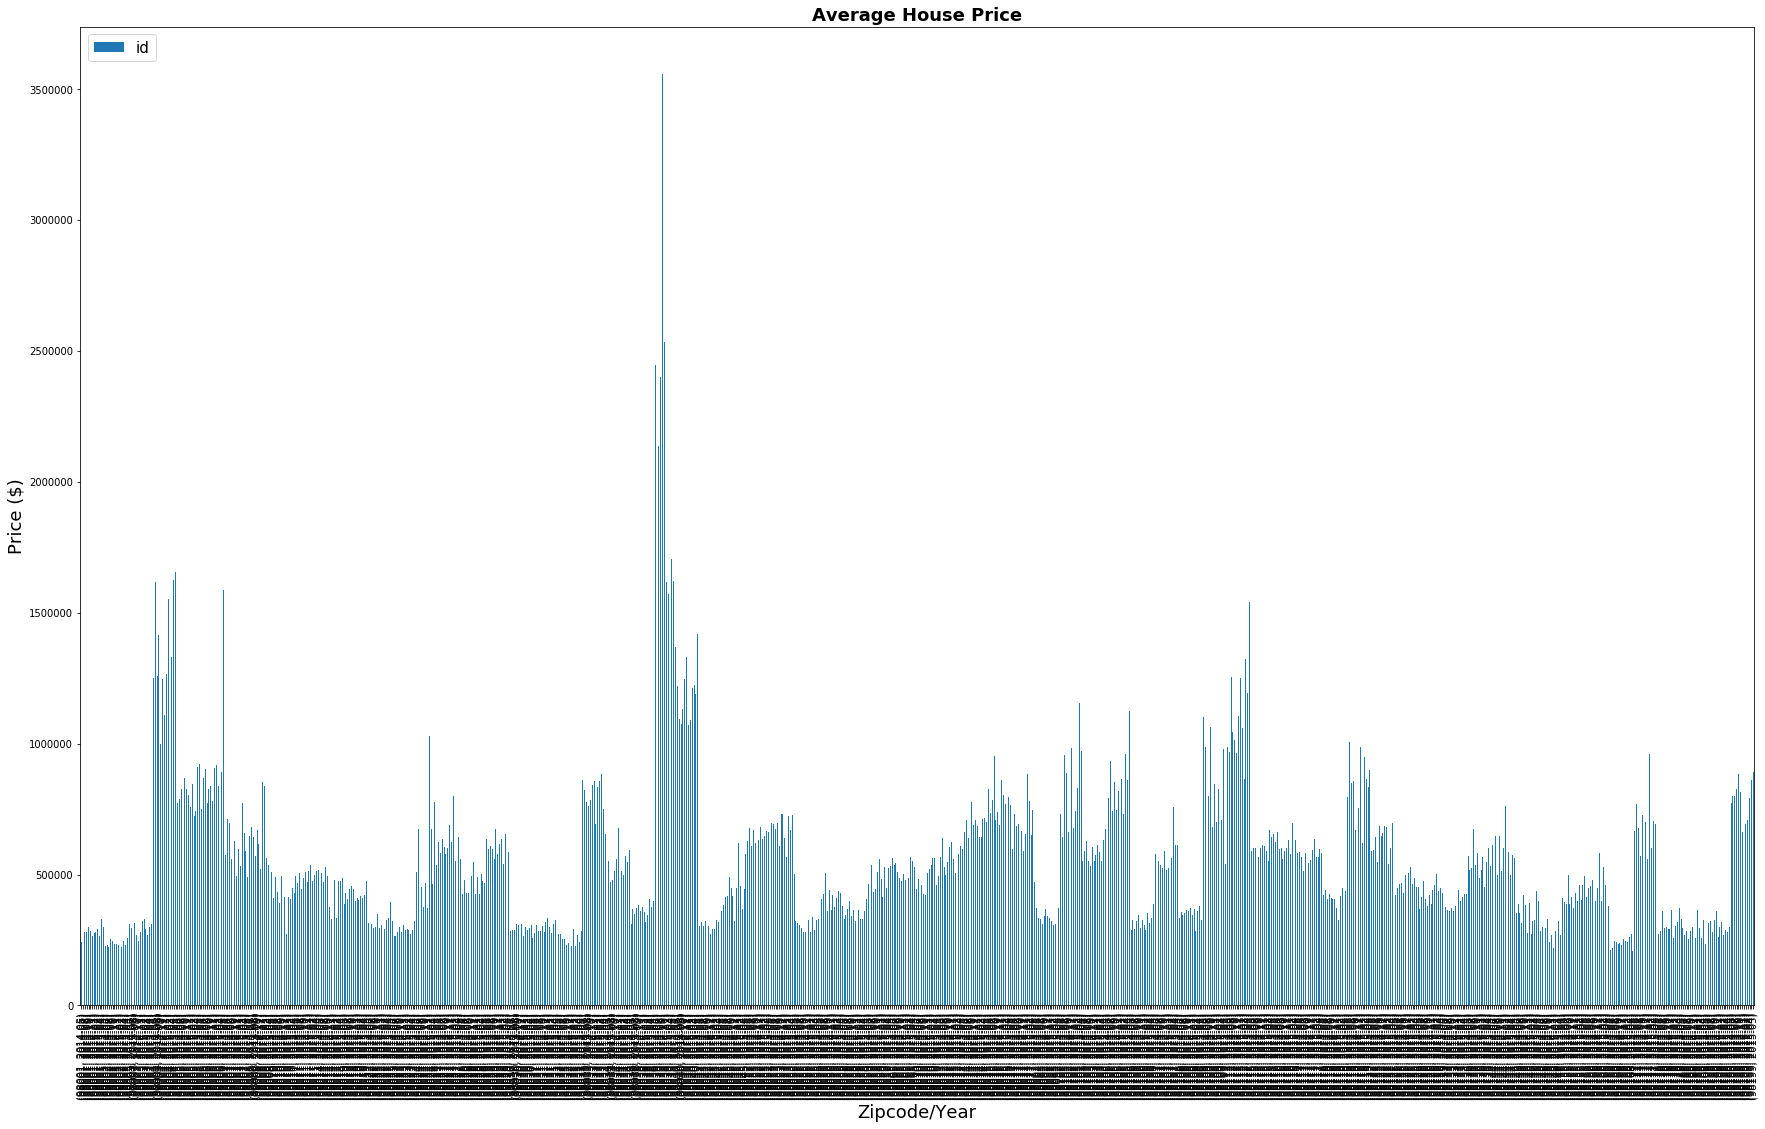

Current size: [30.0, 18.0]


<Figure size 1440x720 with 0 Axes>

In [83]:
housesalebyymszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode/Year", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodebyyear.png')

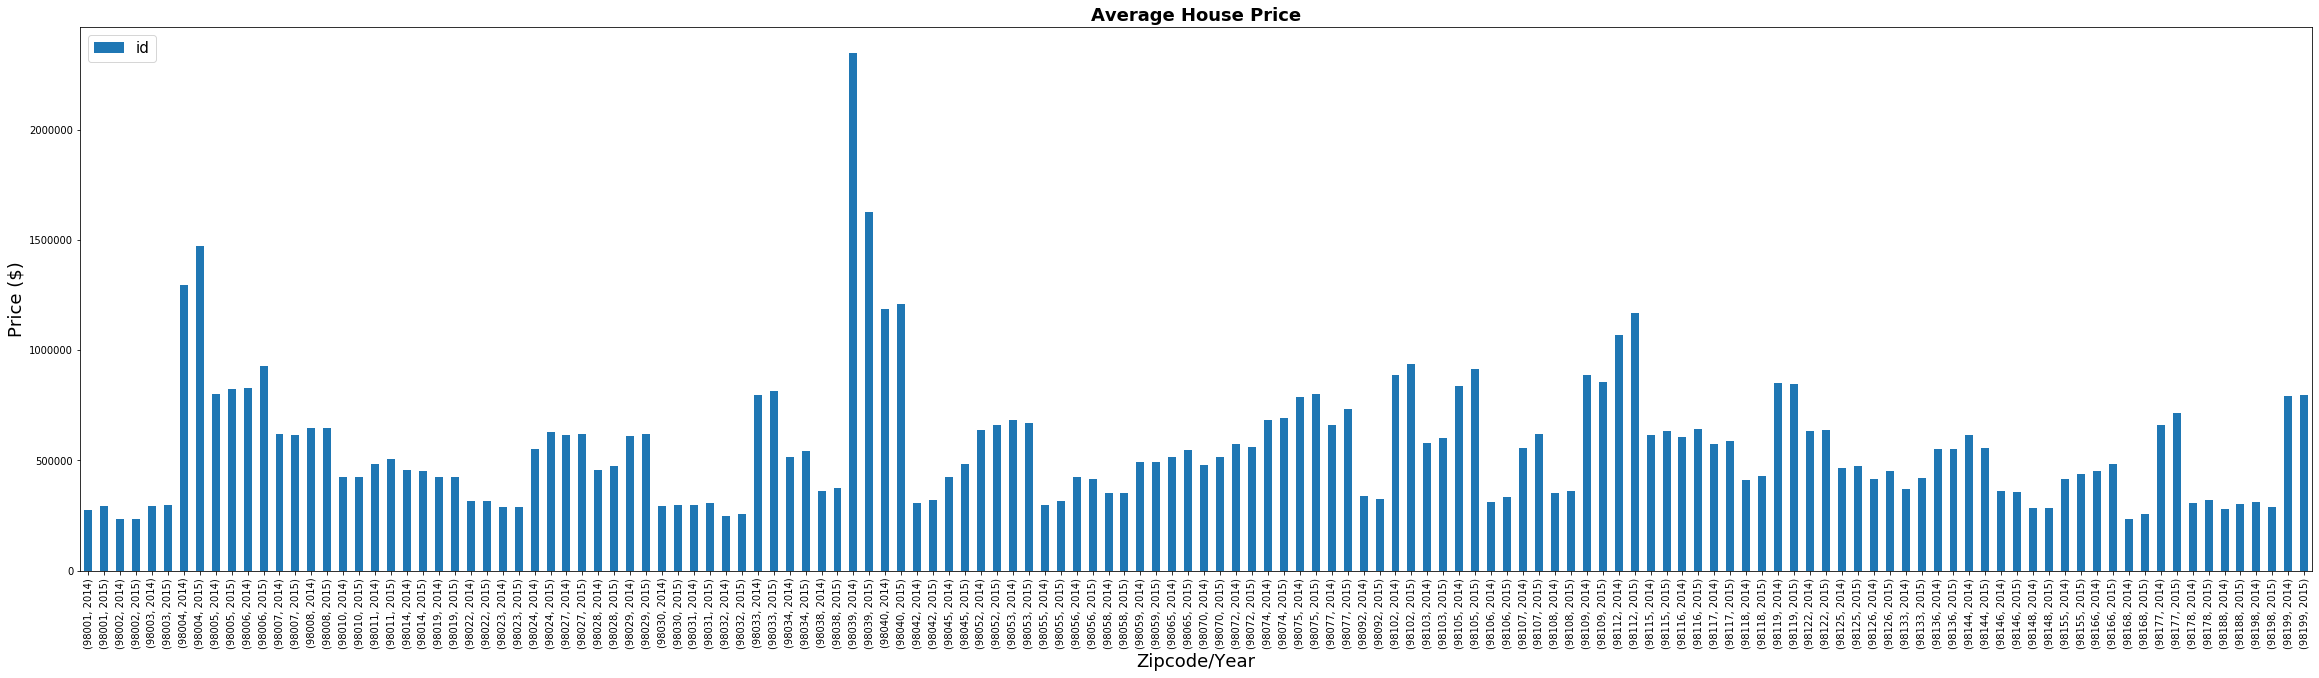

Current size: [40.0, 10.0]


<Figure size 6480x720 with 0 Axes>

In [87]:
housesalebyyearszc.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode/Year", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodebyyear.png')

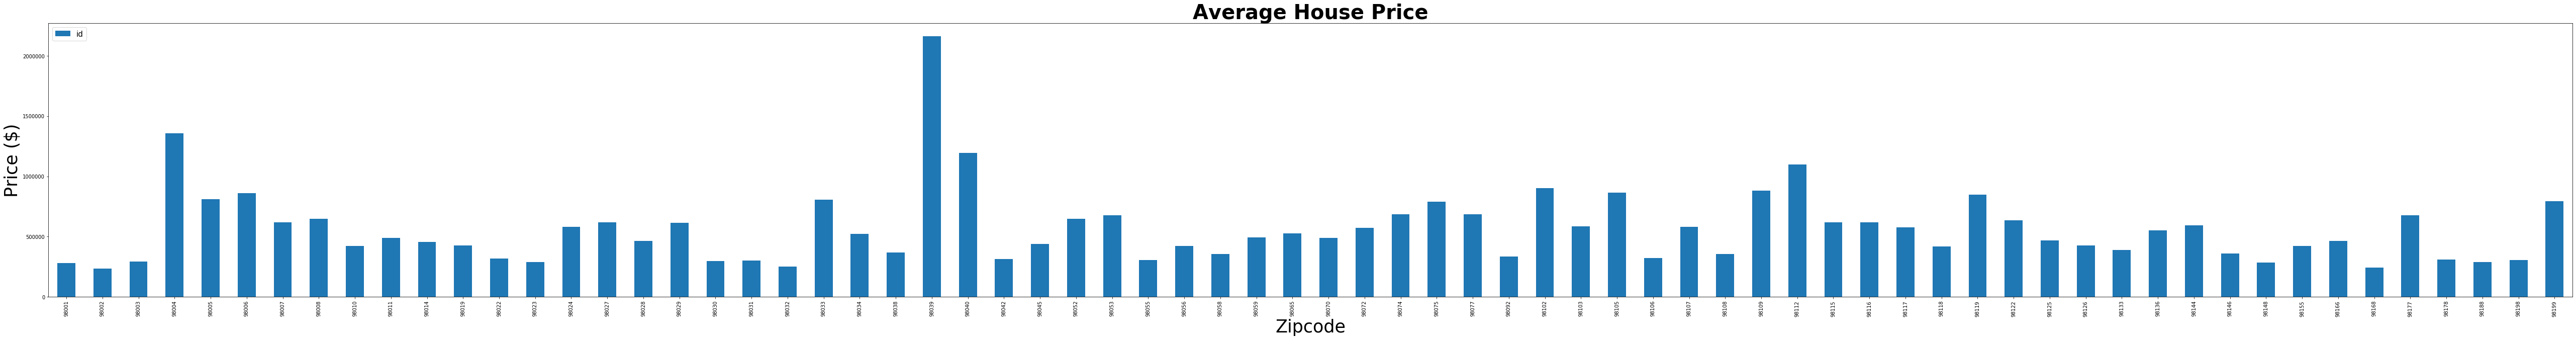

Current size: [90.0, 10.0]


<Figure size 6480x720 with 0 Axes>

In [89]:
byzipcode=df.groupby('zipcode').mean()

byzipcode.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
x_lim = len(housesalebyymszc.index)
# Chart title
plt.title("Average House Price", fontdict = {'fontsize': 40, 'fontweight': 'bold'})
# x label
plt.xlabel("Zipcode", fontdict = {'fontsize': 35})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 35})
# legend 
plt.legend(housesalebyymszc, loc=2, prop={'size': 15})
 
plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 90
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('averagepriceinzipcodebyyear.png')

In [90]:
weatherdata = pd.read_json('Resources/23075d28543cff25d003a483a55b9d88.json')
weatherdata



city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN  
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN  
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN  
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN  
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN  
...                              ...                          ...  ...  
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN  
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN  
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN  
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN  
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN  

[26277 rows x 9 columns]

In [18]:
date=[]
num = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num))
    sdate = weatherdata['dt_iso'].str.split(" ")[num][0]
    date.append(sdate)
    num = num + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 559
working on 560
working on 561
working on 562
working on 563
working on 564
working on 565
working on 566
working on 567
working on 568
working on 569
working on 570
working on 571
working on 572
working on 573
working on 574
working on 575
working on 576
working on 577
working on 578
working on 579
working on 580
working on 581
working on 582
working on 583
working on 584
working on 585
working on 586
working on 587
working on 588
working on 589
working on 590
working on 591
working on 592
working on 593
working on 594
working on 595
working on 596
working on 597
working on 598
working on 599
working on 600
working on 601
working on 602
working on 603
working on 604
working on 605
working on 606
working on 607
working on 608
working on 609
working on 610
working on 611
working on 612
working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on

working on 1103
working on 1104
working on 1105
working on 1106
working on 1107
working on 1108
working on 1109
working on 1110
working on 1111
working on 1112
working on 1113
working on 1114
working on 1115
working on 1116
working on 1117
working on 1118
working on 1119
working on 1120
working on 1121
working on 1122
working on 1123
working on 1124
working on 1125
working on 1126
working on 1127
working on 1128
working on 1129
working on 1130
working on 1131
working on 1132
working on 1133
working on 1134
working on 1135
working on 1136
working on 1137
working on 1138
working on 1139
working on 1140
working on 1141
working on 1142
working on 1143
working on 1144
working on 1145
working on 1146
working on 1147
working on 1148
working on 1149
working on 1150
working on 1151
working on 1152
working on 1153
working on 1154
working on 1155
working on 1156
working on 1157
working on 1158
working on 1159
working on 1160
working on 1161
working on 1162
working on 1163
working on 1164
working 

working on 1617
working on 1618
working on 1619
working on 1620
working on 1621
working on 1622
working on 1623
working on 1624
working on 1625
working on 1626
working on 1627
working on 1628
working on 1629
working on 1630
working on 1631
working on 1632
working on 1633
working on 1634
working on 1635
working on 1636
working on 1637
working on 1638
working on 1639
working on 1640
working on 1641
working on 1642
working on 1643
working on 1644
working on 1645
working on 1646
working on 1647
working on 1648
working on 1649
working on 1650
working on 1651
working on 1652
working on 1653
working on 1654
working on 1655
working on 1656
working on 1657
working on 1658
working on 1659
working on 1660
working on 1661
working on 1662
working on 1663
working on 1664
working on 1665
working on 1666
working on 1667
working on 1668
working on 1669
working on 1670
working on 1671
working on 1672
working on 1673
working on 1674
working on 1675
working on 1676
working on 1677
working on 1678
working 

working on 2132
working on 2133
working on 2134
working on 2135
working on 2136
working on 2137
working on 2138
working on 2139
working on 2140
working on 2141
working on 2142
working on 2143
working on 2144
working on 2145
working on 2146
working on 2147
working on 2148
working on 2149
working on 2150
working on 2151
working on 2152
working on 2153
working on 2154
working on 2155
working on 2156
working on 2157
working on 2158
working on 2159
working on 2160
working on 2161
working on 2162
working on 2163
working on 2164
working on 2165
working on 2166
working on 2167
working on 2168
working on 2169
working on 2170
working on 2171
working on 2172
working on 2173
working on 2174
working on 2175
working on 2176
working on 2177
working on 2178
working on 2179
working on 2180
working on 2181
working on 2182
working on 2183
working on 2184
working on 2185
working on 2186
working on 2187
working on 2188
working on 2189
working on 2190
working on 2191
working on 2192
working on 2193
working 

working on 2647
working on 2648
working on 2649
working on 2650
working on 2651
working on 2652
working on 2653
working on 2654
working on 2655
working on 2656
working on 2657
working on 2658
working on 2659
working on 2660
working on 2661
working on 2662
working on 2663
working on 2664
working on 2665
working on 2666
working on 2667
working on 2668
working on 2669
working on 2670
working on 2671
working on 2672
working on 2673
working on 2674
working on 2675
working on 2676
working on 2677
working on 2678
working on 2679
working on 2680
working on 2681
working on 2682
working on 2683
working on 2684
working on 2685
working on 2686
working on 2687
working on 2688
working on 2689
working on 2690
working on 2691
working on 2692
working on 2693
working on 2694
working on 2695
working on 2696
working on 2697
working on 2698
working on 2699
working on 2700
working on 2701
working on 2702
working on 2703
working on 2704
working on 2705
working on 2706
working on 2707
working on 2708
working 

working on 3162
working on 3163
working on 3164
working on 3165
working on 3166
working on 3167
working on 3168
working on 3169
working on 3170
working on 3171
working on 3172
working on 3173
working on 3174
working on 3175
working on 3176
working on 3177
working on 3178
working on 3179
working on 3180
working on 3181
working on 3182
working on 3183
working on 3184
working on 3185
working on 3186
working on 3187
working on 3188
working on 3189
working on 3190
working on 3191
working on 3192
working on 3193
working on 3194
working on 3195
working on 3196
working on 3197
working on 3198
working on 3199
working on 3200
working on 3201
working on 3202
working on 3203
working on 3204
working on 3205
working on 3206
working on 3207
working on 3208
working on 3209
working on 3210
working on 3211
working on 3212
working on 3213
working on 3214
working on 3215
working on 3216
working on 3217
working on 3218
working on 3219
working on 3220
working on 3221
working on 3222
working on 3223
working 

working on 3678
working on 3679
working on 3680
working on 3681
working on 3682
working on 3683
working on 3684
working on 3685
working on 3686
working on 3687
working on 3688
working on 3689
working on 3690
working on 3691
working on 3692
working on 3693
working on 3694
working on 3695
working on 3696
working on 3697
working on 3698
working on 3699
working on 3700
working on 3701
working on 3702
working on 3703
working on 3704
working on 3705
working on 3706
working on 3707
working on 3708
working on 3709
working on 3710
working on 3711
working on 3712
working on 3713
working on 3714
working on 3715
working on 3716
working on 3717
working on 3718
working on 3719
working on 3720
working on 3721
working on 3722
working on 3723
working on 3724
working on 3725
working on 3726
working on 3727
working on 3728
working on 3729
working on 3730
working on 3731
working on 3732
working on 3733
working on 3734
working on 3735
working on 3736
working on 3737
working on 3738
working on 3739
working 

working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working on 4230
working on 4231
working on 4232
working on 4233
working on 4234
working on 4235
working on 4236
working on 4237
working on 4238
working on 4239
working on 4240
working on 4241
working on 4242
working on 4243
working on 4244
working on 4245
working on 4246
working on 4247
working on 4248
working on 4249
working on 4250
working on 4251
working on 4252
working on 4253
working on 4254
working 

working on 4709
working on 4710
working on 4711
working on 4712
working on 4713
working on 4714
working on 4715
working on 4716
working on 4717
working on 4718
working on 4719
working on 4720
working on 4721
working on 4722
working on 4723
working on 4724
working on 4725
working on 4726
working on 4727
working on 4728
working on 4729
working on 4730
working on 4731
working on 4732
working on 4733
working on 4734
working on 4735
working on 4736
working on 4737
working on 4738
working on 4739
working on 4740
working on 4741
working on 4742
working on 4743
working on 4744
working on 4745
working on 4746
working on 4747
working on 4748
working on 4749
working on 4750
working on 4751
working on 4752
working on 4753
working on 4754
working on 4755
working on 4756
working on 4757
working on 4758
working on 4759
working on 4760
working on 4761
working on 4762
working on 4763
working on 4764
working on 4765
working on 4766
working on 4767
working on 4768
working on 4769
working on 4770
working 

working on 5222
working on 5223
working on 5224
working on 5225
working on 5226
working on 5227
working on 5228
working on 5229
working on 5230
working on 5231
working on 5232
working on 5233
working on 5234
working on 5235
working on 5236
working on 5237
working on 5238
working on 5239
working on 5240
working on 5241
working on 5242
working on 5243
working on 5244
working on 5245
working on 5246
working on 5247
working on 5248
working on 5249
working on 5250
working on 5251
working on 5252
working on 5253
working on 5254
working on 5255
working on 5256
working on 5257
working on 5258
working on 5259
working on 5260
working on 5261
working on 5262
working on 5263
working on 5264
working on 5265
working on 5266
working on 5267
working on 5268
working on 5269
working on 5270
working on 5271
working on 5272
working on 5273
working on 5274
working on 5275
working on 5276
working on 5277
working on 5278
working on 5279
working on 5280
working on 5281
working on 5282
working on 5283
working 

working on 5739
working on 5740
working on 5741
working on 5742
working on 5743
working on 5744
working on 5745
working on 5746
working on 5747
working on 5748
working on 5749
working on 5750
working on 5751
working on 5752
working on 5753
working on 5754
working on 5755
working on 5756
working on 5757
working on 5758
working on 5759
working on 5760
working on 5761
working on 5762
working on 5763
working on 5764
working on 5765
working on 5766
working on 5767
working on 5768
working on 5769
working on 5770
working on 5771
working on 5772
working on 5773
working on 5774
working on 5775
working on 5776
working on 5777
working on 5778
working on 5779
working on 5780
working on 5781
working on 5782
working on 5783
working on 5784
working on 5785
working on 5786
working on 5787
working on 5788
working on 5789
working on 5790
working on 5791
working on 5792
working on 5793
working on 5794
working on 5795
working on 5796
working on 5797
working on 5798
working on 5799
working on 5800
working 

working on 6255
working on 6256
working on 6257
working on 6258
working on 6259
working on 6260
working on 6261
working on 6262
working on 6263
working on 6264
working on 6265
working on 6266
working on 6267
working on 6268
working on 6269
working on 6270
working on 6271
working on 6272
working on 6273
working on 6274
working on 6275
working on 6276
working on 6277
working on 6278
working on 6279
working on 6280
working on 6281
working on 6282
working on 6283
working on 6284
working on 6285
working on 6286
working on 6287
working on 6288
working on 6289
working on 6290
working on 6291
working on 6292
working on 6293
working on 6294
working on 6295
working on 6296
working on 6297
working on 6298
working on 6299
working on 6300
working on 6301
working on 6302
working on 6303
working on 6304
working on 6305
working on 6306
working on 6307
working on 6308
working on 6309
working on 6310
working on 6311
working on 6312
working on 6313
working on 6314
working on 6315
working on 6316
working 

working on 6769
working on 6770
working on 6771
working on 6772
working on 6773
working on 6774
working on 6775
working on 6776
working on 6777
working on 6778
working on 6779
working on 6780
working on 6781
working on 6782
working on 6783
working on 6784
working on 6785
working on 6786
working on 6787
working on 6788
working on 6789
working on 6790
working on 6791
working on 6792
working on 6793
working on 6794
working on 6795
working on 6796
working on 6797
working on 6798
working on 6799
working on 6800
working on 6801
working on 6802
working on 6803
working on 6804
working on 6805
working on 6806
working on 6807
working on 6808
working on 6809
working on 6810
working on 6811
working on 6812
working on 6813
working on 6814
working on 6815
working on 6816
working on 6817
working on 6818
working on 6819
working on 6820
working on 6821
working on 6822
working on 6823
working on 6824
working on 6825
working on 6826
working on 6827
working on 6828
working on 6829
working on 6830
working 

working on 7283
working on 7284
working on 7285
working on 7286
working on 7287
working on 7288
working on 7289
working on 7290
working on 7291
working on 7292
working on 7293
working on 7294
working on 7295
working on 7296
working on 7297
working on 7298
working on 7299
working on 7300
working on 7301
working on 7302
working on 7303
working on 7304
working on 7305
working on 7306
working on 7307
working on 7308
working on 7309
working on 7310
working on 7311
working on 7312
working on 7313
working on 7314
working on 7315
working on 7316
working on 7317
working on 7318
working on 7319
working on 7320
working on 7321
working on 7322
working on 7323
working on 7324
working on 7325
working on 7326
working on 7327
working on 7328
working on 7329
working on 7330
working on 7331
working on 7332
working on 7333
working on 7334
working on 7335
working on 7336
working on 7337
working on 7338
working on 7339
working on 7340
working on 7341
working on 7342
working on 7343
working on 7344
working 

working on 7799
working on 7800
working on 7801
working on 7802
working on 7803
working on 7804
working on 7805
working on 7806
working on 7807
working on 7808
working on 7809
working on 7810
working on 7811
working on 7812
working on 7813
working on 7814
working on 7815
working on 7816
working on 7817
working on 7818
working on 7819
working on 7820
working on 7821
working on 7822
working on 7823
working on 7824
working on 7825
working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working on 7848
working on 7849
working on 7850
working on 7851
working on 7852
working on 7853
working on 7854
working on 7855
working on 7856
working on 7857
working on 7858
working on 7859
working on 7860
working 

working on 8316
working on 8317
working on 8318
working on 8319
working on 8320
working on 8321
working on 8322
working on 8323
working on 8324
working on 8325
working on 8326
working on 8327
working on 8328
working on 8329
working on 8330
working on 8331
working on 8332
working on 8333
working on 8334
working on 8335
working on 8336
working on 8337
working on 8338
working on 8339
working on 8340
working on 8341
working on 8342
working on 8343
working on 8344
working on 8345
working on 8346
working on 8347
working on 8348
working on 8349
working on 8350
working on 8351
working on 8352
working on 8353
working on 8354
working on 8355
working on 8356
working on 8357
working on 8358
working on 8359
working on 8360
working on 8361
working on 8362
working on 8363
working on 8364
working on 8365
working on 8366
working on 8367
working on 8368
working on 8369
working on 8370
working on 8371
working on 8372
working on 8373
working on 8374
working on 8375
working on 8376
working on 8377
working 

working on 8833
working on 8834
working on 8835
working on 8836
working on 8837
working on 8838
working on 8839
working on 8840
working on 8841
working on 8842
working on 8843
working on 8844
working on 8845
working on 8846
working on 8847
working on 8848
working on 8849
working on 8850
working on 8851
working on 8852
working on 8853
working on 8854
working on 8855
working on 8856
working on 8857
working on 8858
working on 8859
working on 8860
working on 8861
working on 8862
working on 8863
working on 8864
working on 8865
working on 8866
working on 8867
working on 8868
working on 8869
working on 8870
working on 8871
working on 8872
working on 8873
working on 8874
working on 8875
working on 8876
working on 8877
working on 8878
working on 8879
working on 8880
working on 8881
working on 8882
working on 8883
working on 8884
working on 8885
working on 8886
working on 8887
working on 8888
working on 8889
working on 8890
working on 8891
working on 8892
working on 8893
working on 8894
working 

working on 9347
working on 9348
working on 9349
working on 9350
working on 9351
working on 9352
working on 9353
working on 9354
working on 9355
working on 9356
working on 9357
working on 9358
working on 9359
working on 9360
working on 9361
working on 9362
working on 9363
working on 9364
working on 9365
working on 9366
working on 9367
working on 9368
working on 9369
working on 9370
working on 9371
working on 9372
working on 9373
working on 9374
working on 9375
working on 9376
working on 9377
working on 9378
working on 9379
working on 9380
working on 9381
working on 9382
working on 9383
working on 9384
working on 9385
working on 9386
working on 9387
working on 9388
working on 9389
working on 9390
working on 9391
working on 9392
working on 9393
working on 9394
working on 9395
working on 9396
working on 9397
working on 9398
working on 9399
working on 9400
working on 9401
working on 9402
working on 9403
working on 9404
working on 9405
working on 9406
working on 9407
working on 9408
working 

working on 9863
working on 9864
working on 9865
working on 9866
working on 9867
working on 9868
working on 9869
working on 9870
working on 9871
working on 9872
working on 9873
working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9879
working on 9880
working on 9881
working on 9882
working on 9883
working on 9884
working on 9885
working on 9886
working on 9887
working on 9888
working on 9889
working on 9890
working on 9891
working on 9892
working on 9893
working on 9894
working on 9895
working on 9896
working on 9897
working on 9898
working on 9899
working on 9900
working on 9901
working on 9902
working on 9903
working on 9904
working on 9905
working on 9906
working on 9907
working on 9908
working on 9909
working on 9910
working on 9911
working on 9912
working on 9913
working on 9914
working on 9915
working on 9916
working on 9917
working on 9918
working on 9919
working on 9920
working on 9921
working on 9922
working on 9923
working on 9924
working 

working on 10353
working on 10354
working on 10355
working on 10356
working on 10357
working on 10358
working on 10359
working on 10360
working on 10361
working on 10362
working on 10363
working on 10364
working on 10365
working on 10366
working on 10367
working on 10368
working on 10369
working on 10370
working on 10371
working on 10372
working on 10373
working on 10374
working on 10375
working on 10376
working on 10377
working on 10378
working on 10379
working on 10380
working on 10381
working on 10382
working on 10383
working on 10384
working on 10385
working on 10386
working on 10387
working on 10388
working on 10389
working on 10390
working on 10391
working on 10392
working on 10393
working on 10394
working on 10395
working on 10396
working on 10397
working on 10398
working on 10399
working on 10400
working on 10401
working on 10402
working on 10403
working on 10404
working on 10405
working on 10406
working on 10407
working on 10408
working on 10409
working on 10410
working on 104

working on 10840
working on 10841
working on 10842
working on 10843
working on 10844
working on 10845
working on 10846
working on 10847
working on 10848
working on 10849
working on 10850
working on 10851
working on 10852
working on 10853
working on 10854
working on 10855
working on 10856
working on 10857
working on 10858
working on 10859
working on 10860
working on 10861
working on 10862
working on 10863
working on 10864
working on 10865
working on 10866
working on 10867
working on 10868
working on 10869
working on 10870
working on 10871
working on 10872
working on 10873
working on 10874
working on 10875
working on 10876
working on 10877
working on 10878
working on 10879
working on 10880
working on 10881
working on 10882
working on 10883
working on 10884
working on 10885
working on 10886
working on 10887
working on 10888
working on 10889
working on 10890
working on 10891
working on 10892
working on 10893
working on 10894
working on 10895
working on 10896
working on 10897
working on 108

working on 11323
working on 11324
working on 11325
working on 11326
working on 11327
working on 11328
working on 11329
working on 11330
working on 11331
working on 11332
working on 11333
working on 11334
working on 11335
working on 11336
working on 11337
working on 11338
working on 11339
working on 11340
working on 11341
working on 11342
working on 11343
working on 11344
working on 11345
working on 11346
working on 11347
working on 11348
working on 11349
working on 11350
working on 11351
working on 11352
working on 11353
working on 11354
working on 11355
working on 11356
working on 11357
working on 11358
working on 11359
working on 11360
working on 11361
working on 11362
working on 11363
working on 11364
working on 11365
working on 11366
working on 11367
working on 11368
working on 11369
working on 11370
working on 11371
working on 11372
working on 11373
working on 11374
working on 11375
working on 11376
working on 11377
working on 11378
working on 11379
working on 11380
working on 113

working on 11808
working on 11809
working on 11810
working on 11811
working on 11812
working on 11813
working on 11814
working on 11815
working on 11816
working on 11817
working on 11818
working on 11819
working on 11820
working on 11821
working on 11822
working on 11823
working on 11824
working on 11825
working on 11826
working on 11827
working on 11828
working on 11829
working on 11830
working on 11831
working on 11832
working on 11833
working on 11834
working on 11835
working on 11836
working on 11837
working on 11838
working on 11839
working on 11840
working on 11841
working on 11842
working on 11843
working on 11844
working on 11845
working on 11846
working on 11847
working on 11848
working on 11849
working on 11850
working on 11851
working on 11852
working on 11853
working on 11854
working on 11855
working on 11856
working on 11857
working on 11858
working on 11859
working on 11860
working on 11861
working on 11862
working on 11863
working on 11864
working on 11865
working on 118

working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 12299
working on 12300
working on 12301
working on 12302
working on 12303
working on 12304
working on 12305
working on 12306
working on 12307
working on 12308
working on 12309
working on 12310
working on 12311
working on 12312
working on 12313
working on 12314
working on 12315
working on 12316
working on 12317
working on 12318
working on 12319
working on 12320
working on 12321
working on 12322
working on 12323
working on 12324
working on 12325
working on 12326
working on 12327
working on 12328
working on 12329
working on 12330
working on 12331
working on 12332
working on 12333
working on 12334
working on 12335
working on 12336
working on 12337
working on 12338
working on 12339
working on 12340
working on 12341
working on 12342
working on 12343
working on 12344
working on 12345
working on 12346
working on 12347
working on 12348
working on 123

working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 12802
working on 12803
working on 12804
working on 12805
working on 12806
working on 12807
working on 12808
working on 12809
working on 12810
working on 12811
working on 12812
working on 12813
working on 12814
working on 12815
working on 12816
working on 12817
working on 12818
working on 12819
working on 12820
working on 12821
working on 12822
working on 12823
working on 12824
working on 12825
working on 12826
working on 12827
working on 12828
working on 12829
working on 12830
working on 12831
working on 128

working on 13257
working on 13258
working on 13259
working on 13260
working on 13261
working on 13262
working on 13263
working on 13264
working on 13265
working on 13266
working on 13267
working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13279
working on 13280
working on 13281
working on 13282
working on 13283
working on 13284
working on 13285
working on 13286
working on 13287
working on 13288
working on 13289
working on 13290
working on 13291
working on 13292
working on 13293
working on 13294
working on 13295
working on 13296
working on 13297
working on 13298
working on 13299
working on 13300
working on 13301
working on 13302
working on 13303
working on 13304
working on 13305
working on 13306
working on 13307
working on 13308
working on 13309
working on 13310
working on 13311
working on 13312
working on 13313
working on 13314
working on 133

working on 13741
working on 13742
working on 13743
working on 13744
working on 13745
working on 13746
working on 13747
working on 13748
working on 13749
working on 13750
working on 13751
working on 13752
working on 13753
working on 13754
working on 13755
working on 13756
working on 13757
working on 13758
working on 13759
working on 13760
working on 13761
working on 13762
working on 13763
working on 13764
working on 13765
working on 13766
working on 13767
working on 13768
working on 13769
working on 13770
working on 13771
working on 13772
working on 13773
working on 13774
working on 13775
working on 13776
working on 13777
working on 13778
working on 13779
working on 13780
working on 13781
working on 13782
working on 13783
working on 13784
working on 13785
working on 13786
working on 13787
working on 13788
working on 13789
working on 13790
working on 13791
working on 13792
working on 13793
working on 13794
working on 13795
working on 13796
working on 13797
working on 13798
working on 137

working on 14224
working on 14225
working on 14226
working on 14227
working on 14228
working on 14229
working on 14230
working on 14231
working on 14232
working on 14233
working on 14234
working on 14235
working on 14236
working on 14237
working on 14238
working on 14239
working on 14240
working on 14241
working on 14242
working on 14243
working on 14244
working on 14245
working on 14246
working on 14247
working on 14248
working on 14249
working on 14250
working on 14251
working on 14252
working on 14253
working on 14254
working on 14255
working on 14256
working on 14257
working on 14258
working on 14259
working on 14260
working on 14261
working on 14262
working on 14263
working on 14264
working on 14265
working on 14266
working on 14267
working on 14268
working on 14269
working on 14270
working on 14271
working on 14272
working on 14273
working on 14274
working on 14275
working on 14276
working on 14277
working on 14278
working on 14279
working on 14280
working on 14281
working on 142

working on 14710
working on 14711
working on 14712
working on 14713
working on 14714
working on 14715
working on 14716
working on 14717
working on 14718
working on 14719
working on 14720
working on 14721
working on 14722
working on 14723
working on 14724
working on 14725
working on 14726
working on 14727
working on 14728
working on 14729
working on 14730
working on 14731
working on 14732
working on 14733
working on 14734
working on 14735
working on 14736
working on 14737
working on 14738
working on 14739
working on 14740
working on 14741
working on 14742
working on 14743
working on 14744
working on 14745
working on 14746
working on 14747
working on 14748
working on 14749
working on 14750
working on 14751
working on 14752
working on 14753
working on 14754
working on 14755
working on 14756
working on 14757
working on 14758
working on 14759
working on 14760
working on 14761
working on 14762
working on 14763
working on 14764
working on 14765
working on 14766
working on 14767
working on 147

working on 15192
working on 15193
working on 15194
working on 15195
working on 15196
working on 15197
working on 15198
working on 15199
working on 15200
working on 15201
working on 15202
working on 15203
working on 15204
working on 15205
working on 15206
working on 15207
working on 15208
working on 15209
working on 15210
working on 15211
working on 15212
working on 15213
working on 15214
working on 15215
working on 15216
working on 15217
working on 15218
working on 15219
working on 15220
working on 15221
working on 15222
working on 15223
working on 15224
working on 15225
working on 15226
working on 15227
working on 15228
working on 15229
working on 15230
working on 15231
working on 15232
working on 15233
working on 15234
working on 15235
working on 15236
working on 15237
working on 15238
working on 15239
working on 15240
working on 15241
working on 15242
working on 15243
working on 15244
working on 15245
working on 15246
working on 15247
working on 15248
working on 15249
working on 152

working on 15675
working on 15676
working on 15677
working on 15678
working on 15679
working on 15680
working on 15681
working on 15682
working on 15683
working on 15684
working on 15685
working on 15686
working on 15687
working on 15688
working on 15689
working on 15690
working on 15691
working on 15692
working on 15693
working on 15694
working on 15695
working on 15696
working on 15697
working on 15698
working on 15699
working on 15700
working on 15701
working on 15702
working on 15703
working on 15704
working on 15705
working on 15706
working on 15707
working on 15708
working on 15709
working on 15710
working on 15711
working on 15712
working on 15713
working on 15714
working on 15715
working on 15716
working on 15717
working on 15718
working on 15719
working on 15720
working on 15721
working on 15722
working on 15723
working on 15724
working on 15725
working on 15726
working on 15727
working on 15728
working on 15729
working on 15730
working on 15731
working on 15732
working on 157

working on 16157
working on 16158
working on 16159
working on 16160
working on 16161
working on 16162
working on 16163
working on 16164
working on 16165
working on 16166
working on 16167
working on 16168
working on 16169
working on 16170
working on 16171
working on 16172
working on 16173
working on 16174
working on 16175
working on 16176
working on 16177
working on 16178
working on 16179
working on 16180
working on 16181
working on 16182
working on 16183
working on 16184
working on 16185
working on 16186
working on 16187
working on 16188
working on 16189
working on 16190
working on 16191
working on 16192
working on 16193
working on 16194
working on 16195
working on 16196
working on 16197
working on 16198
working on 16199
working on 16200
working on 16201
working on 16202
working on 16203
working on 16204
working on 16205
working on 16206
working on 16207
working on 16208
working on 16209
working on 16210
working on 16211
working on 16212
working on 16213
working on 16214
working on 162

working on 16641
working on 16642
working on 16643
working on 16644
working on 16645
working on 16646
working on 16647
working on 16648
working on 16649
working on 16650
working on 16651
working on 16652
working on 16653
working on 16654
working on 16655
working on 16656
working on 16657
working on 16658
working on 16659
working on 16660
working on 16661
working on 16662
working on 16663
working on 16664
working on 16665
working on 16666
working on 16667
working on 16668
working on 16669
working on 16670
working on 16671
working on 16672
working on 16673
working on 16674
working on 16675
working on 16676
working on 16677
working on 16678
working on 16679
working on 16680
working on 16681
working on 16682
working on 16683
working on 16684
working on 16685
working on 16686
working on 16687
working on 16688
working on 16689
working on 16690
working on 16691
working on 16692
working on 16693
working on 16694
working on 16695
working on 16696
working on 16697
working on 16698
working on 166

working on 17127
working on 17128
working on 17129
working on 17130
working on 17131
working on 17132
working on 17133
working on 17134
working on 17135
working on 17136
working on 17137
working on 17138
working on 17139
working on 17140
working on 17141
working on 17142
working on 17143
working on 17144
working on 17145
working on 17146
working on 17147
working on 17148
working on 17149
working on 17150
working on 17151
working on 17152
working on 17153
working on 17154
working on 17155
working on 17156
working on 17157
working on 17158
working on 17159
working on 17160
working on 17161
working on 17162
working on 17163
working on 17164
working on 17165
working on 17166
working on 17167
working on 17168
working on 17169
working on 17170
working on 17171
working on 17172
working on 17173
working on 17174
working on 17175
working on 17176
working on 17177
working on 17178
working on 17179
working on 17180
working on 17181
working on 17182
working on 17183
working on 17184
working on 171

working on 17612
working on 17613
working on 17614
working on 17615
working on 17616
working on 17617
working on 17618
working on 17619
working on 17620
working on 17621
working on 17622
working on 17623
working on 17624
working on 17625
working on 17626
working on 17627
working on 17628
working on 17629
working on 17630
working on 17631
working on 17632
working on 17633
working on 17634
working on 17635
working on 17636
working on 17637
working on 17638
working on 17639
working on 17640
working on 17641
working on 17642
working on 17643
working on 17644
working on 17645
working on 17646
working on 17647
working on 17648
working on 17649
working on 17650
working on 17651
working on 17652
working on 17653
working on 17654
working on 17655
working on 17656
working on 17657
working on 17658
working on 17659
working on 17660
working on 17661
working on 17662
working on 17663
working on 17664
working on 17665
working on 17666
working on 17667
working on 17668
working on 17669
working on 176

working on 18097
working on 18098
working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 18109
working on 18110
working on 18111
working on 18112
working on 18113
working on 18114
working on 18115
working on 18116
working on 18117
working on 18118
working on 18119
working on 18120
working on 18121
working on 18122
working on 18123
working on 18124
working on 18125
working on 18126
working on 18127
working on 18128
working on 18129
working on 18130
working on 18131
working on 18132
working on 18133
working on 18134
working on 18135
working on 18136
working on 18137
working on 18138
working on 18139
working on 18140
working on 18141
working on 18142
working on 18143
working on 18144
working on 18145
working on 18146
working on 18147
working on 18148
working on 18149
working on 18150
working on 18151
working on 18152
working on 18153
working on 18154
working on 181

working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 18634
working on 18635
working on 18636
working on 186

working on 19062
working on 19063
working on 19064
working on 19065
working on 19066
working on 19067
working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 19091
working on 19092
working on 19093
working on 19094
working on 19095
working on 19096
working on 19097
working on 19098
working on 19099
working on 19100
working on 19101
working on 19102
working on 19103
working on 19104
working on 19105
working on 19106
working on 19107
working on 19108
working on 19109
working on 19110
working on 19111
working on 19112
working on 19113
working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 191

working on 19545
working on 19546
working on 19547
working on 19548
working on 19549
working on 19550
working on 19551
working on 19552
working on 19553
working on 19554
working on 19555
working on 19556
working on 19557
working on 19558
working on 19559
working on 19560
working on 19561
working on 19562
working on 19563
working on 19564
working on 19565
working on 19566
working on 19567
working on 19568
working on 19569
working on 19570
working on 19571
working on 19572
working on 19573
working on 19574
working on 19575
working on 19576
working on 19577
working on 19578
working on 19579
working on 19580
working on 19581
working on 19582
working on 19583
working on 19584
working on 19585
working on 19586
working on 19587
working on 19588
working on 19589
working on 19590
working on 19591
working on 19592
working on 19593
working on 19594
working on 19595
working on 19596
working on 19597
working on 19598
working on 19599
working on 19600
working on 19601
working on 19602
working on 196

working on 20029
working on 20030
working on 20031
working on 20032
working on 20033
working on 20034
working on 20035
working on 20036
working on 20037
working on 20038
working on 20039
working on 20040
working on 20041
working on 20042
working on 20043
working on 20044
working on 20045
working on 20046
working on 20047
working on 20048
working on 20049
working on 20050
working on 20051
working on 20052
working on 20053
working on 20054
working on 20055
working on 20056
working on 20057
working on 20058
working on 20059
working on 20060
working on 20061
working on 20062
working on 20063
working on 20064
working on 20065
working on 20066
working on 20067
working on 20068
working on 20069
working on 20070
working on 20071
working on 20072
working on 20073
working on 20074
working on 20075
working on 20076
working on 20077
working on 20078
working on 20079
working on 20080
working on 20081
working on 20082
working on 20083
working on 20084
working on 20085
working on 20086
working on 200

working on 20513
working on 20514
working on 20515
working on 20516
working on 20517
working on 20518
working on 20519
working on 20520
working on 20521
working on 20522
working on 20523
working on 20524
working on 20525
working on 20526
working on 20527
working on 20528
working on 20529
working on 20530
working on 20531
working on 20532
working on 20533
working on 20534
working on 20535
working on 20536
working on 20537
working on 20538
working on 20539
working on 20540
working on 20541
working on 20542
working on 20543
working on 20544
working on 20545
working on 20546
working on 20547
working on 20548
working on 20549
working on 20550
working on 20551
working on 20552
working on 20553
working on 20554
working on 20555
working on 20556
working on 20557
working on 20558
working on 20559
working on 20560
working on 20561
working on 20562
working on 20563
working on 20564
working on 20565
working on 20566
working on 20567
working on 20568
working on 20569
working on 20570
working on 205

working on 20995
working on 20996
working on 20997
working on 20998
working on 20999
working on 21000
working on 21001
working on 21002
working on 21003
working on 21004
working on 21005
working on 21006
working on 21007
working on 21008
working on 21009
working on 21010
working on 21011
working on 21012
working on 21013
working on 21014
working on 21015
working on 21016
working on 21017
working on 21018
working on 21019
working on 21020
working on 21021
working on 21022
working on 21023
working on 21024
working on 21025
working on 21026
working on 21027
working on 21028
working on 21029
working on 21030
working on 21031
working on 21032
working on 21033
working on 21034
working on 21035
working on 21036
working on 21037
working on 21038
working on 21039
working on 21040
working on 21041
working on 21042
working on 21043
working on 21044
working on 21045
working on 21046
working on 21047
working on 21048
working on 21049
working on 21050
working on 21051
working on 21052
working on 210

working on 21477
working on 21478
working on 21479
working on 21480
working on 21481
working on 21482
working on 21483
working on 21484
working on 21485
working on 21486
working on 21487
working on 21488
working on 21489
working on 21490
working on 21491
working on 21492
working on 21493
working on 21494
working on 21495
working on 21496
working on 21497
working on 21498
working on 21499
working on 21500
working on 21501
working on 21502
working on 21503
working on 21504
working on 21505
working on 21506
working on 21507
working on 21508
working on 21509
working on 21510
working on 21511
working on 21512
working on 21513
working on 21514
working on 21515
working on 21516
working on 21517
working on 21518
working on 21519
working on 21520
working on 21521
working on 21522
working on 21523
working on 21524
working on 21525
working on 21526
working on 21527
working on 21528
working on 21529
working on 21530
working on 21531
working on 21532
working on 21533
working on 21534
working on 215

working on 21960
working on 21961
working on 21962
working on 21963
working on 21964
working on 21965
working on 21966
working on 21967
working on 21968
working on 21969
working on 21970
working on 21971
working on 21972
working on 21973
working on 21974
working on 21975
working on 21976
working on 21977
working on 21978
working on 21979
working on 21980
working on 21981
working on 21982
working on 21983
working on 21984
working on 21985
working on 21986
working on 21987
working on 21988
working on 21989
working on 21990
working on 21991
working on 21992
working on 21993
working on 21994
working on 21995
working on 21996
working on 21997
working on 21998
working on 21999
working on 22000
working on 22001
working on 22002
working on 22003
working on 22004
working on 22005
working on 22006
working on 22007
working on 22008
working on 22009
working on 22010
working on 22011
working on 22012
working on 22013
working on 22014
working on 22015
working on 22016
working on 22017
working on 220

working on 22442
working on 22443
working on 22444
working on 22445
working on 22446
working on 22447
working on 22448
working on 22449
working on 22450
working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 22477
working on 22478
working on 22479
working on 22480
working on 22481
working on 22482
working on 22483
working on 22484
working on 22485
working on 22486
working on 22487
working on 22488
working on 22489
working on 22490
working on 22491
working on 22492
working on 22493
working on 22494
working on 22495
working on 22496
working on 22497
working on 22498
working on 22499
working on 225

working on 22927
working on 22928
working on 22929
working on 22930
working on 22931
working on 22932
working on 22933
working on 22934
working on 22935
working on 22936
working on 22937
working on 22938
working on 22939
working on 22940
working on 22941
working on 22942
working on 22943
working on 22944
working on 22945
working on 22946
working on 22947
working on 22948
working on 22949
working on 22950
working on 22951
working on 22952
working on 22953
working on 22954
working on 22955
working on 22956
working on 22957
working on 22958
working on 22959
working on 22960
working on 22961
working on 22962
working on 22963
working on 22964
working on 22965
working on 22966
working on 22967
working on 22968
working on 22969
working on 22970
working on 22971
working on 22972
working on 22973
working on 22974
working on 22975
working on 22976
working on 22977
working on 22978
working on 22979
working on 22980
working on 22981
working on 22982
working on 22983
working on 22984
working on 229

working on 23411
working on 23412
working on 23413
working on 23414
working on 23415
working on 23416
working on 23417
working on 23418
working on 23419
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432
working on 23433
working on 23434
working on 23435
working on 23436
working on 23437
working on 23438
working on 23439
working on 23440
working on 23441
working on 23442
working on 23443
working on 23444
working on 23445
working on 23446
working on 23447
working on 23448
working on 23449
working on 23450
working on 23451
working on 23452
working on 23453
working on 23454
working on 23455
working on 23456
working on 23457
working on 23458
working on 23459
working on 23460
working on 23461
working on 23462
working on 23463
working on 23464
working on 23465
working on 23466
working on 23467
working on 23468
working on 234

working on 23894
working on 23895
working on 23896
working on 23897
working on 23898
working on 23899
working on 23900
working on 23901
working on 23902
working on 23903
working on 23904
working on 23905
working on 23906
working on 23907
working on 23908
working on 23909
working on 23910
working on 23911
working on 23912
working on 23913
working on 23914
working on 23915
working on 23916
working on 23917
working on 23918
working on 23919
working on 23920
working on 23921
working on 23922
working on 23923
working on 23924
working on 23925
working on 23926
working on 23927
working on 23928
working on 23929
working on 23930
working on 23931
working on 23932
working on 23933
working on 23934
working on 23935
working on 23936
working on 23937
working on 23938
working on 23939
working on 23940
working on 23941
working on 23942
working on 23943
working on 23944
working on 23945
working on 23946
working on 23947
working on 23948
working on 23949
working on 23950
working on 23951
working on 239

working on 24376
working on 24377
working on 24378
working on 24379
working on 24380
working on 24381
working on 24382
working on 24383
working on 24384
working on 24385
working on 24386
working on 24387
working on 24388
working on 24389
working on 24390
working on 24391
working on 24392
working on 24393
working on 24394
working on 24395
working on 24396
working on 24397
working on 24398
working on 24399
working on 24400
working on 24401
working on 24402
working on 24403
working on 24404
working on 24405
working on 24406
working on 24407
working on 24408
working on 24409
working on 24410
working on 24411
working on 24412
working on 24413
working on 24414
working on 24415
working on 24416
working on 24417
working on 24418
working on 24419
working on 24420
working on 24421
working on 24422
working on 24423
working on 24424
working on 24425
working on 24426
working on 24427
working on 24428
working on 24429
working on 24430
working on 24431
working on 24432
working on 24433
working on 244

working on 24858
working on 24859
working on 24860
working on 24861
working on 24862
working on 24863
working on 24864
working on 24865
working on 24866
working on 24867
working on 24868
working on 24869
working on 24870
working on 24871
working on 24872
working on 24873
working on 24874
working on 24875
working on 24876
working on 24877
working on 24878
working on 24879
working on 24880
working on 24881
working on 24882
working on 24883
working on 24884
working on 24885
working on 24886
working on 24887
working on 24888
working on 24889
working on 24890
working on 24891
working on 24892
working on 24893
working on 24894
working on 24895
working on 24896
working on 24897
working on 24898
working on 24899
working on 24900
working on 24901
working on 24902
working on 24903
working on 24904
working on 24905
working on 24906
working on 24907
working on 24908
working on 24909
working on 24910
working on 24911
working on 24912
working on 24913
working on 24914
working on 24915
working on 249

working on 25340
working on 25341
working on 25342
working on 25343
working on 25344
working on 25345
working on 25346
working on 25347
working on 25348
working on 25349
working on 25350
working on 25351
working on 25352
working on 25353
working on 25354
working on 25355
working on 25356
working on 25357
working on 25358
working on 25359
working on 25360
working on 25361
working on 25362
working on 25363
working on 25364
working on 25365
working on 25366
working on 25367
working on 25368
working on 25369
working on 25370
working on 25371
working on 25372
working on 25373
working on 25374
working on 25375
working on 25376
working on 25377
working on 25378
working on 25379
working on 25380
working on 25381
working on 25382
working on 25383
working on 25384
working on 25385
working on 25386
working on 25387
working on 25388
working on 25389
working on 25390
working on 25391
working on 25392
working on 25393
working on 25394
working on 25395
working on 25396
working on 25397
working on 253

working on 25822
working on 25823
working on 25824
working on 25825
working on 25826
working on 25827
working on 25828
working on 25829
working on 25830
working on 25831
working on 25832
working on 25833
working on 25834
working on 25835
working on 25836
working on 25837
working on 25838
working on 25839
working on 25840
working on 25841
working on 25842
working on 25843
working on 25844
working on 25845
working on 25846
working on 25847
working on 25848
working on 25849
working on 25850
working on 25851
working on 25852
working on 25853
working on 25854
working on 25855
working on 25856
working on 25857
working on 25858
working on 25859
working on 25860
working on 25861
working on 25862
working on 25863
working on 25864
working on 25865
working on 25866
working on 25867
working on 25868
working on 25869
working on 25870
working on 25871
working on 25872
working on 25873
working on 25874
working on 25875
working on 25876
working on 25877
working on 25878
working on 25879
working on 258

In [19]:
weatherdata['date']= date
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  
0      2013-01-01  
1      2013-01-01  
2      2013-01-01  
3      2013-01-01  
4      2013-01-01  
...           ...  
26272  2015-12-31  
26273  2015-12-31  
26274  2015-12-31  
26275  2015-12-31  
26276  2016-01-01  

[26277 rows x 10 columns]

In [20]:
weatherdata.sort_values('date')


city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
23     5799783  {'temp': 276.67, 'temp_min': 275.37, 'temp_max...   
22     5799783  {'temp': 275.94, 'temp_min': 270.93, 'temp_max...   
21     5799783  {'temp': 275.66, 'temp_min': 272.04, 'temp_max...   
20     5799783  {'temp': 275.39, 'temp_min': 272.04, 'temp_max...   
...        ...                                                ...   
26253  5799783  {'temp': 273.1445, 'temp_min': 273.1445, 'temp...   
26252  5799783  {'temp': 277.51, 'temp_min': 275.15, 'temp_max...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26263  5799783  {'temp': 270.22, 'temp_min': 266.15, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
23     {'speed': 1, 'deg': 320}  {'all': 90}   
22       {'speed': 0, 'deg': 0}  {'all': 75}   
21     {'speed': 1, 'deg': 290}  {'all': 90}   
20       {'speed': 0, 'deg': 0}   {'all': 1}   
...                         ...          ...   
26253   {'speed': 0, 'deg': 85}   {'all': 0}   
26252   {'speed': 0, 'deg': 86}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26263   {'speed': 0, 'deg': 96}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
23     [{'id': 804, 'main': 'Clouds', 'description': ...  1357081200   
22     [{'id': 803, 'main': 'Clouds', 'description': ...  1357077600   
21     [{'id': 804, 'main': 'Clouds', 'description': ...  1357074000   
20     [{'id': 800, 'main': 'Clear', 'description': '...  1357070400   
...                                                  ...         ...   
26253  [{'id': 800, 'main': 'Clear', 'description': '...  1451523600   
26252  [{'id': 800, 'main': 'Clear', 'description': '...  1451520000   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26263  [{'id': 800, 'main': 'Clear', 'description': '...  1451559600   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso       rain       snow        date  
0      2013-01-01 00:00:00 +0000 UTC        NaN        NaN  2013-01-01  
23     2013-01-01 23:00:00 +0000 UTC        NaN        NaN  2013-01-01  
22     2013-01-01 22:00:00 +0000 UTC        NaN        NaN  2013-01-01  
21     2013-01-01 21:00:00 +0000 UTC        NaN        NaN  2013-01-01  
20     2013-01-01 20:00:00 +0000 UTC        NaN        NaN  2013-01-01  
...                              ...        ...        ...         ...  
26253  2015-12-31 01:00:00 +0000 UTC  {'3h': 0}  {'3h': 0}  2015-12-31  
26252  2015-12-31 00:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26275  2015-12-31 23:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26263  2015-12-31 11:00:00 +0000 UTC        NaN        NaN  2015-12-31  
26276  2016-01-01 00:00:00 +0000 UTC        NaN        NaN  2016-01-01  

[26277 rows x 10 columns]

In [21]:
temp=[]
humidity=[]
windspeed = []
clouds = []
weathercondition =[]

num1 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num1))
    stemp = weatherdata['main'][num1]['temp']
    shumidity = weatherdata['main'][num1]['humidity']
    swind = weatherdata['wind'][num1]['speed']
    sclouds = weatherdata['clouds'][num1]['all']
    sweathercondition = weatherdata['weather'][num1][0]['main']
    temp.append(stemp)
    humidity.append(shumidity)
    windspeed.append(swind)
    clouds.append(sclouds)
    weathercondition.append(sweathercondition)
    num1 = num1 + 1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 809
working on 810
working on 811
working on 812
working on 813
working on 814
working on 815
working on 816
working on 817
working on 818
working on 819
working on 820
working on 821
working on 822
working on 823
working on 824
working on 825
working on 826
working on 827
working on 828
working on 829
working on 830
working on 831
working on 832
working on 833
working on 834
working on 835
working on 836
working on 837
working on 838
working on 839
working on 840
working on 841
working on 842
working on 843
working on 844
working on 845
working on 846
working on 847
working on 848
working on 849
working on 850
working on 851
working on 852
working on 853
working on 854
working on 855
working on 856
working on 857
working on 858
working on 859
working on 860
working on 861
working on 862
working on 863
working on 864
working on 865
working on 866
working on 867
working on 868
working on 869
working on 870
working on 871
working on 872
working on 873
working on 874
working on

working on 1360
working on 1361
working on 1362
working on 1363
working on 1364
working on 1365
working on 1366
working on 1367
working on 1368
working on 1369
working on 1370
working on 1371
working on 1372
working on 1373
working on 1374
working on 1375
working on 1376
working on 1377
working on 1378
working on 1379
working on 1380
working on 1381
working on 1382
working on 1383
working on 1384
working on 1385
working on 1386
working on 1387
working on 1388
working on 1389
working on 1390
working on 1391
working on 1392
working on 1393
working on 1394
working on 1395
working on 1396
working on 1397
working on 1398
working on 1399
working on 1400
working on 1401
working on 1402
working on 1403
working on 1404
working on 1405
working on 1406
working on 1407
working on 1408
working on 1409
working on 1410
working on 1411
working on 1412
working on 1413
working on 1414
working on 1415
working on 1416
working on 1417
working on 1418
working on 1419
working on 1420
working on 1421
working 

working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019
working on 2020
working on 2021
working on 2022
working on 2023
working on 2024
working on 2025
working on 2026
working on 2027
working on 2028
working on 2029
working on 2030
working on 2031
working on 2032
working on 2033
working on 2034
working on 2035
working on 2036
working on 2037
working on 2038
working on 2039
working on 2040
working on 2041
working on 2042
working on 2043
working on 2044
working on 2045
working on 2046
working on 2047
working on 2048
working on 2049
working on 2050
working on 2051
working on 2052
working on 2053
working on 2054
working on 2055
working on 2056
working on 2057
working on 2058
working on 2059
working on 2060
working on 2061
working on 2062
working on 2063
working on 2064
working on 2065
working on 2066
working on 2067
working on 2068
working on 2069
working on 2070
working on 2071
working on 2072
working on 2073
working on 2074
working on 2075
working 

working on 2544
working on 2545
working on 2546
working on 2547
working on 2548
working on 2549
working on 2550
working on 2551
working on 2552
working on 2553
working on 2554
working on 2555
working on 2556
working on 2557
working on 2558
working on 2559
working on 2560
working on 2561
working on 2562
working on 2563
working on 2564
working on 2565
working on 2566
working on 2567
working on 2568
working on 2569
working on 2570
working on 2571
working on 2572
working on 2573
working on 2574
working on 2575
working on 2576
working on 2577
working on 2578
working on 2579
working on 2580
working on 2581
working on 2582
working on 2583
working on 2584
working on 2585
working on 2586
working on 2587
working on 2588
working on 2589
working on 2590
working on 2591
working on 2592
working on 2593
working on 2594
working on 2595
working on 2596
working on 2597
working on 2598
working on 2599
working on 2600
working on 2601
working on 2602
working on 2603
working on 2604
working on 2605
working 

working on 3327
working on 3328
working on 3329
working on 3330
working on 3331
working on 3332
working on 3333
working on 3334
working on 3335
working on 3336
working on 3337
working on 3338
working on 3339
working on 3340
working on 3341
working on 3342
working on 3343
working on 3344
working on 3345
working on 3346
working on 3347
working on 3348
working on 3349
working on 3350
working on 3351
working on 3352
working on 3353
working on 3354
working on 3355
working on 3356
working on 3357
working on 3358
working on 3359
working on 3360
working on 3361
working on 3362
working on 3363
working on 3364
working on 3365
working on 3366
working on 3367
working on 3368
working on 3369
working on 3370
working on 3371
working on 3372
working on 3373
working on 3374
working on 3375
working on 3376
working on 3377
working on 3378
working on 3379
working on 3380
working on 3381
working on 3382
working on 3383
working on 3384
working on 3385
working on 3386
working on 3387
working on 3388
working 

working on 4046
working on 4047
working on 4048
working on 4049
working on 4050
working on 4051
working on 4052
working on 4053
working on 4054
working on 4055
working on 4056
working on 4057
working on 4058
working on 4059
working on 4060
working on 4061
working on 4062
working on 4063
working on 4064
working on 4065
working on 4066
working on 4067
working on 4068
working on 4069
working on 4070
working on 4071
working on 4072
working on 4073
working on 4074
working on 4075
working on 4076
working on 4077
working on 4078
working on 4079
working on 4080
working on 4081
working on 4082
working on 4083
working on 4084
working on 4085
working on 4086
working on 4087
working on 4088
working on 4089
working on 4090
working on 4091
working on 4092
working on 4093
working on 4094
working on 4095
working on 4096
working on 4097
working on 4098
working on 4099
working on 4100
working on 4101
working on 4102
working on 4103
working on 4104
working on 4105
working on 4106
working on 4107
working 

working on 4570
working on 4571
working on 4572
working on 4573
working on 4574
working on 4575
working on 4576
working on 4577
working on 4578
working on 4579
working on 4580
working on 4581
working on 4582
working on 4583
working on 4584
working on 4585
working on 4586
working on 4587
working on 4588
working on 4589
working on 4590
working on 4591
working on 4592
working on 4593
working on 4594
working on 4595
working on 4596
working on 4597
working on 4598
working on 4599
working on 4600
working on 4601
working on 4602
working on 4603
working on 4604
working on 4605
working on 4606
working on 4607
working on 4608
working on 4609
working on 4610
working on 4611
working on 4612
working on 4613
working on 4614
working on 4615
working on 4616
working on 4617
working on 4618
working on 4619
working on 4620
working on 4621
working on 4622
working on 4623
working on 4624
working on 4625
working on 4626
working on 4627
working on 4628
working on 4629
working on 4630
working on 4631
working 

working on 5291
working on 5292
working on 5293
working on 5294
working on 5295
working on 5296
working on 5297
working on 5298
working on 5299
working on 5300
working on 5301
working on 5302
working on 5303
working on 5304
working on 5305
working on 5306
working on 5307
working on 5308
working on 5309
working on 5310
working on 5311
working on 5312
working on 5313
working on 5314
working on 5315
working on 5316
working on 5317
working on 5318
working on 5319
working on 5320
working on 5321
working on 5322
working on 5323
working on 5324
working on 5325
working on 5326
working on 5327
working on 5328
working on 5329
working on 5330
working on 5331
working on 5332
working on 5333
working on 5334
working on 5335
working on 5336
working on 5337
working on 5338
working on 5339
working on 5340
working on 5341
working on 5342
working on 5343
working on 5344
working on 5345
working on 5346
working on 5347
working on 5348
working on 5349
working on 5350
working on 5351
working on 5352
working 

working on 5809
working on 5810
working on 5811
working on 5812
working on 5813
working on 5814
working on 5815
working on 5816
working on 5817
working on 5818
working on 5819
working on 5820
working on 5821
working on 5822
working on 5823
working on 5824
working on 5825
working on 5826
working on 5827
working on 5828
working on 5829
working on 5830
working on 5831
working on 5832
working on 5833
working on 5834
working on 5835
working on 5836
working on 5837
working on 5838
working on 5839
working on 5840
working on 5841
working on 5842
working on 5843
working on 5844
working on 5845
working on 5846
working on 5847
working on 5848
working on 5849
working on 5850
working on 5851
working on 5852
working on 5853
working on 5854
working on 5855
working on 5856
working on 5857
working on 5858
working on 5859
working on 5860
working on 5861
working on 5862
working on 5863
working on 5864
working on 5865
working on 5866
working on 5867
working on 5868
working on 5869
working on 5870
working 

working on 6393
working on 6394
working on 6395
working on 6396
working on 6397
working on 6398
working on 6399
working on 6400
working on 6401
working on 6402
working on 6403
working on 6404
working on 6405
working on 6406
working on 6407
working on 6408
working on 6409
working on 6410
working on 6411
working on 6412
working on 6413
working on 6414
working on 6415
working on 6416
working on 6417
working on 6418
working on 6419
working on 6420
working on 6421
working on 6422
working on 6423
working on 6424
working on 6425
working on 6426
working on 6427
working on 6428
working on 6429
working on 6430
working on 6431
working on 6432
working on 6433
working on 6434
working on 6435
working on 6436
working on 6437
working on 6438
working on 6439
working on 6440
working on 6441
working on 6442
working on 6443
working on 6444
working on 6445
working on 6446
working on 6447
working on 6448
working on 6449
working on 6450
working on 6451
working on 6452
working on 6453
working on 6454
working 

working on 6938
working on 6939
working on 6940
working on 6941
working on 6942
working on 6943
working on 6944
working on 6945
working on 6946
working on 6947
working on 6948
working on 6949
working on 6950
working on 6951
working on 6952
working on 6953
working on 6954
working on 6955
working on 6956
working on 6957
working on 6958
working on 6959
working on 6960
working on 6961
working on 6962
working on 6963
working on 6964
working on 6965
working on 6966
working on 6967
working on 6968
working on 6969
working on 6970
working on 6971
working on 6972
working on 6973
working on 6974
working on 6975
working on 6976
working on 6977
working on 6978
working on 6979
working on 6980
working on 6981
working on 6982
working on 6983
working on 6984
working on 6985
working on 6986
working on 6987
working on 6988
working on 6989
working on 6990
working on 6991
working on 6992
working on 6993
working on 6994
working on 6995
working on 6996
working on 6997
working on 6998
working on 6999
working 

working on 7499
working on 7500
working on 7501
working on 7502
working on 7503
working on 7504
working on 7505
working on 7506
working on 7507
working on 7508
working on 7509
working on 7510
working on 7511
working on 7512
working on 7513
working on 7514
working on 7515
working on 7516
working on 7517
working on 7518
working on 7519
working on 7520
working on 7521
working on 7522
working on 7523
working on 7524
working on 7525
working on 7526
working on 7527
working on 7528
working on 7529
working on 7530
working on 7531
working on 7532
working on 7533
working on 7534
working on 7535
working on 7536
working on 7537
working on 7538
working on 7539
working on 7540
working on 7541
working on 7542
working on 7543
working on 7544
working on 7545
working on 7546
working on 7547
working on 7548
working on 7549
working on 7550
working on 7551
working on 7552
working on 7553
working on 7554
working on 7555
working on 7556
working on 7557
working on 7558
working on 7559
working on 7560
working 

working on 8014
working on 8015
working on 8016
working on 8017
working on 8018
working on 8019
working on 8020
working on 8021
working on 8022
working on 8023
working on 8024
working on 8025
working on 8026
working on 8027
working on 8028
working on 8029
working on 8030
working on 8031
working on 8032
working on 8033
working on 8034
working on 8035
working on 8036
working on 8037
working on 8038
working on 8039
working on 8040
working on 8041
working on 8042
working on 8043
working on 8044
working on 8045
working on 8046
working on 8047
working on 8048
working on 8049
working on 8050
working on 8051
working on 8052
working on 8053
working on 8054
working on 8055
working on 8056
working on 8057
working on 8058
working on 8059
working on 8060
working on 8061
working on 8062
working on 8063
working on 8064
working on 8065
working on 8066
working on 8067
working on 8068
working on 8069
working on 8070
working on 8071
working on 8072
working on 8073
working on 8074
working on 8075
working 

working on 8573
working on 8574
working on 8575
working on 8576
working on 8577
working on 8578
working on 8579
working on 8580
working on 8581
working on 8582
working on 8583
working on 8584
working on 8585
working on 8586
working on 8587
working on 8588
working on 8589
working on 8590
working on 8591
working on 8592
working on 8593
working on 8594
working on 8595
working on 8596
working on 8597
working on 8598
working on 8599
working on 8600
working on 8601
working on 8602
working on 8603
working on 8604
working on 8605
working on 8606
working on 8607
working on 8608
working on 8609
working on 8610
working on 8611
working on 8612
working on 8613
working on 8614
working on 8615
working on 8616
working on 8617
working on 8618
working on 8619
working on 8620
working on 8621
working on 8622
working on 8623
working on 8624
working on 8625
working on 8626
working on 8627
working on 8628
working on 8629
working on 8630
working on 8631
working on 8632
working on 8633
working on 8634
working 

working on 9111
working on 9112
working on 9113
working on 9114
working on 9115
working on 9116
working on 9117
working on 9118
working on 9119
working on 9120
working on 9121
working on 9122
working on 9123
working on 9124
working on 9125
working on 9126
working on 9127
working on 9128
working on 9129
working on 9130
working on 9131
working on 9132
working on 9133
working on 9134
working on 9135
working on 9136
working on 9137
working on 9138
working on 9139
working on 9140
working on 9141
working on 9142
working on 9143
working on 9144
working on 9145
working on 9146
working on 9147
working on 9148
working on 9149
working on 9150
working on 9151
working on 9152
working on 9153
working on 9154
working on 9155
working on 9156
working on 9157
working on 9158
working on 9159
working on 9160
working on 9161
working on 9162
working on 9163
working on 9164
working on 9165
working on 9166
working on 9167
working on 9168
working on 9169
working on 9170
working on 9171
working on 9172
working 

working on 9874
working on 9875
working on 9876
working on 9877
working on 9878
working on 9879
working on 9880
working on 9881
working on 9882
working on 9883
working on 9884
working on 9885
working on 9886
working on 9887
working on 9888
working on 9889
working on 9890
working on 9891
working on 9892
working on 9893
working on 9894
working on 9895
working on 9896
working on 9897
working on 9898
working on 9899
working on 9900
working on 9901
working on 9902
working on 9903
working on 9904
working on 9905
working on 9906
working on 9907
working on 9908
working on 9909
working on 9910
working on 9911
working on 9912
working on 9913
working on 9914
working on 9915
working on 9916
working on 9917
working on 9918
working on 9919
working on 9920
working on 9921
working on 9922
working on 9923
working on 9924
working on 9925
working on 9926
working on 9927
working on 9928
working on 9929
working on 9930
working on 9931
working on 9932
working on 9933
working on 9934
working on 9935
working 

working on 10442
working on 10443
working on 10444
working on 10445
working on 10446
working on 10447
working on 10448
working on 10449
working on 10450
working on 10451
working on 10452
working on 10453
working on 10454
working on 10455
working on 10456
working on 10457
working on 10458
working on 10459
working on 10460
working on 10461
working on 10462
working on 10463
working on 10464
working on 10465
working on 10466
working on 10467
working on 10468
working on 10469
working on 10470
working on 10471
working on 10472
working on 10473
working on 10474
working on 10475
working on 10476
working on 10477
working on 10478
working on 10479
working on 10480
working on 10481
working on 10482
working on 10483
working on 10484
working on 10485
working on 10486
working on 10487
working on 10488
working on 10489
working on 10490
working on 10491
working on 10492
working on 10493
working on 10494
working on 10495
working on 10496
working on 10497
working on 10498
working on 10499
working on 105

working on 11194
working on 11195
working on 11196
working on 11197
working on 11198
working on 11199
working on 11200
working on 11201
working on 11202
working on 11203
working on 11204
working on 11205
working on 11206
working on 11207
working on 11208
working on 11209
working on 11210
working on 11211
working on 11212
working on 11213
working on 11214
working on 11215
working on 11216
working on 11217
working on 11218
working on 11219
working on 11220
working on 11221
working on 11222
working on 11223
working on 11224
working on 11225
working on 11226
working on 11227
working on 11228
working on 11229
working on 11230
working on 11231
working on 11232
working on 11233
working on 11234
working on 11235
working on 11236
working on 11237
working on 11238
working on 11239
working on 11240
working on 11241
working on 11242
working on 11243
working on 11244
working on 11245
working on 11246
working on 11247
working on 11248
working on 11249
working on 11250
working on 11251
working on 112

working on 11981
working on 11982
working on 11983
working on 11984
working on 11985
working on 11986
working on 11987
working on 11988
working on 11989
working on 11990
working on 11991
working on 11992
working on 11993
working on 11994
working on 11995
working on 11996
working on 11997
working on 11998
working on 11999
working on 12000
working on 12001
working on 12002
working on 12003
working on 12004
working on 12005
working on 12006
working on 12007
working on 12008
working on 12009
working on 12010
working on 12011
working on 12012
working on 12013
working on 12014
working on 12015
working on 12016
working on 12017
working on 12018
working on 12019
working on 12020
working on 12021
working on 12022
working on 12023
working on 12024
working on 12025
working on 12026
working on 12027
working on 12028
working on 12029
working on 12030
working on 12031
working on 12032
working on 12033
working on 12034
working on 12035
working on 12036
working on 12037
working on 12038
working on 120

working on 12714
working on 12715
working on 12716
working on 12717
working on 12718
working on 12719
working on 12720
working on 12721
working on 12722
working on 12723
working on 12724
working on 12725
working on 12726
working on 12727
working on 12728
working on 12729
working on 12730
working on 12731
working on 12732
working on 12733
working on 12734
working on 12735
working on 12736
working on 12737
working on 12738
working on 12739
working on 12740
working on 12741
working on 12742
working on 12743
working on 12744
working on 12745
working on 12746
working on 12747
working on 12748
working on 12749
working on 12750
working on 12751
working on 12752
working on 12753
working on 12754
working on 12755
working on 12756
working on 12757
working on 12758
working on 12759
working on 12760
working on 12761
working on 12762
working on 12763
working on 12764
working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 127

working on 13268
working on 13269
working on 13270
working on 13271
working on 13272
working on 13273
working on 13274
working on 13275
working on 13276
working on 13277
working on 13278
working on 13279
working on 13280
working on 13281
working on 13282
working on 13283
working on 13284
working on 13285
working on 13286
working on 13287
working on 13288
working on 13289
working on 13290
working on 13291
working on 13292
working on 13293
working on 13294
working on 13295
working on 13296
working on 13297
working on 13298
working on 13299
working on 13300
working on 13301
working on 13302
working on 13303
working on 13304
working on 13305
working on 13306
working on 13307
working on 13308
working on 13309
working on 13310
working on 13311
working on 13312
working on 13313
working on 13314
working on 13315
working on 13316
working on 13317
working on 13318
working on 13319
working on 13320
working on 13321
working on 13322
working on 13323
working on 13324
working on 13325
working on 133

working on 13753
working on 13754
working on 13755
working on 13756
working on 13757
working on 13758
working on 13759
working on 13760
working on 13761
working on 13762
working on 13763
working on 13764
working on 13765
working on 13766
working on 13767
working on 13768
working on 13769
working on 13770
working on 13771
working on 13772
working on 13773
working on 13774
working on 13775
working on 13776
working on 13777
working on 13778
working on 13779
working on 13780
working on 13781
working on 13782
working on 13783
working on 13784
working on 13785
working on 13786
working on 13787
working on 13788
working on 13789
working on 13790
working on 13791
working on 13792
working on 13793
working on 13794
working on 13795
working on 13796
working on 13797
working on 13798
working on 13799
working on 13800
working on 13801
working on 13802
working on 13803
working on 13804
working on 13805
working on 13806
working on 13807
working on 13808
working on 13809
working on 13810
working on 138

working on 14484
working on 14485
working on 14486
working on 14487
working on 14488
working on 14489
working on 14490
working on 14491
working on 14492
working on 14493
working on 14494
working on 14495
working on 14496
working on 14497
working on 14498
working on 14499
working on 14500
working on 14501
working on 14502
working on 14503
working on 14504
working on 14505
working on 14506
working on 14507
working on 14508
working on 14509
working on 14510
working on 14511
working on 14512
working on 14513
working on 14514
working on 14515
working on 14516
working on 14517
working on 14518
working on 14519
working on 14520
working on 14521
working on 14522
working on 14523
working on 14524
working on 14525
working on 14526
working on 14527
working on 14528
working on 14529
working on 14530
working on 14531
working on 14532
working on 14533
working on 14534
working on 14535
working on 14536
working on 14537
working on 14538
working on 14539
working on 14540
working on 14541
working on 145

working on 15205
working on 15206
working on 15207
working on 15208
working on 15209
working on 15210
working on 15211
working on 15212
working on 15213
working on 15214
working on 15215
working on 15216
working on 15217
working on 15218
working on 15219
working on 15220
working on 15221
working on 15222
working on 15223
working on 15224
working on 15225
working on 15226
working on 15227
working on 15228
working on 15229
working on 15230
working on 15231
working on 15232
working on 15233
working on 15234
working on 15235
working on 15236
working on 15237
working on 15238
working on 15239
working on 15240
working on 15241
working on 15242
working on 15243
working on 15244
working on 15245
working on 15246
working on 15247
working on 15248
working on 15249
working on 15250
working on 15251
working on 15252
working on 15253
working on 15254
working on 15255
working on 15256
working on 15257
working on 15258
working on 15259
working on 15260
working on 15261
working on 15262
working on 152

working on 15690
working on 15691
working on 15692
working on 15693
working on 15694
working on 15695
working on 15696
working on 15697
working on 15698
working on 15699
working on 15700
working on 15701
working on 15702
working on 15703
working on 15704
working on 15705
working on 15706
working on 15707
working on 15708
working on 15709
working on 15710
working on 15711
working on 15712
working on 15713
working on 15714
working on 15715
working on 15716
working on 15717
working on 15718
working on 15719
working on 15720
working on 15721
working on 15722
working on 15723
working on 15724
working on 15725
working on 15726
working on 15727
working on 15728
working on 15729
working on 15730
working on 15731
working on 15732
working on 15733
working on 15734
working on 15735
working on 15736
working on 15737
working on 15738
working on 15739
working on 15740
working on 15741
working on 15742
working on 15743
working on 15744
working on 15745
working on 15746
working on 15747
working on 157

working on 16238
working on 16239
working on 16240
working on 16241
working on 16242
working on 16243
working on 16244
working on 16245
working on 16246
working on 16247
working on 16248
working on 16249
working on 16250
working on 16251
working on 16252
working on 16253
working on 16254
working on 16255
working on 16256
working on 16257
working on 16258
working on 16259
working on 16260
working on 16261
working on 16262
working on 16263
working on 16264
working on 16265
working on 16266
working on 16267
working on 16268
working on 16269
working on 16270
working on 16271
working on 16272
working on 16273
working on 16274
working on 16275
working on 16276
working on 16277
working on 16278
working on 16279
working on 16280
working on 16281
working on 16282
working on 16283
working on 16284
working on 16285
working on 16286
working on 16287
working on 16288
working on 16289
working on 16290
working on 16291
working on 16292
working on 16293
working on 16294
working on 16295
working on 162

working on 16742
working on 16743
working on 16744
working on 16745
working on 16746
working on 16747
working on 16748
working on 16749
working on 16750
working on 16751
working on 16752
working on 16753
working on 16754
working on 16755
working on 16756
working on 16757
working on 16758
working on 16759
working on 16760
working on 16761
working on 16762
working on 16763
working on 16764
working on 16765
working on 16766
working on 16767
working on 16768
working on 16769
working on 16770
working on 16771
working on 16772
working on 16773
working on 16774
working on 16775
working on 16776
working on 16777
working on 16778
working on 16779
working on 16780
working on 16781
working on 16782
working on 16783
working on 16784
working on 16785
working on 16786
working on 16787
working on 16788
working on 16789
working on 16790
working on 16791
working on 16792
working on 16793
working on 16794
working on 16795
working on 16796
working on 16797
working on 16798
working on 16799
working on 168

working on 17261
working on 17262
working on 17263
working on 17264
working on 17265
working on 17266
working on 17267
working on 17268
working on 17269
working on 17270
working on 17271
working on 17272
working on 17273
working on 17274
working on 17275
working on 17276
working on 17277
working on 17278
working on 17279
working on 17280
working on 17281
working on 17282
working on 17283
working on 17284
working on 17285
working on 17286
working on 17287
working on 17288
working on 17289
working on 17290
working on 17291
working on 17292
working on 17293
working on 17294
working on 17295
working on 17296
working on 17297
working on 17298
working on 17299
working on 17300
working on 17301
working on 17302
working on 17303
working on 17304
working on 17305
working on 17306
working on 17307
working on 17308
working on 17309
working on 17310
working on 17311
working on 17312
working on 17313
working on 17314
working on 17315
working on 17316
working on 17317
working on 17318
working on 173

working on 18051
working on 18052
working on 18053
working on 18054
working on 18055
working on 18056
working on 18057
working on 18058
working on 18059
working on 18060
working on 18061
working on 18062
working on 18063
working on 18064
working on 18065
working on 18066
working on 18067
working on 18068
working on 18069
working on 18070
working on 18071
working on 18072
working on 18073
working on 18074
working on 18075
working on 18076
working on 18077
working on 18078
working on 18079
working on 18080
working on 18081
working on 18082
working on 18083
working on 18084
working on 18085
working on 18086
working on 18087
working on 18088
working on 18089
working on 18090
working on 18091
working on 18092
working on 18093
working on 18094
working on 18095
working on 18096
working on 18097
working on 18098
working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 18108
working on 181

working on 18576
working on 18577
working on 18578
working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 18624
working on 18625
working on 18626
working on 18627
working on 18628
working on 18629
working on 18630
working on 18631
working on 18632
working on 18633
working on 186

working on 19067
working on 19068
working on 19069
working on 19070
working on 19071
working on 19072
working on 19073
working on 19074
working on 19075
working on 19076
working on 19077
working on 19078
working on 19079
working on 19080
working on 19081
working on 19082
working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 19091
working on 19092
working on 19093
working on 19094
working on 19095
working on 19096
working on 19097
working on 19098
working on 19099
working on 19100
working on 19101
working on 19102
working on 19103
working on 19104
working on 19105
working on 19106
working on 19107
working on 19108
working on 19109
working on 19110
working on 19111
working on 19112
working on 19113
working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 19120
working on 19121
working on 19122
working on 19123
working on 19124
working on 191

working on 19593
working on 19594
working on 19595
working on 19596
working on 19597
working on 19598
working on 19599
working on 19600
working on 19601
working on 19602
working on 19603
working on 19604
working on 19605
working on 19606
working on 19607
working on 19608
working on 19609
working on 19610
working on 19611
working on 19612
working on 19613
working on 19614
working on 19615
working on 19616
working on 19617
working on 19618
working on 19619
working on 19620
working on 19621
working on 19622
working on 19623
working on 19624
working on 19625
working on 19626
working on 19627
working on 19628
working on 19629
working on 19630
working on 19631
working on 19632
working on 19633
working on 19634
working on 19635
working on 19636
working on 19637
working on 19638
working on 19639
working on 19640
working on 19641
working on 19642
working on 19643
working on 19644
working on 19645
working on 19646
working on 19647
working on 19648
working on 19649
working on 19650
working on 196

working on 20135
working on 20136
working on 20137
working on 20138
working on 20139
working on 20140
working on 20141
working on 20142
working on 20143
working on 20144
working on 20145
working on 20146
working on 20147
working on 20148
working on 20149
working on 20150
working on 20151
working on 20152
working on 20153
working on 20154
working on 20155
working on 20156
working on 20157
working on 20158
working on 20159
working on 20160
working on 20161
working on 20162
working on 20163
working on 20164
working on 20165
working on 20166
working on 20167
working on 20168
working on 20169
working on 20170
working on 20171
working on 20172
working on 20173
working on 20174
working on 20175
working on 20176
working on 20177
working on 20178
working on 20179
working on 20180
working on 20181
working on 20182
working on 20183
working on 20184
working on 20185
working on 20186
working on 20187
working on 20188
working on 20189
working on 20190
working on 20191
working on 20192
working on 201

working on 20640
working on 20641
working on 20642
working on 20643
working on 20644
working on 20645
working on 20646
working on 20647
working on 20648
working on 20649
working on 20650
working on 20651
working on 20652
working on 20653
working on 20654
working on 20655
working on 20656
working on 20657
working on 20658
working on 20659
working on 20660
working on 20661
working on 20662
working on 20663
working on 20664
working on 20665
working on 20666
working on 20667
working on 20668
working on 20669
working on 20670
working on 20671
working on 20672
working on 20673
working on 20674
working on 20675
working on 20676
working on 20677
working on 20678
working on 20679
working on 20680
working on 20681
working on 20682
working on 20683
working on 20684
working on 20685
working on 20686
working on 20687
working on 20688
working on 20689
working on 20690
working on 20691
working on 20692
working on 20693
working on 20694
working on 20695
working on 20696
working on 20697
working on 206

working on 21189
working on 21190
working on 21191
working on 21192
working on 21193
working on 21194
working on 21195
working on 21196
working on 21197
working on 21198
working on 21199
working on 21200
working on 21201
working on 21202
working on 21203
working on 21204
working on 21205
working on 21206
working on 21207
working on 21208
working on 21209
working on 21210
working on 21211
working on 21212
working on 21213
working on 21214
working on 21215
working on 21216
working on 21217
working on 21218
working on 21219
working on 21220
working on 21221
working on 21222
working on 21223
working on 21224
working on 21225
working on 21226
working on 21227
working on 21228
working on 21229
working on 21230
working on 21231
working on 21232
working on 21233
working on 21234
working on 21235
working on 21236
working on 21237
working on 21238
working on 21239
working on 21240
working on 21241
working on 21242
working on 21243
working on 21244
working on 21245
working on 21246
working on 212

working on 21706
working on 21707
working on 21708
working on 21709
working on 21710
working on 21711
working on 21712
working on 21713
working on 21714
working on 21715
working on 21716
working on 21717
working on 21718
working on 21719
working on 21720
working on 21721
working on 21722
working on 21723
working on 21724
working on 21725
working on 21726
working on 21727
working on 21728
working on 21729
working on 21730
working on 21731
working on 21732
working on 21733
working on 21734
working on 21735
working on 21736
working on 21737
working on 21738
working on 21739
working on 21740
working on 21741
working on 21742
working on 21743
working on 21744
working on 21745
working on 21746
working on 21747
working on 21748
working on 21749
working on 21750
working on 21751
working on 21752
working on 21753
working on 21754
working on 21755
working on 21756
working on 21757
working on 21758
working on 21759
working on 21760
working on 21761
working on 21762
working on 21763
working on 217

working on 22425
working on 22426
working on 22427
working on 22428
working on 22429
working on 22430
working on 22431
working on 22432
working on 22433
working on 22434
working on 22435
working on 22436
working on 22437
working on 22438
working on 22439
working on 22440
working on 22441
working on 22442
working on 22443
working on 22444
working on 22445
working on 22446
working on 22447
working on 22448
working on 22449
working on 22450
working on 22451
working on 22452
working on 22453
working on 22454
working on 22455
working on 22456
working on 22457
working on 22458
working on 22459
working on 22460
working on 22461
working on 22462
working on 22463
working on 22464
working on 22465
working on 22466
working on 22467
working on 22468
working on 22469
working on 22470
working on 22471
working on 22472
working on 22473
working on 22474
working on 22475
working on 22476
working on 22477
working on 22478
working on 22479
working on 22480
working on 22481
working on 22482
working on 224

working on 22956
working on 22957
working on 22958
working on 22959
working on 22960
working on 22961
working on 22962
working on 22963
working on 22964
working on 22965
working on 22966
working on 22967
working on 22968
working on 22969
working on 22970
working on 22971
working on 22972
working on 22973
working on 22974
working on 22975
working on 22976
working on 22977
working on 22978
working on 22979
working on 22980
working on 22981
working on 22982
working on 22983
working on 22984
working on 22985
working on 22986
working on 22987
working on 22988
working on 22989
working on 22990
working on 22991
working on 22992
working on 22993
working on 22994
working on 22995
working on 22996
working on 22997
working on 22998
working on 22999
working on 23000
working on 23001
working on 23002
working on 23003
working on 23004
working on 23005
working on 23006
working on 23007
working on 23008
working on 23009
working on 23010
working on 23011
working on 23012
working on 23013
working on 230

working on 23501
working on 23502
working on 23503
working on 23504
working on 23505
working on 23506
working on 23507
working on 23508
working on 23509
working on 23510
working on 23511
working on 23512
working on 23513
working on 23514
working on 23515
working on 23516
working on 23517
working on 23518
working on 23519
working on 23520
working on 23521
working on 23522
working on 23523
working on 23524
working on 23525
working on 23526
working on 23527
working on 23528
working on 23529
working on 23530
working on 23531
working on 23532
working on 23533
working on 23534
working on 23535
working on 23536
working on 23537
working on 23538
working on 23539
working on 23540
working on 23541
working on 23542
working on 23543
working on 23544
working on 23545
working on 23546
working on 23547
working on 23548
working on 23549
working on 23550
working on 23551
working on 23552
working on 23553
working on 23554
working on 23555
working on 23556
working on 23557
working on 23558
working on 235

working on 23992
working on 23993
working on 23994
working on 23995
working on 23996
working on 23997
working on 23998
working on 23999
working on 24000
working on 24001
working on 24002
working on 24003
working on 24004
working on 24005
working on 24006
working on 24007
working on 24008
working on 24009
working on 24010
working on 24011
working on 24012
working on 24013
working on 24014
working on 24015
working on 24016
working on 24017
working on 24018
working on 24019
working on 24020
working on 24021
working on 24022
working on 24023
working on 24024
working on 24025
working on 24026
working on 24027
working on 24028
working on 24029
working on 24030
working on 24031
working on 24032
working on 24033
working on 24034
working on 24035
working on 24036
working on 24037
working on 24038
working on 24039
working on 24040
working on 24041
working on 24042
working on 24043
working on 24044
working on 24045
working on 24046
working on 24047
working on 24048
working on 24049
working on 240

working on 24509
working on 24510
working on 24511
working on 24512
working on 24513
working on 24514
working on 24515
working on 24516
working on 24517
working on 24518
working on 24519
working on 24520
working on 24521
working on 24522
working on 24523
working on 24524
working on 24525
working on 24526
working on 24527
working on 24528
working on 24529
working on 24530
working on 24531
working on 24532
working on 24533
working on 24534
working on 24535
working on 24536
working on 24537
working on 24538
working on 24539
working on 24540
working on 24541
working on 24542
working on 24543
working on 24544
working on 24545
working on 24546
working on 24547
working on 24548
working on 24549
working on 24550
working on 24551
working on 24552
working on 24553
working on 24554
working on 24555
working on 24556
working on 24557
working on 24558
working on 24559
working on 24560
working on 24561
working on 24562
working on 24563
working on 24564
working on 24565
working on 24566
working on 245

working on 25030
working on 25031
working on 25032
working on 25033
working on 25034
working on 25035
working on 25036
working on 25037
working on 25038
working on 25039
working on 25040
working on 25041
working on 25042
working on 25043
working on 25044
working on 25045
working on 25046
working on 25047
working on 25048
working on 25049
working on 25050
working on 25051
working on 25052
working on 25053
working on 25054
working on 25055
working on 25056
working on 25057
working on 25058
working on 25059
working on 25060
working on 25061
working on 25062
working on 25063
working on 25064
working on 25065
working on 25066
working on 25067
working on 25068
working on 25069
working on 25070
working on 25071
working on 25072
working on 25073
working on 25074
working on 25075
working on 25076
working on 25077
working on 25078
working on 25079
working on 25080
working on 25081
working on 25082
working on 25083
working on 25084
working on 25085
working on 25086
working on 25087
working on 250

working on 25686
working on 25687
working on 25688
working on 25689
working on 25690
working on 25691
working on 25692
working on 25693
working on 25694
working on 25695
working on 25696
working on 25697
working on 25698
working on 25699
working on 25700
working on 25701
working on 25702
working on 25703
working on 25704
working on 25705
working on 25706
working on 25707
working on 25708
working on 25709
working on 25710
working on 25711
working on 25712
working on 25713
working on 25714
working on 25715
working on 25716
working on 25717
working on 25718
working on 25719
working on 25720
working on 25721
working on 25722
working on 25723
working on 25724
working on 25725
working on 25726
working on 25727
working on 25728
working on 25729
working on 25730
working on 25731
working on 25732
working on 25733
working on 25734
working on 25735
working on 25736
working on 25737
working on 25738
working on 25739
working on 25740
working on 25741
working on 25742
working on 25743
working on 257

working on 26168
working on 26169
working on 26170
working on 26171
working on 26172
working on 26173
working on 26174
working on 26175
working on 26176
working on 26177
working on 26178
working on 26179
working on 26180
working on 26181
working on 26182
working on 26183
working on 26184
working on 26185
working on 26186
working on 26187
working on 26188
working on 26189
working on 26190
working on 26191
working on 26192
working on 26193
working on 26194
working on 26195
working on 26196
working on 26197
working on 26198
working on 26199
working on 26200
working on 26201
working on 26202
working on 26203
working on 26204
working on 26205
working on 26206
working on 26207
working on 26208
working on 26209
working on 26210
working on 26211
working on 26212
working on 26213
working on 26214
working on 26215
working on 26216
working on 26217
working on 26218
working on 26219
working on 26220
working on 26221
working on 26222
working on 26223
working on 26224
working on 26225
working on 262

In [22]:
weatherdata['Temperature']=temp
weatherdata['Humidity']=humidity
weatherdata['Cloudliness']=clouds
weatherdata['Weather Condition']=weathercondition
weatherdata['Wind Speed']=windspeed
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  Temperature  Humidity  Cloudliness Weather Condition  \
0      2013-01-01      275.620        93            1             Clear   
1      2013-01-01      275.610        93            1             Clear   
2      2013-01-01      274.230        93           20            Clouds   
3      2013-01-01      273.950         0            1              Mist   
4      2013-01-01      273.550         0           75              Mist   
...           ...          ...       ...          ...               ...   
26272  2015-12-31      275.500        74            1              Rain   
26273  2015-12-31      277.200        41            1             Clear   
26274  2015-12-31      277.525        44            1             Clear   
26275  2015-12-31      277.850        48            1             Clear   
26276  2016-01-01     

In [23]:
tempc = []
num2 = 0
for index, row in weatherdata.iterrows():
    print("working on "+ str(num2))
    ctemp = weatherdata['Temperature'] - 273.15
    tempc.append(ctemp)
    num2=num2+1

working on 0
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on 7
working on 8
working on 9
working on 10
working on 11
working on 12
working on 13
working on 14
working on 15
working on 16
working on 17
working on 18
working on 19
working on 20
working on 21
working on 22
working on 23
working on 24
working on 25
working on 26
working on 27
working on 28
working on 29
working on 30
working on 31
working on 32
working on 33
working on 34
working on 35
working on 36
working on 37
working on 38
working on 39
working on 40
working on 41
working on 42
working on 43
working on 44
working on 45
working on 46
working on 47
working on 48
working on 49
working on 50
working on 51
working on 52
working on 53
working on 54
working on 55
working on 56
working on 57
working on 58
working on 59
working on 60
working on 61
working on 62
working on 63
working on 64
working on 65
working on 66
working on 67
working on 68
working on 69
working on 70
working on 71
wo

working on 613
working on 614
working on 615
working on 616
working on 617
working on 618
working on 619
working on 620
working on 621
working on 622
working on 623
working on 624
working on 625
working on 626
working on 627
working on 628
working on 629
working on 630
working on 631
working on 632
working on 633
working on 634
working on 635
working on 636
working on 637
working on 638
working on 639
working on 640
working on 641
working on 642
working on 643
working on 644
working on 645
working on 646
working on 647
working on 648
working on 649
working on 650
working on 651
working on 652
working on 653
working on 654
working on 655
working on 656
working on 657
working on 658
working on 659
working on 660
working on 661
working on 662
working on 663
working on 664
working on 665
working on 666
working on 667
working on 668
working on 669
working on 670
working on 671
working on 672
working on 673
working on 674
working on 675
working on 676
working on 677
working on 678
working on

working on 1261
working on 1262
working on 1263
working on 1264
working on 1265
working on 1266
working on 1267
working on 1268
working on 1269
working on 1270
working on 1271
working on 1272
working on 1273
working on 1274
working on 1275
working on 1276
working on 1277
working on 1278
working on 1279
working on 1280
working on 1281
working on 1282
working on 1283
working on 1284
working on 1285
working on 1286
working on 1287
working on 1288
working on 1289
working on 1290
working on 1291
working on 1292
working on 1293
working on 1294
working on 1295
working on 1296
working on 1297
working on 1298
working on 1299
working on 1300
working on 1301
working on 1302
working on 1303
working on 1304
working on 1305
working on 1306
working on 1307
working on 1308
working on 1309
working on 1310
working on 1311
working on 1312
working on 1313
working on 1314
working on 1315
working on 1316
working on 1317
working on 1318
working on 1319
working on 1320
working on 1321
working on 1322
working 

working on 1869
working on 1870
working on 1871
working on 1872
working on 1873
working on 1874
working on 1875
working on 1876
working on 1877
working on 1878
working on 1879
working on 1880
working on 1881
working on 1882
working on 1883
working on 1884
working on 1885
working on 1886
working on 1887
working on 1888
working on 1889
working on 1890
working on 1891
working on 1892
working on 1893
working on 1894
working on 1895
working on 1896
working on 1897
working on 1898
working on 1899
working on 1900
working on 1901
working on 1902
working on 1903
working on 1904
working on 1905
working on 1906
working on 1907
working on 1908
working on 1909
working on 1910
working on 1911
working on 1912
working on 1913
working on 1914
working on 1915
working on 1916
working on 1917
working on 1918
working on 1919
working on 1920
working on 1921
working on 1922
working on 1923
working on 1924
working on 1925
working on 1926
working on 1927
working on 1928
working on 1929
working on 1930
working 

working on 2493
working on 2494
working on 2495
working on 2496
working on 2497
working on 2498
working on 2499
working on 2500
working on 2501
working on 2502
working on 2503
working on 2504
working on 2505
working on 2506
working on 2507
working on 2508
working on 2509
working on 2510
working on 2511
working on 2512
working on 2513
working on 2514
working on 2515
working on 2516
working on 2517
working on 2518
working on 2519
working on 2520
working on 2521
working on 2522
working on 2523
working on 2524
working on 2525
working on 2526
working on 2527
working on 2528
working on 2529
working on 2530
working on 2531
working on 2532
working on 2533
working on 2534
working on 2535
working on 2536
working on 2537
working on 2538
working on 2539
working on 2540
working on 2541
working on 2542
working on 2543
working on 2544
working on 2545
working on 2546
working on 2547
working on 2548
working on 2549
working on 2550
working on 2551
working on 2552
working on 2553
working on 2554
working 

working on 3021
working on 3022
working on 3023
working on 3024
working on 3025
working on 3026
working on 3027
working on 3028
working on 3029
working on 3030
working on 3031
working on 3032
working on 3033
working on 3034
working on 3035
working on 3036
working on 3037
working on 3038
working on 3039
working on 3040
working on 3041
working on 3042
working on 3043
working on 3044
working on 3045
working on 3046
working on 3047
working on 3048
working on 3049
working on 3050
working on 3051
working on 3052
working on 3053
working on 3054
working on 3055
working on 3056
working on 3057
working on 3058
working on 3059
working on 3060
working on 3061
working on 3062
working on 3063
working on 3064
working on 3065
working on 3066
working on 3067
working on 3068
working on 3069
working on 3070
working on 3071
working on 3072
working on 3073
working on 3074
working on 3075
working on 3076
working on 3077
working on 3078
working on 3079
working on 3080
working on 3081
working on 3082
working 

working on 3563
working on 3564
working on 3565
working on 3566
working on 3567
working on 3568
working on 3569
working on 3570
working on 3571
working on 3572
working on 3573
working on 3574
working on 3575
working on 3576
working on 3577
working on 3578
working on 3579
working on 3580
working on 3581
working on 3582
working on 3583
working on 3584
working on 3585
working on 3586
working on 3587
working on 3588
working on 3589
working on 3590
working on 3591
working on 3592
working on 3593
working on 3594
working on 3595
working on 3596
working on 3597
working on 3598
working on 3599
working on 3600
working on 3601
working on 3602
working on 3603
working on 3604
working on 3605
working on 3606
working on 3607
working on 3608
working on 3609
working on 3610
working on 3611
working on 3612
working on 3613
working on 3614
working on 3615
working on 3616
working on 3617
working on 3618
working on 3619
working on 3620
working on 3621
working on 3622
working on 3623
working on 3624
working 

working on 4168
working on 4169
working on 4170
working on 4171
working on 4172
working on 4173
working on 4174
working on 4175
working on 4176
working on 4177
working on 4178
working on 4179
working on 4180
working on 4181
working on 4182
working on 4183
working on 4184
working on 4185
working on 4186
working on 4187
working on 4188
working on 4189
working on 4190
working on 4191
working on 4192
working on 4193
working on 4194
working on 4195
working on 4196
working on 4197
working on 4198
working on 4199
working on 4200
working on 4201
working on 4202
working on 4203
working on 4204
working on 4205
working on 4206
working on 4207
working on 4208
working on 4209
working on 4210
working on 4211
working on 4212
working on 4213
working on 4214
working on 4215
working on 4216
working on 4217
working on 4218
working on 4219
working on 4220
working on 4221
working on 4222
working on 4223
working on 4224
working on 4225
working on 4226
working on 4227
working on 4228
working on 4229
working 

working on 4792
working on 4793
working on 4794
working on 4795
working on 4796
working on 4797
working on 4798
working on 4799
working on 4800
working on 4801
working on 4802
working on 4803
working on 4804
working on 4805
working on 4806
working on 4807
working on 4808
working on 4809
working on 4810
working on 4811
working on 4812
working on 4813
working on 4814
working on 4815
working on 4816
working on 4817
working on 4818
working on 4819
working on 4820
working on 4821
working on 4822
working on 4823
working on 4824
working on 4825
working on 4826
working on 4827
working on 4828
working on 4829
working on 4830
working on 4831
working on 4832
working on 4833
working on 4834
working on 4835
working on 4836
working on 4837
working on 4838
working on 4839
working on 4840
working on 4841
working on 4842
working on 4843
working on 4844
working on 4845
working on 4846
working on 4847
working on 4848
working on 4849
working on 4850
working on 4851
working on 4852
working on 4853
working 

working on 5389
working on 5390
working on 5391
working on 5392
working on 5393
working on 5394
working on 5395
working on 5396
working on 5397
working on 5398
working on 5399
working on 5400
working on 5401
working on 5402
working on 5403
working on 5404
working on 5405
working on 5406
working on 5407
working on 5408
working on 5409
working on 5410
working on 5411
working on 5412
working on 5413
working on 5414
working on 5415
working on 5416
working on 5417
working on 5418
working on 5419
working on 5420
working on 5421
working on 5422
working on 5423
working on 5424
working on 5425
working on 5426
working on 5427
working on 5428
working on 5429
working on 5430
working on 5431
working on 5432
working on 5433
working on 5434
working on 5435
working on 5436
working on 5437
working on 5438
working on 5439
working on 5440
working on 5441
working on 5442
working on 5443
working on 5444
working on 5445
working on 5446
working on 5447
working on 5448
working on 5449
working on 5450
working 

working on 6015
working on 6016
working on 6017
working on 6018
working on 6019
working on 6020
working on 6021
working on 6022
working on 6023
working on 6024
working on 6025
working on 6026
working on 6027
working on 6028
working on 6029
working on 6030
working on 6031
working on 6032
working on 6033
working on 6034
working on 6035
working on 6036
working on 6037
working on 6038
working on 6039
working on 6040
working on 6041
working on 6042
working on 6043
working on 6044
working on 6045
working on 6046
working on 6047
working on 6048
working on 6049
working on 6050
working on 6051
working on 6052
working on 6053
working on 6054
working on 6055
working on 6056
working on 6057
working on 6058
working on 6059
working on 6060
working on 6061
working on 6062
working on 6063
working on 6064
working on 6065
working on 6066
working on 6067
working on 6068
working on 6069
working on 6070
working on 6071
working on 6072
working on 6073
working on 6074
working on 6075
working on 6076
working 

working on 6605
working on 6606
working on 6607
working on 6608
working on 6609
working on 6610
working on 6611
working on 6612
working on 6613
working on 6614
working on 6615
working on 6616
working on 6617
working on 6618
working on 6619
working on 6620
working on 6621
working on 6622
working on 6623
working on 6624
working on 6625
working on 6626
working on 6627
working on 6628
working on 6629
working on 6630
working on 6631
working on 6632
working on 6633
working on 6634
working on 6635
working on 6636
working on 6637
working on 6638
working on 6639
working on 6640
working on 6641
working on 6642
working on 6643
working on 6644
working on 6645
working on 6646
working on 6647
working on 6648
working on 6649
working on 6650
working on 6651
working on 6652
working on 6653
working on 6654
working on 6655
working on 6656
working on 6657
working on 6658
working on 6659
working on 6660
working on 6661
working on 6662
working on 6663
working on 6664
working on 6665
working on 6666
working 

working on 7214
working on 7215
working on 7216
working on 7217
working on 7218
working on 7219
working on 7220
working on 7221
working on 7222
working on 7223
working on 7224
working on 7225
working on 7226
working on 7227
working on 7228
working on 7229
working on 7230
working on 7231
working on 7232
working on 7233
working on 7234
working on 7235
working on 7236
working on 7237
working on 7238
working on 7239
working on 7240
working on 7241
working on 7242
working on 7243
working on 7244
working on 7245
working on 7246
working on 7247
working on 7248
working on 7249
working on 7250
working on 7251
working on 7252
working on 7253
working on 7254
working on 7255
working on 7256
working on 7257
working on 7258
working on 7259
working on 7260
working on 7261
working on 7262
working on 7263
working on 7264
working on 7265
working on 7266
working on 7267
working on 7268
working on 7269
working on 7270
working on 7271
working on 7272
working on 7273
working on 7274
working on 7275
working 

working on 7826
working on 7827
working on 7828
working on 7829
working on 7830
working on 7831
working on 7832
working on 7833
working on 7834
working on 7835
working on 7836
working on 7837
working on 7838
working on 7839
working on 7840
working on 7841
working on 7842
working on 7843
working on 7844
working on 7845
working on 7846
working on 7847
working on 7848
working on 7849
working on 7850
working on 7851
working on 7852
working on 7853
working on 7854
working on 7855
working on 7856
working on 7857
working on 7858
working on 7859
working on 7860
working on 7861
working on 7862
working on 7863
working on 7864
working on 7865
working on 7866
working on 7867
working on 7868
working on 7869
working on 7870
working on 7871
working on 7872
working on 7873
working on 7874
working on 7875
working on 7876
working on 7877
working on 7878
working on 7879
working on 7880
working on 7881
working on 7882
working on 7883
working on 7884
working on 7885
working on 7886
working on 7887
working 

working on 8349
working on 8350
working on 8351
working on 8352
working on 8353
working on 8354
working on 8355
working on 8356
working on 8357
working on 8358
working on 8359
working on 8360
working on 8361
working on 8362
working on 8363
working on 8364
working on 8365
working on 8366
working on 8367
working on 8368
working on 8369
working on 8370
working on 8371
working on 8372
working on 8373
working on 8374
working on 8375
working on 8376
working on 8377
working on 8378
working on 8379
working on 8380
working on 8381
working on 8382
working on 8383
working on 8384
working on 8385
working on 8386
working on 8387
working on 8388
working on 8389
working on 8390
working on 8391
working on 8392
working on 8393
working on 8394
working on 8395
working on 8396
working on 8397
working on 8398
working on 8399
working on 8400
working on 8401
working on 8402
working on 8403
working on 8404
working on 8405
working on 8406
working on 8407
working on 8408
working on 8409
working on 8410
working 

working on 8954
working on 8955
working on 8956
working on 8957
working on 8958
working on 8959
working on 8960
working on 8961
working on 8962
working on 8963
working on 8964
working on 8965
working on 8966
working on 8967
working on 8968
working on 8969
working on 8970
working on 8971
working on 8972
working on 8973
working on 8974
working on 8975
working on 8976
working on 8977
working on 8978
working on 8979
working on 8980
working on 8981
working on 8982
working on 8983
working on 8984
working on 8985
working on 8986
working on 8987
working on 8988
working on 8989
working on 8990
working on 8991
working on 8992
working on 8993
working on 8994
working on 8995
working on 8996
working on 8997
working on 8998
working on 8999
working on 9000
working on 9001
working on 9002
working on 9003
working on 9004
working on 9005
working on 9006
working on 9007
working on 9008
working on 9009
working on 9010
working on 9011
working on 9012
working on 9013
working on 9014
working on 9015
working 

working on 9566
working on 9567
working on 9568
working on 9569
working on 9570
working on 9571
working on 9572
working on 9573
working on 9574
working on 9575
working on 9576
working on 9577
working on 9578
working on 9579
working on 9580
working on 9581
working on 9582
working on 9583
working on 9584
working on 9585
working on 9586
working on 9587
working on 9588
working on 9589
working on 9590
working on 9591
working on 9592
working on 9593
working on 9594
working on 9595
working on 9596
working on 9597
working on 9598
working on 9599
working on 9600
working on 9601
working on 9602
working on 9603
working on 9604
working on 9605
working on 9606
working on 9607
working on 9608
working on 9609
working on 9610
working on 9611
working on 9612
working on 9613
working on 9614
working on 9615
working on 9616
working on 9617
working on 9618
working on 9619
working on 9620
working on 9621
working on 9622
working on 9623
working on 9624
working on 9625
working on 9626
working on 9627
working 

working on 10168
working on 10169
working on 10170
working on 10171
working on 10172
working on 10173
working on 10174
working on 10175
working on 10176
working on 10177
working on 10178
working on 10179
working on 10180
working on 10181
working on 10182
working on 10183
working on 10184
working on 10185
working on 10186
working on 10187
working on 10188
working on 10189
working on 10190
working on 10191
working on 10192
working on 10193
working on 10194
working on 10195
working on 10196
working on 10197
working on 10198
working on 10199
working on 10200
working on 10201
working on 10202
working on 10203
working on 10204
working on 10205
working on 10206
working on 10207
working on 10208
working on 10209
working on 10210
working on 10211
working on 10212
working on 10213
working on 10214
working on 10215
working on 10216
working on 10217
working on 10218
working on 10219
working on 10220
working on 10221
working on 10222
working on 10223
working on 10224
working on 10225
working on 102

working on 10654
working on 10655
working on 10656
working on 10657
working on 10658
working on 10659
working on 10660
working on 10661
working on 10662
working on 10663
working on 10664
working on 10665
working on 10666
working on 10667
working on 10668
working on 10669
working on 10670
working on 10671
working on 10672
working on 10673
working on 10674
working on 10675
working on 10676
working on 10677
working on 10678
working on 10679
working on 10680
working on 10681
working on 10682
working on 10683
working on 10684
working on 10685
working on 10686
working on 10687
working on 10688
working on 10689
working on 10690
working on 10691
working on 10692
working on 10693
working on 10694
working on 10695
working on 10696
working on 10697
working on 10698
working on 10699
working on 10700
working on 10701
working on 10702
working on 10703
working on 10704
working on 10705
working on 10706
working on 10707
working on 10708
working on 10709
working on 10710
working on 10711
working on 107

working on 11254
working on 11255
working on 11256
working on 11257
working on 11258
working on 11259
working on 11260
working on 11261
working on 11262
working on 11263
working on 11264
working on 11265
working on 11266
working on 11267
working on 11268
working on 11269
working on 11270
working on 11271
working on 11272
working on 11273
working on 11274
working on 11275
working on 11276
working on 11277
working on 11278
working on 11279
working on 11280
working on 11281
working on 11282
working on 11283
working on 11284
working on 11285
working on 11286
working on 11287
working on 11288
working on 11289
working on 11290
working on 11291
working on 11292
working on 11293
working on 11294
working on 11295
working on 11296
working on 11297
working on 11298
working on 11299
working on 11300
working on 11301
working on 11302
working on 11303
working on 11304
working on 11305
working on 11306
working on 11307
working on 11308
working on 11309
working on 11310
working on 11311
working on 113

working on 11736
working on 11737
working on 11738
working on 11739
working on 11740
working on 11741
working on 11742
working on 11743
working on 11744
working on 11745
working on 11746
working on 11747
working on 11748
working on 11749
working on 11750
working on 11751
working on 11752
working on 11753
working on 11754
working on 11755
working on 11756
working on 11757
working on 11758
working on 11759
working on 11760
working on 11761
working on 11762
working on 11763
working on 11764
working on 11765
working on 11766
working on 11767
working on 11768
working on 11769
working on 11770
working on 11771
working on 11772
working on 11773
working on 11774
working on 11775
working on 11776
working on 11777
working on 11778
working on 11779
working on 11780
working on 11781
working on 11782
working on 11783
working on 11784
working on 11785
working on 11786
working on 11787
working on 11788
working on 11789
working on 11790
working on 11791
working on 11792
working on 11793
working on 117

working on 12241
working on 12242
working on 12243
working on 12244
working on 12245
working on 12246
working on 12247
working on 12248
working on 12249
working on 12250
working on 12251
working on 12252
working on 12253
working on 12254
working on 12255
working on 12256
working on 12257
working on 12258
working on 12259
working on 12260
working on 12261
working on 12262
working on 12263
working on 12264
working on 12265
working on 12266
working on 12267
working on 12268
working on 12269
working on 12270
working on 12271
working on 12272
working on 12273
working on 12274
working on 12275
working on 12276
working on 12277
working on 12278
working on 12279
working on 12280
working on 12281
working on 12282
working on 12283
working on 12284
working on 12285
working on 12286
working on 12287
working on 12288
working on 12289
working on 12290
working on 12291
working on 12292
working on 12293
working on 12294
working on 12295
working on 12296
working on 12297
working on 12298
working on 122

working on 12762
working on 12763
working on 12764
working on 12765
working on 12766
working on 12767
working on 12768
working on 12769
working on 12770
working on 12771
working on 12772
working on 12773
working on 12774
working on 12775
working on 12776
working on 12777
working on 12778
working on 12779
working on 12780
working on 12781
working on 12782
working on 12783
working on 12784
working on 12785
working on 12786
working on 12787
working on 12788
working on 12789
working on 12790
working on 12791
working on 12792
working on 12793
working on 12794
working on 12795
working on 12796
working on 12797
working on 12798
working on 12799
working on 12800
working on 12801
working on 12802
working on 12803
working on 12804
working on 12805
working on 12806
working on 12807
working on 12808
working on 12809
working on 12810
working on 12811
working on 12812
working on 12813
working on 12814
working on 12815
working on 12816
working on 12817
working on 12818
working on 12819
working on 128

working on 13295
working on 13296
working on 13297
working on 13298
working on 13299
working on 13300
working on 13301
working on 13302
working on 13303
working on 13304
working on 13305
working on 13306
working on 13307
working on 13308
working on 13309
working on 13310
working on 13311
working on 13312
working on 13313
working on 13314
working on 13315
working on 13316
working on 13317
working on 13318
working on 13319
working on 13320
working on 13321
working on 13322
working on 13323
working on 13324
working on 13325
working on 13326
working on 13327
working on 13328
working on 13329
working on 13330
working on 13331
working on 13332
working on 13333
working on 13334
working on 13335
working on 13336
working on 13337
working on 13338
working on 13339
working on 13340
working on 13341
working on 13342
working on 13343
working on 13344
working on 13345
working on 13346
working on 13347
working on 13348
working on 13349
working on 13350
working on 13351
working on 13352
working on 133

working on 13817
working on 13818
working on 13819
working on 13820
working on 13821
working on 13822
working on 13823
working on 13824
working on 13825
working on 13826
working on 13827
working on 13828
working on 13829
working on 13830
working on 13831
working on 13832
working on 13833
working on 13834
working on 13835
working on 13836
working on 13837
working on 13838
working on 13839
working on 13840
working on 13841
working on 13842
working on 13843
working on 13844
working on 13845
working on 13846
working on 13847
working on 13848
working on 13849
working on 13850
working on 13851
working on 13852
working on 13853
working on 13854
working on 13855
working on 13856
working on 13857
working on 13858
working on 13859
working on 13860
working on 13861
working on 13862
working on 13863
working on 13864
working on 13865
working on 13866
working on 13867
working on 13868
working on 13869
working on 13870
working on 13871
working on 13872
working on 13873
working on 13874
working on 138

working on 14404
working on 14405
working on 14406
working on 14407
working on 14408
working on 14409
working on 14410
working on 14411
working on 14412
working on 14413
working on 14414
working on 14415
working on 14416
working on 14417
working on 14418
working on 14419
working on 14420
working on 14421
working on 14422
working on 14423
working on 14424
working on 14425
working on 14426
working on 14427
working on 14428
working on 14429
working on 14430
working on 14431
working on 14432
working on 14433
working on 14434
working on 14435
working on 14436
working on 14437
working on 14438
working on 14439
working on 14440
working on 14441
working on 14442
working on 14443
working on 14444
working on 14445
working on 14446
working on 14447
working on 14448
working on 14449
working on 14450
working on 14451
working on 14452
working on 14453
working on 14454
working on 14455
working on 14456
working on 14457
working on 14458
working on 14459
working on 14460
working on 14461
working on 144

working on 14930
working on 14931
working on 14932
working on 14933
working on 14934
working on 14935
working on 14936
working on 14937
working on 14938
working on 14939
working on 14940
working on 14941
working on 14942
working on 14943
working on 14944
working on 14945
working on 14946
working on 14947
working on 14948
working on 14949
working on 14950
working on 14951
working on 14952
working on 14953
working on 14954
working on 14955
working on 14956
working on 14957
working on 14958
working on 14959
working on 14960
working on 14961
working on 14962
working on 14963
working on 14964
working on 14965
working on 14966
working on 14967
working on 14968
working on 14969
working on 14970
working on 14971
working on 14972
working on 14973
working on 14974
working on 14975
working on 14976
working on 14977
working on 14978
working on 14979
working on 14980
working on 14981
working on 14982
working on 14983
working on 14984
working on 14985
working on 14986
working on 14987
working on 149

working on 15439
working on 15440
working on 15441
working on 15442
working on 15443
working on 15444
working on 15445
working on 15446
working on 15447
working on 15448
working on 15449
working on 15450
working on 15451
working on 15452
working on 15453
working on 15454
working on 15455
working on 15456
working on 15457
working on 15458
working on 15459
working on 15460
working on 15461
working on 15462
working on 15463
working on 15464
working on 15465
working on 15466
working on 15467
working on 15468
working on 15469
working on 15470
working on 15471
working on 15472
working on 15473
working on 15474
working on 15475
working on 15476
working on 15477
working on 15478
working on 15479
working on 15480
working on 15481
working on 15482
working on 15483
working on 15484
working on 15485
working on 15486
working on 15487
working on 15488
working on 15489
working on 15490
working on 15491
working on 15492
working on 15493
working on 15494
working on 15495
working on 15496
working on 154

working on 15926
working on 15927
working on 15928
working on 15929
working on 15930
working on 15931
working on 15932
working on 15933
working on 15934
working on 15935
working on 15936
working on 15937
working on 15938
working on 15939
working on 15940
working on 15941
working on 15942
working on 15943
working on 15944
working on 15945
working on 15946
working on 15947
working on 15948
working on 15949
working on 15950
working on 15951
working on 15952
working on 15953
working on 15954
working on 15955
working on 15956
working on 15957
working on 15958
working on 15959
working on 15960
working on 15961
working on 15962
working on 15963
working on 15964
working on 15965
working on 15966
working on 15967
working on 15968
working on 15969
working on 15970
working on 15971
working on 15972
working on 15973
working on 15974
working on 15975
working on 15976
working on 15977
working on 15978
working on 15979
working on 15980
working on 15981
working on 15982
working on 15983
working on 159

working on 16473
working on 16474
working on 16475
working on 16476
working on 16477
working on 16478
working on 16479
working on 16480
working on 16481
working on 16482
working on 16483
working on 16484
working on 16485
working on 16486
working on 16487
working on 16488
working on 16489
working on 16490
working on 16491
working on 16492
working on 16493
working on 16494
working on 16495
working on 16496
working on 16497
working on 16498
working on 16499
working on 16500
working on 16501
working on 16502
working on 16503
working on 16504
working on 16505
working on 16506
working on 16507
working on 16508
working on 16509
working on 16510
working on 16511
working on 16512
working on 16513
working on 16514
working on 16515
working on 16516
working on 16517
working on 16518
working on 16519
working on 16520
working on 16521
working on 16522
working on 16523
working on 16524
working on 16525
working on 16526
working on 16527
working on 16528
working on 16529
working on 16530
working on 165

working on 16985
working on 16986
working on 16987
working on 16988
working on 16989
working on 16990
working on 16991
working on 16992
working on 16993
working on 16994
working on 16995
working on 16996
working on 16997
working on 16998
working on 16999
working on 17000
working on 17001
working on 17002
working on 17003
working on 17004
working on 17005
working on 17006
working on 17007
working on 17008
working on 17009
working on 17010
working on 17011
working on 17012
working on 17013
working on 17014
working on 17015
working on 17016
working on 17017
working on 17018
working on 17019
working on 17020
working on 17021
working on 17022
working on 17023
working on 17024
working on 17025
working on 17026
working on 17027
working on 17028
working on 17029
working on 17030
working on 17031
working on 17032
working on 17033
working on 17034
working on 17035
working on 17036
working on 17037
working on 17038
working on 17039
working on 17040
working on 17041
working on 17042
working on 170

working on 17545
working on 17546
working on 17547
working on 17548
working on 17549
working on 17550
working on 17551
working on 17552
working on 17553
working on 17554
working on 17555
working on 17556
working on 17557
working on 17558
working on 17559
working on 17560
working on 17561
working on 17562
working on 17563
working on 17564
working on 17565
working on 17566
working on 17567
working on 17568
working on 17569
working on 17570
working on 17571
working on 17572
working on 17573
working on 17574
working on 17575
working on 17576
working on 17577
working on 17578
working on 17579
working on 17580
working on 17581
working on 17582
working on 17583
working on 17584
working on 17585
working on 17586
working on 17587
working on 17588
working on 17589
working on 17590
working on 17591
working on 17592
working on 17593
working on 17594
working on 17595
working on 17596
working on 17597
working on 17598
working on 17599
working on 17600
working on 17601
working on 17602
working on 176

working on 18050
working on 18051
working on 18052
working on 18053
working on 18054
working on 18055
working on 18056
working on 18057
working on 18058
working on 18059
working on 18060
working on 18061
working on 18062
working on 18063
working on 18064
working on 18065
working on 18066
working on 18067
working on 18068
working on 18069
working on 18070
working on 18071
working on 18072
working on 18073
working on 18074
working on 18075
working on 18076
working on 18077
working on 18078
working on 18079
working on 18080
working on 18081
working on 18082
working on 18083
working on 18084
working on 18085
working on 18086
working on 18087
working on 18088
working on 18089
working on 18090
working on 18091
working on 18092
working on 18093
working on 18094
working on 18095
working on 18096
working on 18097
working on 18098
working on 18099
working on 18100
working on 18101
working on 18102
working on 18103
working on 18104
working on 18105
working on 18106
working on 18107
working on 181

working on 18566
working on 18567
working on 18568
working on 18569
working on 18570
working on 18571
working on 18572
working on 18573
working on 18574
working on 18575
working on 18576
working on 18577
working on 18578
working on 18579
working on 18580
working on 18581
working on 18582
working on 18583
working on 18584
working on 18585
working on 18586
working on 18587
working on 18588
working on 18589
working on 18590
working on 18591
working on 18592
working on 18593
working on 18594
working on 18595
working on 18596
working on 18597
working on 18598
working on 18599
working on 18600
working on 18601
working on 18602
working on 18603
working on 18604
working on 18605
working on 18606
working on 18607
working on 18608
working on 18609
working on 18610
working on 18611
working on 18612
working on 18613
working on 18614
working on 18615
working on 18616
working on 18617
working on 18618
working on 18619
working on 18620
working on 18621
working on 18622
working on 18623
working on 186

working on 19083
working on 19084
working on 19085
working on 19086
working on 19087
working on 19088
working on 19089
working on 19090
working on 19091
working on 19092
working on 19093
working on 19094
working on 19095
working on 19096
working on 19097
working on 19098
working on 19099
working on 19100
working on 19101
working on 19102
working on 19103
working on 19104
working on 19105
working on 19106
working on 19107
working on 19108
working on 19109
working on 19110
working on 19111
working on 19112
working on 19113
working on 19114
working on 19115
working on 19116
working on 19117
working on 19118
working on 19119
working on 19120
working on 19121
working on 19122
working on 19123
working on 19124
working on 19125
working on 19126
working on 19127
working on 19128
working on 19129
working on 19130
working on 19131
working on 19132
working on 19133
working on 19134
working on 19135
working on 19136
working on 19137
working on 19138
working on 19139
working on 19140
working on 191

working on 19699
working on 19700
working on 19701
working on 19702
working on 19703
working on 19704
working on 19705
working on 19706
working on 19707
working on 19708
working on 19709
working on 19710
working on 19711
working on 19712
working on 19713
working on 19714
working on 19715
working on 19716
working on 19717
working on 19718
working on 19719
working on 19720
working on 19721
working on 19722
working on 19723
working on 19724
working on 19725
working on 19726
working on 19727
working on 19728
working on 19729
working on 19730
working on 19731
working on 19732
working on 19733
working on 19734
working on 19735
working on 19736
working on 19737
working on 19738
working on 19739
working on 19740
working on 19741
working on 19742
working on 19743
working on 19744
working on 19745
working on 19746
working on 19747
working on 19748
working on 19749
working on 19750
working on 19751
working on 19752
working on 19753
working on 19754
working on 19755
working on 19756
working on 197

working on 20210
working on 20211
working on 20212
working on 20213
working on 20214
working on 20215
working on 20216
working on 20217
working on 20218
working on 20219
working on 20220
working on 20221
working on 20222
working on 20223
working on 20224
working on 20225
working on 20226
working on 20227
working on 20228
working on 20229
working on 20230
working on 20231
working on 20232
working on 20233
working on 20234
working on 20235
working on 20236
working on 20237
working on 20238
working on 20239
working on 20240
working on 20241
working on 20242
working on 20243
working on 20244
working on 20245
working on 20246
working on 20247
working on 20248
working on 20249
working on 20250
working on 20251
working on 20252
working on 20253
working on 20254
working on 20255
working on 20256
working on 20257
working on 20258
working on 20259
working on 20260
working on 20261
working on 20262
working on 20263
working on 20264
working on 20265
working on 20266
working on 20267
working on 202

working on 20731
working on 20732
working on 20733
working on 20734
working on 20735
working on 20736
working on 20737
working on 20738
working on 20739
working on 20740
working on 20741
working on 20742
working on 20743
working on 20744
working on 20745
working on 20746
working on 20747
working on 20748
working on 20749
working on 20750
working on 20751
working on 20752
working on 20753
working on 20754
working on 20755
working on 20756
working on 20757
working on 20758
working on 20759
working on 20760
working on 20761
working on 20762
working on 20763
working on 20764
working on 20765
working on 20766
working on 20767
working on 20768
working on 20769
working on 20770
working on 20771
working on 20772
working on 20773
working on 20774
working on 20775
working on 20776
working on 20777
working on 20778
working on 20779
working on 20780
working on 20781
working on 20782
working on 20783
working on 20784
working on 20785
working on 20786
working on 20787
working on 20788
working on 207

working on 21215
working on 21216
working on 21217
working on 21218
working on 21219
working on 21220
working on 21221
working on 21222
working on 21223
working on 21224
working on 21225
working on 21226
working on 21227
working on 21228
working on 21229
working on 21230
working on 21231
working on 21232
working on 21233
working on 21234
working on 21235
working on 21236
working on 21237
working on 21238
working on 21239
working on 21240
working on 21241
working on 21242
working on 21243
working on 21244
working on 21245
working on 21246
working on 21247
working on 21248
working on 21249
working on 21250
working on 21251
working on 21252
working on 21253
working on 21254
working on 21255
working on 21256
working on 21257
working on 21258
working on 21259
working on 21260
working on 21261
working on 21262
working on 21263
working on 21264
working on 21265
working on 21266
working on 21267
working on 21268
working on 21269
working on 21270
working on 21271
working on 21272
working on 212

working on 21785
working on 21786
working on 21787
working on 21788
working on 21789
working on 21790
working on 21791
working on 21792
working on 21793
working on 21794
working on 21795
working on 21796
working on 21797
working on 21798
working on 21799
working on 21800
working on 21801
working on 21802
working on 21803
working on 21804
working on 21805
working on 21806
working on 21807
working on 21808
working on 21809
working on 21810
working on 21811
working on 21812
working on 21813
working on 21814
working on 21815
working on 21816
working on 21817
working on 21818
working on 21819
working on 21820
working on 21821
working on 21822
working on 21823
working on 21824
working on 21825
working on 21826
working on 21827
working on 21828
working on 21829
working on 21830
working on 21831
working on 21832
working on 21833
working on 21834
working on 21835
working on 21836
working on 21837
working on 21838
working on 21839
working on 21840
working on 21841
working on 21842
working on 218

working on 22345
working on 22346
working on 22347
working on 22348
working on 22349
working on 22350
working on 22351
working on 22352
working on 22353
working on 22354
working on 22355
working on 22356
working on 22357
working on 22358
working on 22359
working on 22360
working on 22361
working on 22362
working on 22363
working on 22364
working on 22365
working on 22366
working on 22367
working on 22368
working on 22369
working on 22370
working on 22371
working on 22372
working on 22373
working on 22374
working on 22375
working on 22376
working on 22377
working on 22378
working on 22379
working on 22380
working on 22381
working on 22382
working on 22383
working on 22384
working on 22385
working on 22386
working on 22387
working on 22388
working on 22389
working on 22390
working on 22391
working on 22392
working on 22393
working on 22394
working on 22395
working on 22396
working on 22397
working on 22398
working on 22399
working on 22400
working on 22401
working on 22402
working on 224

working on 22883
working on 22884
working on 22885
working on 22886
working on 22887
working on 22888
working on 22889
working on 22890
working on 22891
working on 22892
working on 22893
working on 22894
working on 22895
working on 22896
working on 22897
working on 22898
working on 22899
working on 22900
working on 22901
working on 22902
working on 22903
working on 22904
working on 22905
working on 22906
working on 22907
working on 22908
working on 22909
working on 22910
working on 22911
working on 22912
working on 22913
working on 22914
working on 22915
working on 22916
working on 22917
working on 22918
working on 22919
working on 22920
working on 22921
working on 22922
working on 22923
working on 22924
working on 22925
working on 22926
working on 22927
working on 22928
working on 22929
working on 22930
working on 22931
working on 22932
working on 22933
working on 22934
working on 22935
working on 22936
working on 22937
working on 22938
working on 22939
working on 22940
working on 229

working on 23376
working on 23377
working on 23378
working on 23379
working on 23380
working on 23381
working on 23382
working on 23383
working on 23384
working on 23385
working on 23386
working on 23387
working on 23388
working on 23389
working on 23390
working on 23391
working on 23392
working on 23393
working on 23394
working on 23395
working on 23396
working on 23397
working on 23398
working on 23399
working on 23400
working on 23401
working on 23402
working on 23403
working on 23404
working on 23405
working on 23406
working on 23407
working on 23408
working on 23409
working on 23410
working on 23411
working on 23412
working on 23413
working on 23414
working on 23415
working on 23416
working on 23417
working on 23418
working on 23419
working on 23420
working on 23421
working on 23422
working on 23423
working on 23424
working on 23425
working on 23426
working on 23427
working on 23428
working on 23429
working on 23430
working on 23431
working on 23432
working on 23433
working on 234

working on 23915
working on 23916
working on 23917
working on 23918
working on 23919
working on 23920
working on 23921
working on 23922
working on 23923
working on 23924
working on 23925
working on 23926
working on 23927
working on 23928
working on 23929
working on 23930
working on 23931
working on 23932
working on 23933
working on 23934
working on 23935
working on 23936
working on 23937
working on 23938
working on 23939
working on 23940
working on 23941
working on 23942
working on 23943
working on 23944
working on 23945
working on 23946
working on 23947
working on 23948
working on 23949
working on 23950
working on 23951
working on 23952
working on 23953
working on 23954
working on 23955
working on 23956
working on 23957
working on 23958
working on 23959
working on 23960
working on 23961
working on 23962
working on 23963
working on 23964
working on 23965
working on 23966
working on 23967
working on 23968
working on 23969
working on 23970
working on 23971
working on 23972
working on 239

working on 24420
working on 24421
working on 24422
working on 24423
working on 24424
working on 24425
working on 24426
working on 24427
working on 24428
working on 24429
working on 24430
working on 24431
working on 24432
working on 24433
working on 24434
working on 24435
working on 24436
working on 24437
working on 24438
working on 24439
working on 24440
working on 24441
working on 24442
working on 24443
working on 24444
working on 24445
working on 24446
working on 24447
working on 24448
working on 24449
working on 24450
working on 24451
working on 24452
working on 24453
working on 24454
working on 24455
working on 24456
working on 24457
working on 24458
working on 24459
working on 24460
working on 24461
working on 24462
working on 24463
working on 24464
working on 24465
working on 24466
working on 24467
working on 24468
working on 24469
working on 24470
working on 24471
working on 24472
working on 24473
working on 24474
working on 24475
working on 24476
working on 24477
working on 244

working on 24984
working on 24985
working on 24986
working on 24987
working on 24988
working on 24989
working on 24990
working on 24991
working on 24992
working on 24993
working on 24994
working on 24995
working on 24996
working on 24997
working on 24998
working on 24999
working on 25000
working on 25001
working on 25002
working on 25003
working on 25004
working on 25005
working on 25006
working on 25007
working on 25008
working on 25009
working on 25010
working on 25011
working on 25012
working on 25013
working on 25014
working on 25015
working on 25016
working on 25017
working on 25018
working on 25019
working on 25020
working on 25021
working on 25022
working on 25023
working on 25024
working on 25025
working on 25026
working on 25027
working on 25028
working on 25029
working on 25030
working on 25031
working on 25032
working on 25033
working on 25034
working on 25035
working on 25036
working on 25037
working on 25038
working on 25039
working on 25040
working on 25041
working on 250

working on 25532
working on 25533
working on 25534
working on 25535
working on 25536
working on 25537
working on 25538
working on 25539
working on 25540
working on 25541
working on 25542
working on 25543
working on 25544
working on 25545
working on 25546
working on 25547
working on 25548
working on 25549
working on 25550
working on 25551
working on 25552
working on 25553
working on 25554
working on 25555
working on 25556
working on 25557
working on 25558
working on 25559
working on 25560
working on 25561
working on 25562
working on 25563
working on 25564
working on 25565
working on 25566
working on 25567
working on 25568
working on 25569
working on 25570
working on 25571
working on 25572
working on 25573
working on 25574
working on 25575
working on 25576
working on 25577
working on 25578
working on 25579
working on 25580
working on 25581
working on 25582
working on 25583
working on 25584
working on 25585
working on 25586
working on 25587
working on 25588
working on 25589
working on 255

working on 26051
working on 26052
working on 26053
working on 26054
working on 26055
working on 26056
working on 26057
working on 26058
working on 26059
working on 26060
working on 26061
working on 26062
working on 26063
working on 26064
working on 26065
working on 26066
working on 26067
working on 26068
working on 26069
working on 26070
working on 26071
working on 26072
working on 26073
working on 26074
working on 26075
working on 26076
working on 26077
working on 26078
working on 26079
working on 26080
working on 26081
working on 26082
working on 26083
working on 26084
working on 26085
working on 26086
working on 26087
working on 26088
working on 26089
working on 26090
working on 26091
working on 26092
working on 26093
working on 26094
working on 26095
working on 26096
working on 26097
working on 26098
working on 26099
working on 26100
working on 26101
working on 26102
working on 26103
working on 26104
working on 26105
working on 26106
working on 26107
working on 26108
working on 261

In [24]:
weatherdata['Temperature (C)']=tempc[1]
weatherdata

city_id                                               main  \
0      5799783  {'temp': 275.62, 'temp_min': 271.48, 'temp_max...   
1      5799783  {'temp': 275.61, 'temp_min': 273.71, 'temp_max...   
2      5799783  {'temp': 274.23, 'temp_min': 270.37, 'temp_max...   
3      5799783  {'temp': 273.95, 'temp_min': 270.37, 'temp_max...   
4      5799783  {'temp': 273.55, 'temp_min': 269.82, 'temp_max...   
...        ...                                                ...   
26272  5799783  {'temp': 275.5, 'temp_min': 272.15, 'temp_max'...   
26273  5799783  {'temp': 277.2, 'temp_min': 275.15, 'temp_max'...   
26274  5799783  {'temp': 277.525, 'temp_min': 277.525, 'temp_m...   
26275  5799783  {'temp': 277.85, 'temp_min': 276.55, 'temp_max...   
26276  5799783  {'temp': 276.98, 'temp_min': 276.98, 'temp_max...   

                           wind       clouds  \
0      {'speed': 1, 'deg': 350}   {'all': 1}   
1        {'speed': 0, 'deg': 0}   {'all': 1}   
2        {'speed': 0, 'deg': 0}  {'all': 20}   
3        {'speed': 0, 'deg': 0}   {'all': 1}   
4        {'speed': 0, 'deg': 0}  {'all': 75}   
...                         ...          ...   
26272   {'speed': 1, 'deg': 98}   {'all': 1}   
26273  {'speed': 2, 'deg': 330}   {'all': 1}   
26274  {'speed': 1, 'deg': 210}   {'all': 1}   
26275   {'speed': 0, 'deg': 90}   {'all': 1}   
26276   {'speed': 0, 'deg': 90}   {'all': 1}   

                                                 weather          dt  \
0      [{'id': 800, 'main': 'Clear', 'description': '...  1356998400   
1      [{'id': 800, 'main': 'Clear', 'description': '...  1357002000   
2      [{'id': 801, 'main': 'Clouds', 'description': ...  1357005600   
3      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357009200   
4      [{'id': 701, 'main': 'Mist', 'description': 'm...  1357012800   
...                                                  ...         ...   
26272  [{'id': 500, 'main': 'Rain', 'description': 'l...  1451592000   
26273  [{'id': 800, 'main': 'Clear', 'description': '...  1451595600   
26274  [{'id': 800, 'main': 'Clear', 'description': '...  1451599200   
26275  [{'id': 800, 'main': 'Clear', 'description': '...  1451602800   
26276  [{'id': 800, 'main': 'Clear', 'description': '...  1451606400   

                              dt_iso                         rain snow  \
0      2013-01-01 00:00:00 +0000 UTC                          NaN  NaN   
1      2013-01-01 01:00:00 +0000 UTC                          NaN  NaN   
2      2013-01-01 02:00:00 +0000 UTC                          NaN  NaN   
3      2013-01-01 03:00:00 +0000 UTC                          NaN  NaN   
4      2013-01-01 04:00:00 +0000 UTC                          NaN  NaN   
...                              ...                          ...  ...   
26272  2015-12-31 20:00:00 +0000 UTC  {'1h': 0.30000000000000004}  NaN   
26273  2015-12-31 21:00:00 +0000 UTC                          NaN  NaN   
26274  2015-12-31 22:00:00 +0000 UTC                          NaN  NaN   
26275  2015-12-31 23:00:00 +0000 UTC                          NaN  NaN   
26276  2016-01-01 00:00:00 +0000 UTC                          NaN  NaN   

             date  Temperature  Humidity  Cloudliness Weather Condition  \
0      2013-01-01      275.620        93            1             Clear   
1      2013-01-01      275.610        93            1             Clear   
2      2013-01-01      274.230        93           20            Clouds   
3      2013-01-01      273.950         0            1              Mist   
4      2013-01-01      273.550         0           75              Mist   
...           ...          ...       ...          ...               ...   
26272  2015-12-31      275.500        74            1              Rain   
26273  2015-12-31      277.200        41            1             Clear   
26274  2015-12-31      277.525        44            1             Clear   
26275  2015-12-31      277.850        48            1             Clear   
26276  2016-01-01     

In [25]:
weatherdata = weatherdata.drop(weatherdata.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8]], axis=1)

In [26]:
weatherdata

date  Temperature  Humidity  Cloudliness Weather Condition  \
0      2013-01-01      275.620        93            1             Clear   
1      2013-01-01      275.610        93            1             Clear   
2      2013-01-01      274.230        93           20            Clouds   
3      2013-01-01      273.950         0            1              Mist   
4      2013-01-01      273.550         0           75              Mist   
...           ...          ...       ...          ...               ...   
26272  2015-12-31      275.500        74            1              Rain   
26273  2015-12-31      277.200        41            1             Clear   
26274  2015-12-31      277.525        44            1             Clear   
26275  2015-12-31      277.850        48            1             Clear   
26276  2016-01-01      276.980        56            1             Clear   

       Wind Speed  Temperature (C)  
0               1            2.470  
1               0            2.460  
2               0            1.080  
3               0            0.800  
4               0            0.400  
...           ...              ...  
26272           1            2.350  
26273           2            4.050  
26274           1            4.375  
26275           0            4.700  
26276           0            3.830  

[26277 rows x 7 columns]

In [28]:
weatherbydateymd = weatherdata.groupby('date').mean()
weatherbydateymd

Temperature   Humidity  Cloudliness  Wind Speed  Temperature (C)
date                                                                        
2013-01-01   273.769583  61.958333    33.416667    0.250000         0.619583
2013-01-02   273.684167  77.500000    12.291667    1.000000         0.534167
2013-01-03   273.613750  54.166667    22.708333    2.291667         0.463750
2013-01-04   274.895833  57.125000     1.000000    1.458333         1.745833
2013-01-05   277.057366  83.333333    84.375000    1.750000         3.907366
...                 ...        ...          ...         ...              ...
2015-12-28   275.729458  94.666667    89.125000    0.875000         2.579458
2015-12-29   275.948354  95.416667    87.041667    0.750000         2.798354
2015-12-30   273.309417  92.916667     6.375000    0.333333         0.159417
2015-12-31   272.073521  85.333333     0.791667    0.500000        -1.076479
2016-01-01   276.980000  56.000000     1.000000    0.000000         3.830000

[1096 rows x 5 columns]

In [29]:
wdateym=[]
num3 = 0
for index, row in weatherdata.iterrows():
    mdate = weatherdata['date'][num3][0:7]
    wdateym.append(mdate)
    num3 = num3 + 1
    
    

In [30]:
weatherdata['date(Y/M)']=wdateym

In [31]:
weatherdataym = weatherdata.groupby('date(Y/M)').mean()
weatherdataym

Temperature   Humidity  Cloudliness  Wind Speed  Temperature (C)
date(Y/M)                                                                  
2013-01     275.691290  76.581989    64.669355    1.198925         2.541290
2013-02     279.166165  75.611607    76.558036    1.697917         6.016165
2013-03     280.288878  66.061828    60.897849    1.041667         7.138878
2013-04     282.609154  69.781944    58.947222    1.879167         9.459154
2013-05     286.735724  52.876344    42.327957    1.248656        13.585724
2013-06     289.409861  60.609722    49.747222    0.800000        16.259861
2013-07     291.451708  57.524194     8.356183    0.666667        18.301708
2013-08     291.062518  63.607527    39.805108    0.681452        17.912518
2013-09     288.450842  80.112500    50.676389    1.115278        15.300842
2013-10     281.637598  85.764785    35.830645    0.704301         8.487598
2013-11     280.901019  77.690278    18.868056    1.052778         7.751019
2013-12     276.099882  79.697581     7.888441    1.271505         2.949882
2014-01     278.654302  86.306040    15.046980    1.448322         5.504302
2014-02     273.004015  83.986607    60.784226    1.186012        -0.145985
2014-03     277.699942  86.451613    65.055108    0.923387         4.549942
2014-04     279.990869  78.173611    54.548611    0.770833         6.840869
2014-05     286.564395  71.299731    46.129032    1.259409        13.414395
2014-06     287.477004  73.752778    45.356944    1.083333        14.327004
2014-07     293.041122  66.193767    23.678862    2.107046        19.891122
2014-08     291.176412  72.879032    26.202957    0.750000        18.026412
2014-09     287.658711  72.355556    34.181944    0.504167        14.508711
2014-10     283.728193  86.837366    59.088710    0.647849        10.578193
2014-11     276.506622  86.575000    55.147222    1.251389         3.356622
2014-12     275.100354  89.362903    62.224462    1.044355         1.950354
2015-01     276.142706  91.057718    51.088591    0.708725         2.992706
2015-02     278.350498  86.285714    58.593750    0.668155         5.200498
2015-03     279.435907  81.182796    52.931452    0.677419         6.285907
2015-04     279.363240  78.016667    51.750000    0.695833         6.213240
2015-05     285.194640  76.911290    40.752688    0.543011        12.044640
2015-06     290.145892  59.127778    23.130556    0.912500        16.995892
2015-07     293.784321  58.559140    29.389785    2.010753        20.634321
2015-08     292.567782  62.408602    29.674731    2.073925        19.417782
2015-09     287.982857  73.697222    45.833333    1.758333        14.832857
2015-10     285.655920  85.044355    53.069892    1.466398        12.505920
2015-11     278.806833  87.933333    58.822222    1.594444         5.656833
2015-12     278.330198  89.267473    73.112903    2.182796         5.180198
2016-01     276.980000  56.000000     1.000000    0.000000         3.830000

In [32]:
mergedtable =pd.merge(weatherbydateymd, housesalesbydateymd, on ="date", how='outer')
mergedtable.dropna()

Temperature   Humidity  Cloudliness  Wind Speed  Temperature (C)  \
date                                                                           
2014-05-02   289.313522  54.875000    18.208333    0.708333        16.163522   
2014-05-03   283.344961  78.625000    82.208333    1.000000        10.194961   
2014-05-04   282.110943  89.458333    91.625000    0.958333         8.960943   
2014-05-05   283.949583  89.541667    88.333333    1.666667        10.799583   
2014-05-06   284.307323  83.708333    38.125000    1.166667        11.157323   
...                 ...        ...          ...         ...              ...   
2015-05-13   282.014440  93.166667    88.250000    0.833333         8.864440   
2015-05-14   282.183814  91.416667    77.958333    0.375000         9.033814   
2015-05-15   283.271395  84.625000    57.375000    0.375000        10.121395   
2015-05-24   284.667940  88.333333    87.666667    0.708333        11.517940   
2015-05-27   286.534792  80.583333     3.291667    0.416667        13.384792   

                      id         price  bedrooms  bathrooms  sqft_living  ...  \
date                                                                      ...   
2014-05-02  4.088342e+09  5.261918e+05  3.402985   2.138060  2102.835821  ...   
2014-05-03  6.709662e+09  4.669700e+05  3.000000   1.812500  1620.000000  ...   
2014-05-04  5.848658e+09  5.766900e+05  3.200000   2.400000  2508.000000  ...   
2014-05-05  4.571210e+09  5.810577e+05  3.523810   2.193452  2257.845238  ...   
2014-05-06  4.553568e+09  5.341684e+05  3.493976   2.171687  2102.168675  ...   
...                  ...           ...       ...        ...          ...  ...   
2015-05-13  4.625505e+09  5.116239e+05  3.193548   2.088710  1922.322581  ...   
2015-05-14  6.159145e+09  6.038908e+05  3.818182   2.340909  2093.909091  ...   
2015-05-15  7.923600e+09  4.500000e+05  5.000000   2.000000  1870.000000  ...   
2015-05-24  5.101401e+09  4.455000e+05  2.000000   1.750000  1390.000000  ...   
2015-05-27  9.106000e+09  1.310000e+06  4.000000   2.250000  3750.000000  ...   

               grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date                                                                          
2014-05-02  7.835821  1819.850746     282.985075  1972.850746     29.761194   
2014-05-03  7.000000  1490.000000     130.000000  1978.750000      0.000000   
2014-05-04  8.400000  1878.000000     630.000000  1972.400000      0.000000   
2014-05-05  7.833333  1887.607143     370.238095  1972.857143    141.988095   
2014-05-06  7.650602  1769.638554     332.530120  1969.108434    193.373494   
...              ...          ...            ...          ...           ...   
2015-05-13  7.548387  1673.096774     249.225806  1969.838710     64.322581   
2015-05-14  7.909091  1919.363636     174.545455  1986.454545      0.000000   
2015-05-15  7.000000  1870.000000       0.000000  1960.000000      0.000000   
2015-05-24  6.000000   720.000000     670.000000  1941.000000      0.000000   
2015-05-27  8.000000  2440.000000    1310.000000  1924.000000      0.000000   

                 zipcode        lat        long  sqft_living15    sqft_lot15  
date                                                                          
2014-05-02  98075.402985  47.570193 -122.183612    2068.358209  15771.328358  
2014-05-03  98067.000000  47.548425 -122.079750    1910.000000  27967.500000  
2014-05-04  98089.400000  47.525660 -122.196200    2265.000000   7438.800000  
2014-05-05  98079.773810  47.593731 -122.205560    2035.726190  13471.428571  
2014-05-06  98080.481928  47.597886 -122.237205    1974.349398  10881.469880  
...                  ...        ...         ...            ...           ...  
2015-05-13  98076.774194  47.528861 -122.244194    1927.806452   8278.774194  
2015-05-14  98083.818182  47.507082 -122.251182    2121.727273   7709.181818  
2015-05-15  98007.000000  47.595100 -122.144000    1870.000000   7650.000000  
2015-05-24  98115.00

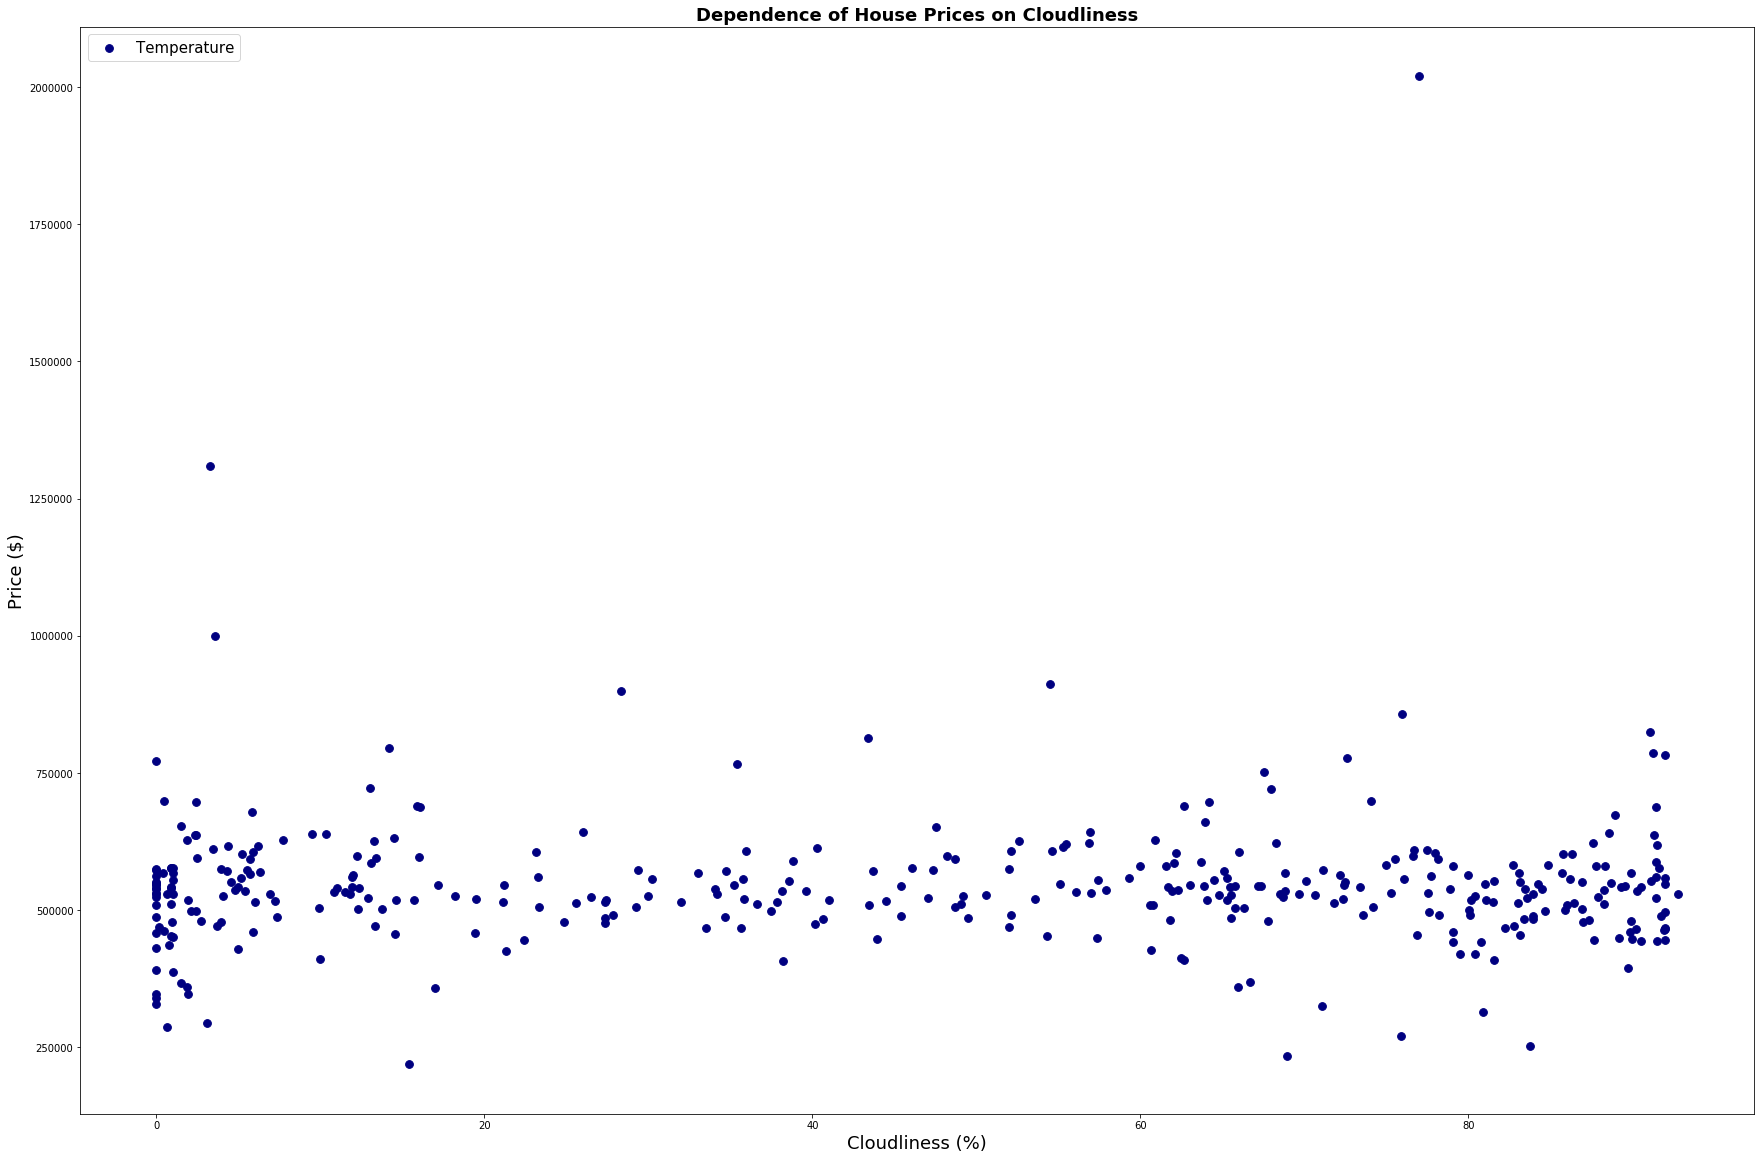

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [101]:
mergedtable.plot(x='Cloudliness', y='price', kind='scatter', color='navy', s=60)
x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Cloudliness", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(mergedtable, loc=2, prop={'size':15})

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('cloudlinessvshouseprices.png')


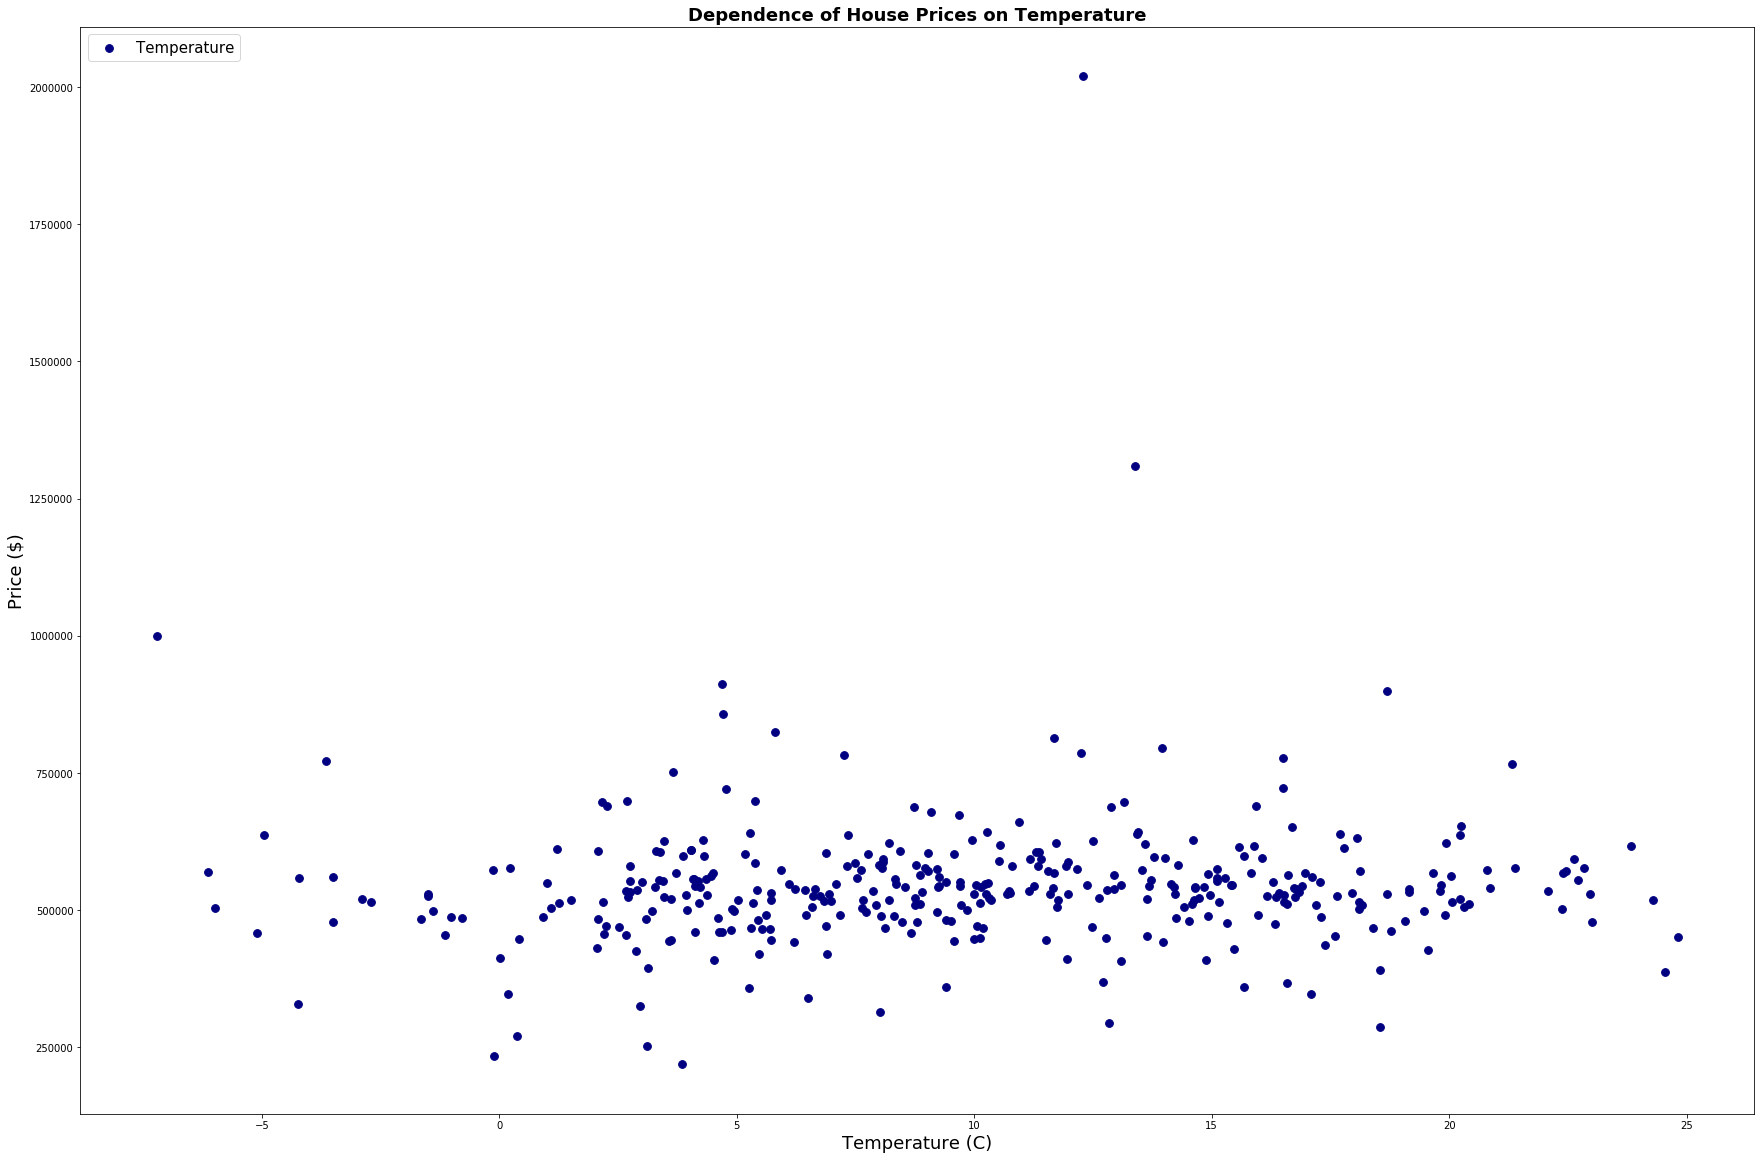

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [100]:
mergedtable.plot(x='Temperature (C)', y='price', kind='scatter', color='navy', s=60)

x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Temperature", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(mergedtable, loc=2, prop={'size':15})

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshouseprices.png')


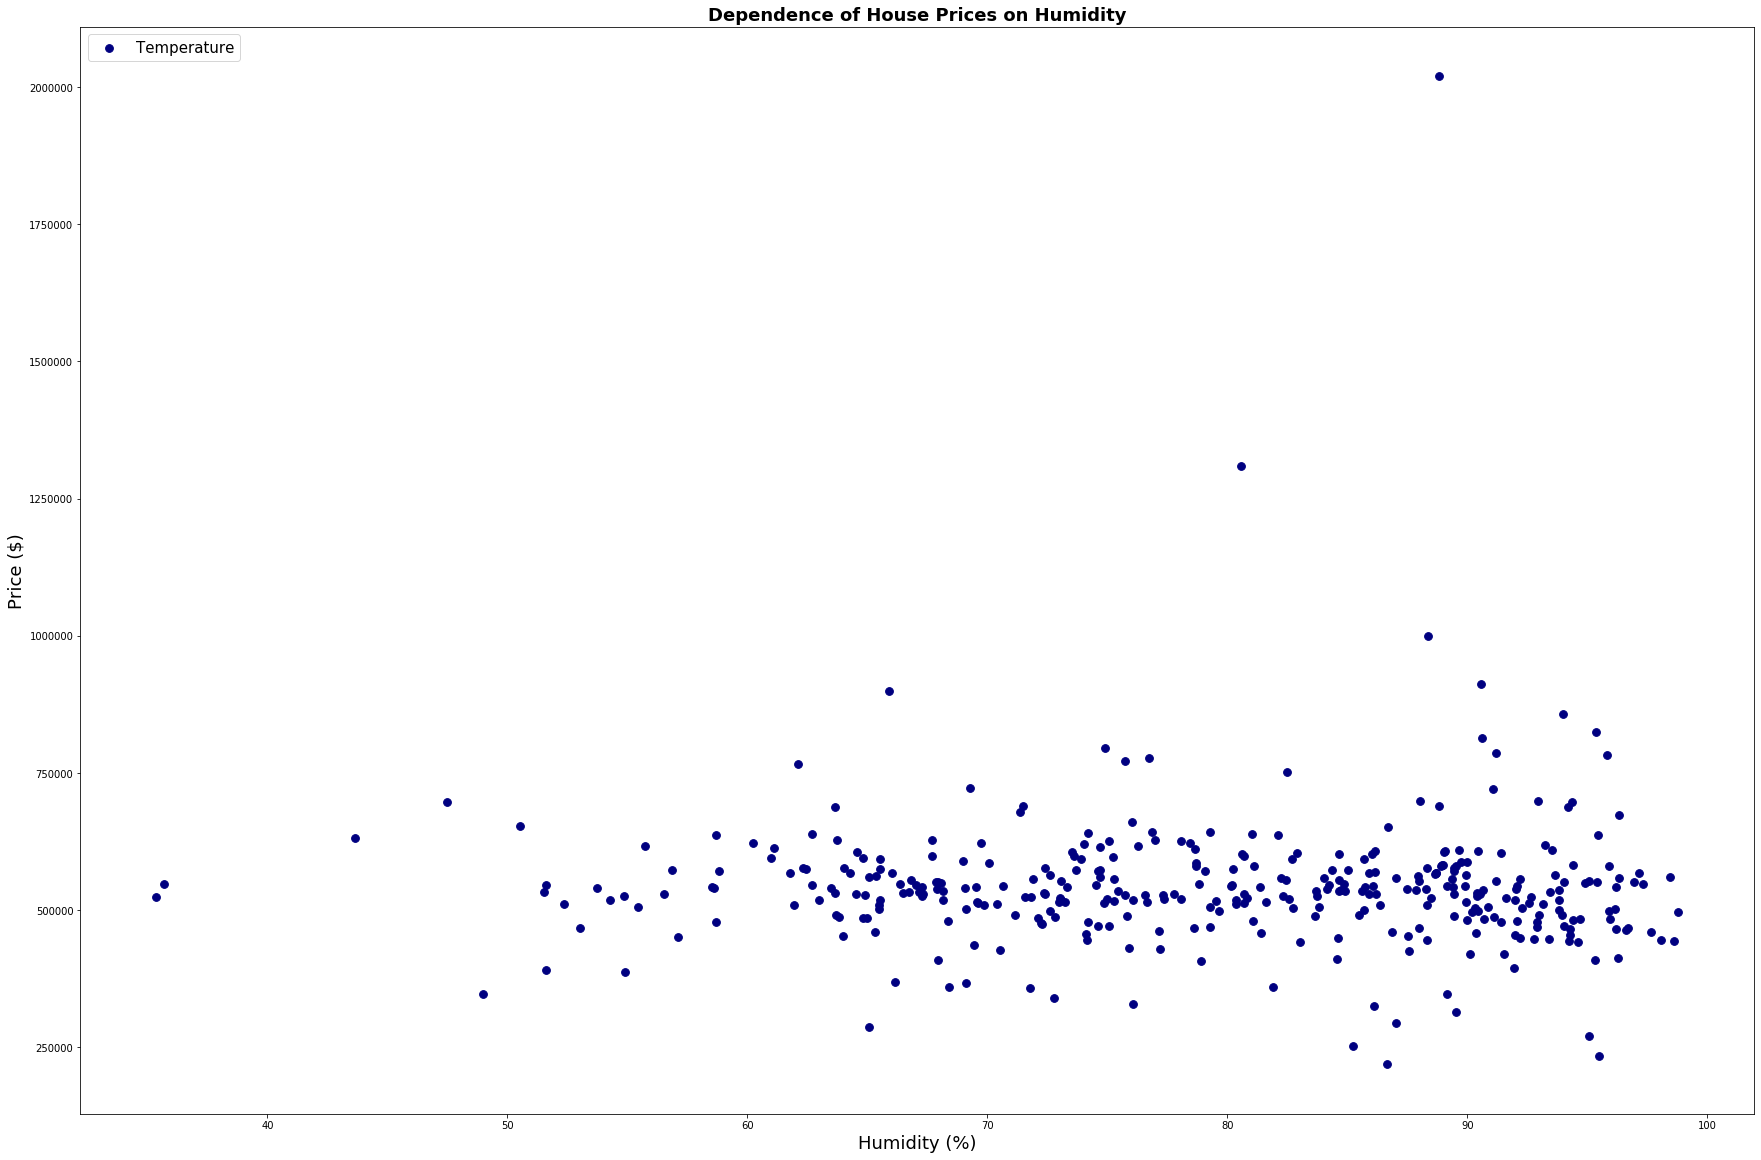

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [102]:
mergedtable.plot(x='Humidity', y='price', kind='scatter', color='navy', s=60)

x_lim = len(mergedtable.index)
# Chart title
plt.title("Dependence of House Prices on Humidity", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Price ($)", fontdict = {'fontsize': 18})
# legend 
plt.legend(mergedtable, loc=2, prop={'size':15})

plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('humidityvshouseprices.png')


In [36]:
housesalescount = df.groupby('date').count()
housesalescount

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  sqft_basement  yr_built  \
date                                     ...                            
2014-05-02          67    67         67  ...             67        67   
2014-05-03           4     4          4  ...              4         4   
2014-05-04           5     5          5  ...              5         5   
2014-05-05          84    84         84  ...             84        84   
2014-05-06          83    83         83  ...             83        83   
...                ...   ...        ...  ...            ...       ...   
2015-05-13          31    31         31  ...             31        31   
2015-05-14          11    11         11  ...             11        11   
2015-05-15           1     1          1  ...              1         1   
2015-05-24           1     1          1  ...              1         1   
2015-05-27           1     1          1  ...              1         1   

            yr_renovated  zipcode  lat  long  sqft_living15  sqft_lot15  \
date                                                                      
2014-05-02            67       67   67    67             67          67   
2014-05-03             4        4    4     4              4           4   
2014-05-04             5        5    5     5              5           5   
2014-05-05            84       84   84    84             84          84   
2014-05-06            83       83   83    83             83          83   
...                  ...      ...  ...   ...            ...         ...   
2015-05-13            31       31   31    31             31          31   
2015-05-14            11       11   11    11             11          11   
2015-05-15             1        1    1     1              1           1   
2015-05-24             1        1    1     1              1           1   
2015-05-27             1        1    1     1              1           1   

            date(Y/M)  date(Y)  
date                            
2014-05-02         67       67  
2014-05-03          4        4  
2014-05-04          5        5  
2014-05-05         84       84  
2014-05-06         83       83  
...               ...      ...  
2015-05-13         31       31  
2015-05-14         11       11  
2015-05-15          1        1  
2015-05-24          1        1  
2015-05-27          1        1  

[372 rows x 22 columns]

In [105]:
merged2= pd. merge(housesalescount, weatherbydateymd, on="date", how="inner" )
merged2

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-13  31     31        31         31           31        31      31   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  long  sqft_living15  sqft_lot15  \
date                                     ...                                    
2014-05-02          67    67         67  ...    67             67          67   
2014-05-03           4     4          4  ...     4              4           4   
2014-05-04           5     5          5  ...     5              5           5   
2014-05-05          84    84         84  ...    84             84          84   
2014-05-06          83    83         83  ...    83             83          83   
...                ...   ...        ...  ...   ...            ...         ...   
2015-05-13          31    31         31  ...    31             31          31   
2015-05-14          11    11         11  ...    11             11          11   
2015-05-15           1     1          1  ...     1              1           1   
2015-05-24           1     1          1  ...     1              1           1   
2015-05-27           1     1          1  ...     1              1           1   

            date(Y/M)  date(Y)  Temperature   Humidity  Cloudliness  \
date                                                                  
2014-05-02         67       67   289.313522  54.875000    18.208333   
2014-05-03          4        4   283.344961  78.625000    82.208333   
2014-05-04          5        5   282.110943  89.458333    91.625000   
2014-05-05         84       84   283.949583  89.541667    88.333333   
2014-05-06         83       83   284.307323  83.708333    38.125000   
...               ...      ...          ...        ...          ...   
2015-05-13         31       31   282.014440  93.166667    88.250000   
2015-05-14         11       11   282.183814  91.416667    77.958333   
2015-05-15          1        1   283.271395  84.625000    57.375000   
2015-05-24          1        1   284.667940  88.333333    87.666667   
2015-05-27          1        1   286.534792  80.583333     3.291667   

            Wind Speed  Temperature (C)  
date                                     
2014-05-02    0.708333        16.163522  
2014-05-03    1.000000        10.194961  
2014-05-04    0.958333         8.960943  
2014-05-05    1.666667        10.799583  
2014-05-06    1.166667        11.157323  
...                ...              ...  
2015-05-13    0.833333         8.864440  
2015-05-14    0.375000         9.033814  
2015-05-15    0.375000        10.121395  
2015-05-24    0.708333        11.517940  
2015-05-27    0.416667        13.384792  

[372 rows x 27 columns]

In [112]:
salescountvsweatherdf = merged2[["id", "Temperature (C)", "Humidity", "Cloudliness", "Wind Speed"]]
salescountvsweatherdf=salescountvsweatherdf.rename(columns={"id" : "Average Number of Houses Sold"})
salescountvsweatherdf

Average Number of Houses Sold  Temperature (C)   Humidity  \
date                                                                    
2014-05-02                             67        16.163522  54.875000   
2014-05-03                              4        10.194961  78.625000   
2014-05-04                              5         8.960943  89.458333   
2014-05-05                             84        10.799583  89.541667   
2014-05-06                             83        11.157323  83.708333   
...                                   ...              ...        ...   
2015-05-13                             31         8.864440  93.166667   
2015-05-14                             11         9.033814  91.416667   
2015-05-15                              1        10.121395  84.625000   
2015-05-24                              1        11.517940  88.333333   
2015-05-27                              1        13.384792  80.583333   

            Cloudliness  Wind Speed  
date                                 
2014-05-02    18.208333    0.708333  
2014-05-03    82.208333    1.000000  
2014-05-04    91.625000    0.958333  
2014-05-05    88.333333    1.666667  
2014-05-06    38.125000    1.166667  
...                 ...         ...  
2015-05-13    88.250000    0.833333  
2015-05-14    77.958333    0.375000  
2015-05-15    57.375000    0.375000  
2015-05-24    87.666667    0.708333  
2015-05-27     3.291667    0.416667  

[372 rows x 5 columns]

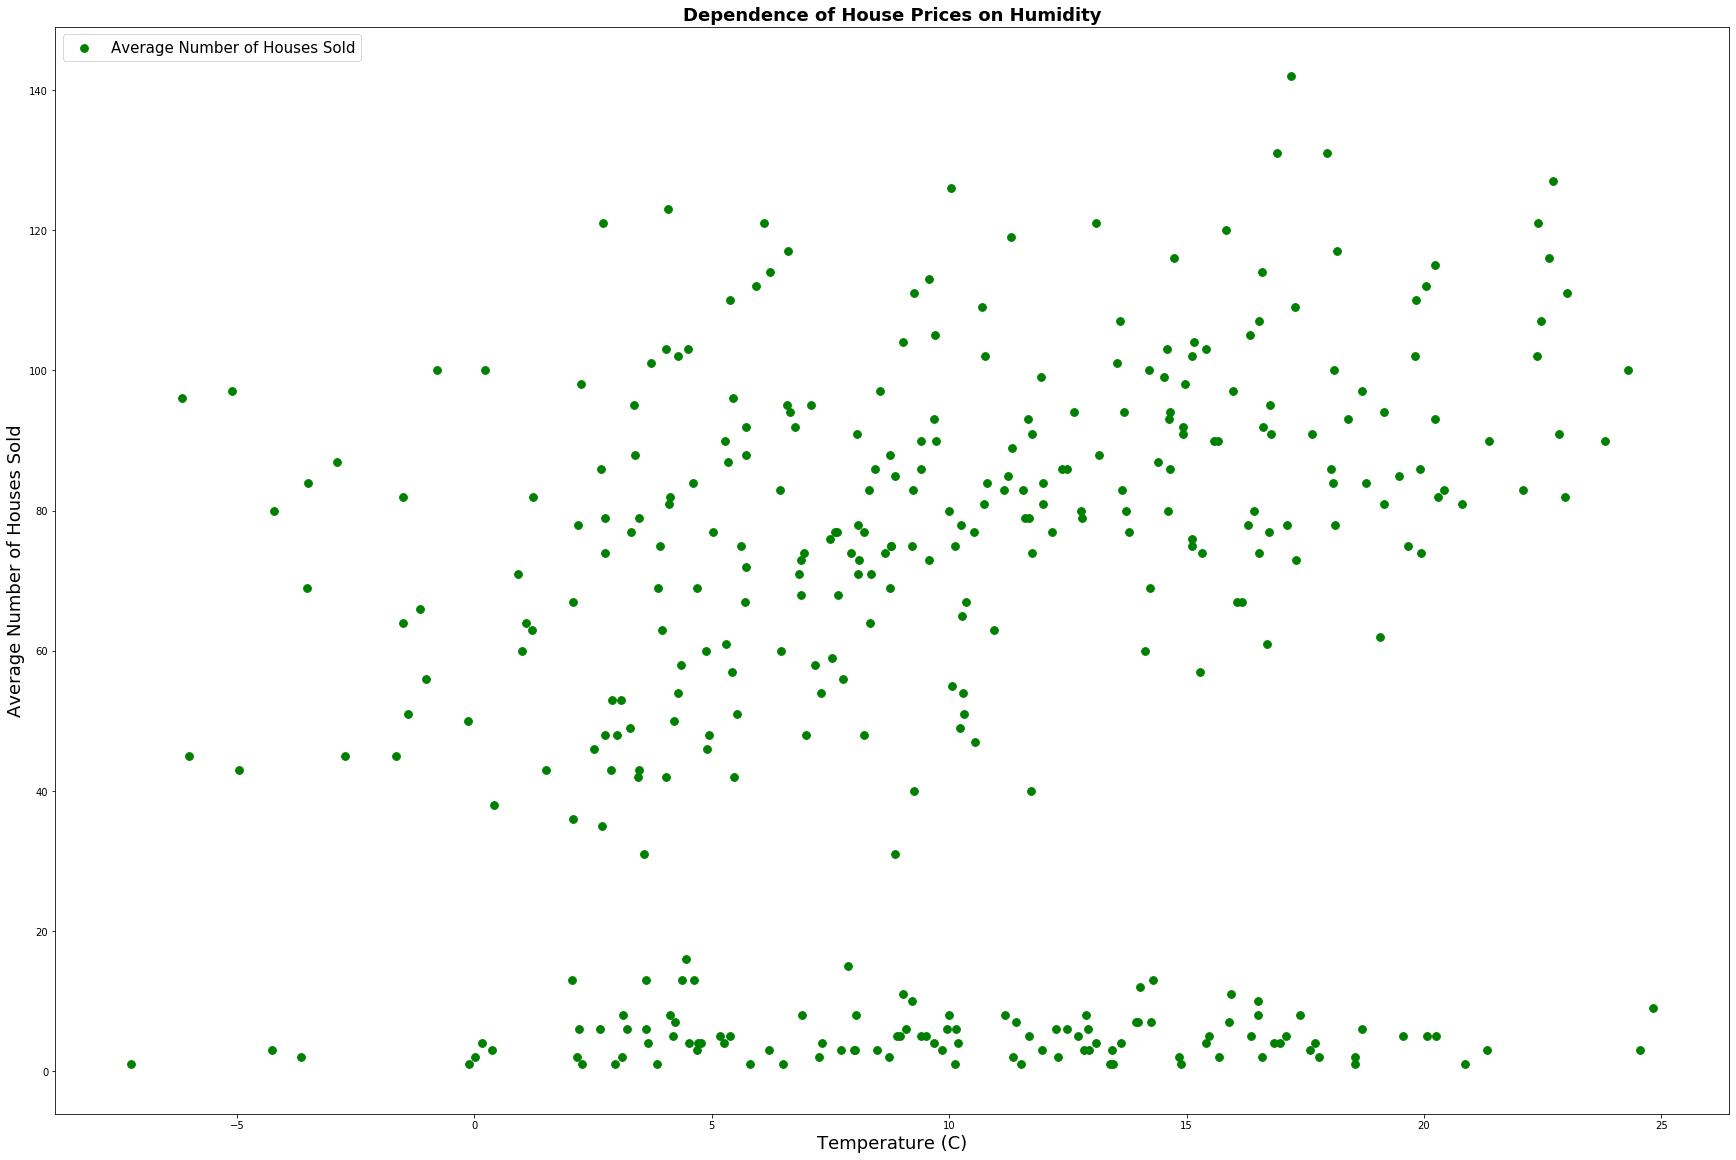

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [116]:
salescountvsweatherdf.plot(kind='scatter', x='Temperature (C)', y='Average Number of Houses Sold', color='green', s=60)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Temperature (C)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


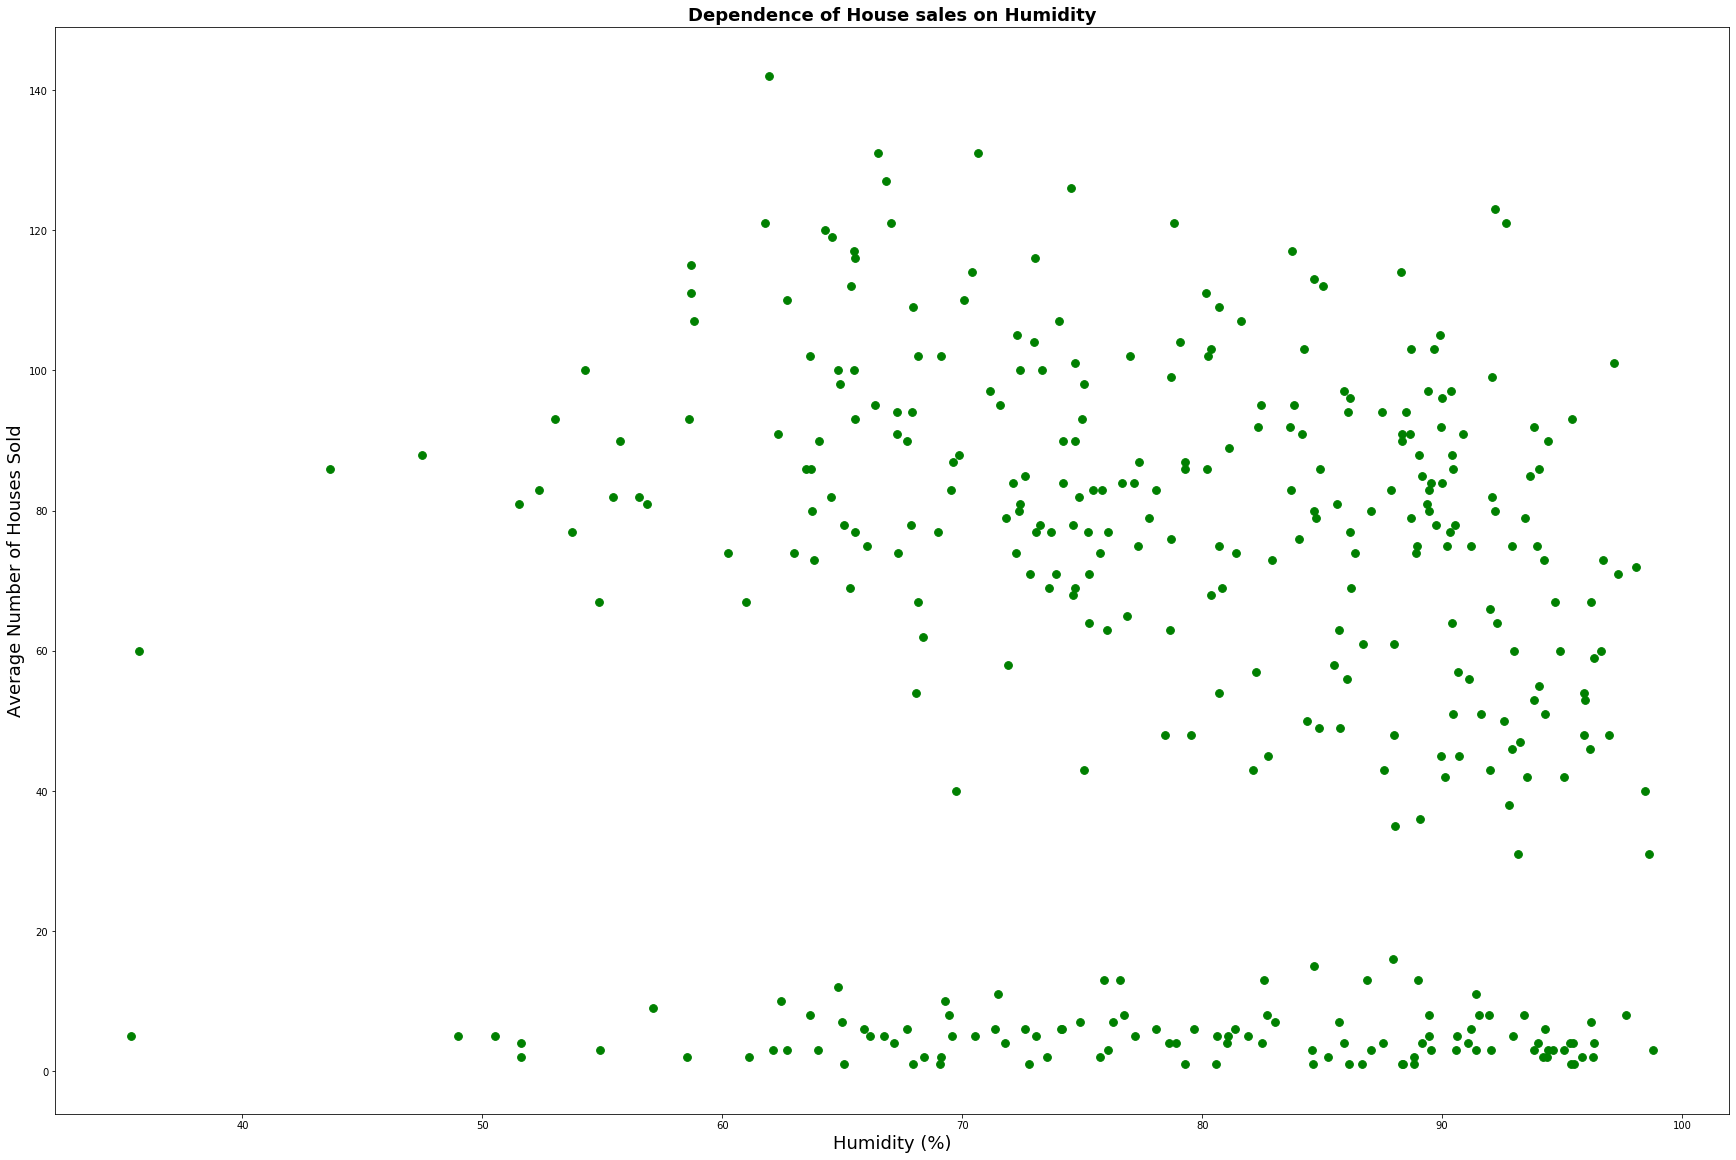

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [119]:
salescountvsweatherdf.plot(kind='scatter', x='Humidity', y='Average Number of Houses Sold', color='green', s=60)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Humidity", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Humidity (%)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')


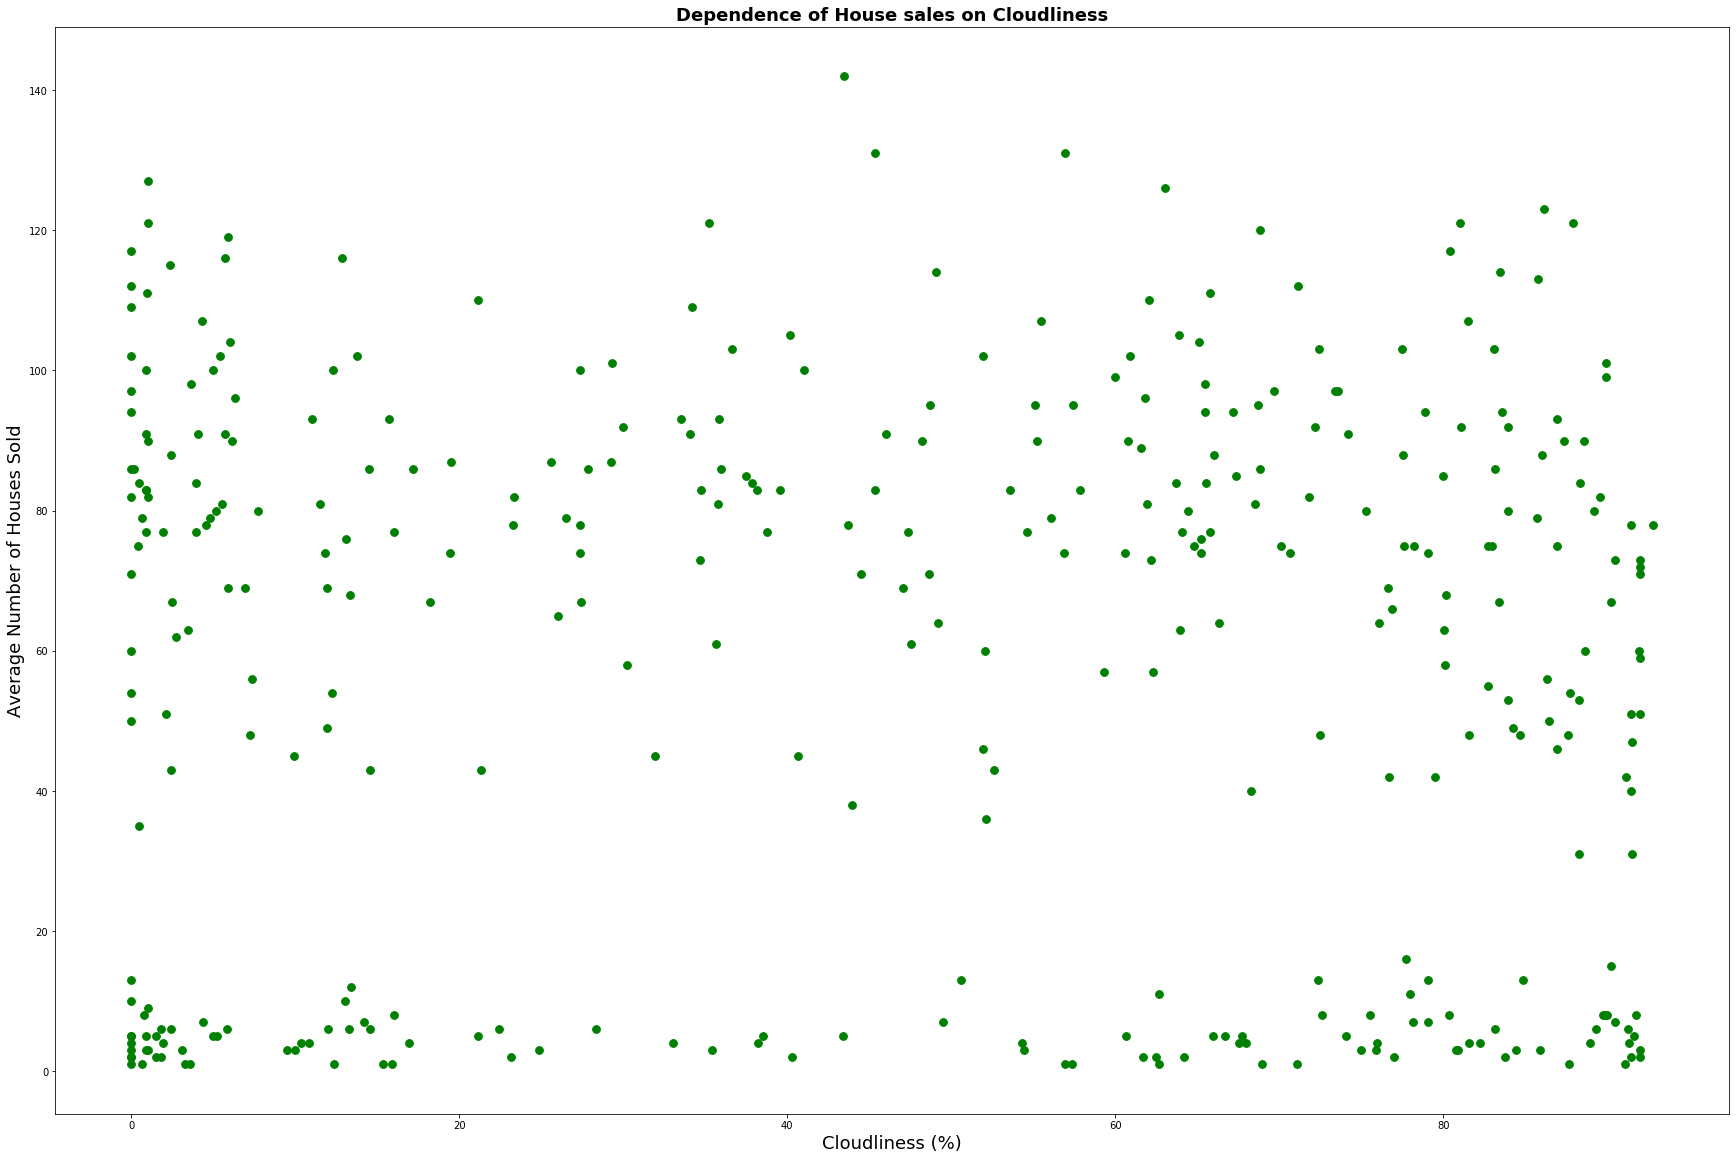

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [121]:
salescountvsweatherdf.plot(kind='scatter', x='Cloudliness', y='Average Number of Houses Sold', color='green', s=60)
x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Cloudliness", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Cloudliness (%)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('temperaturevshousesales.png')

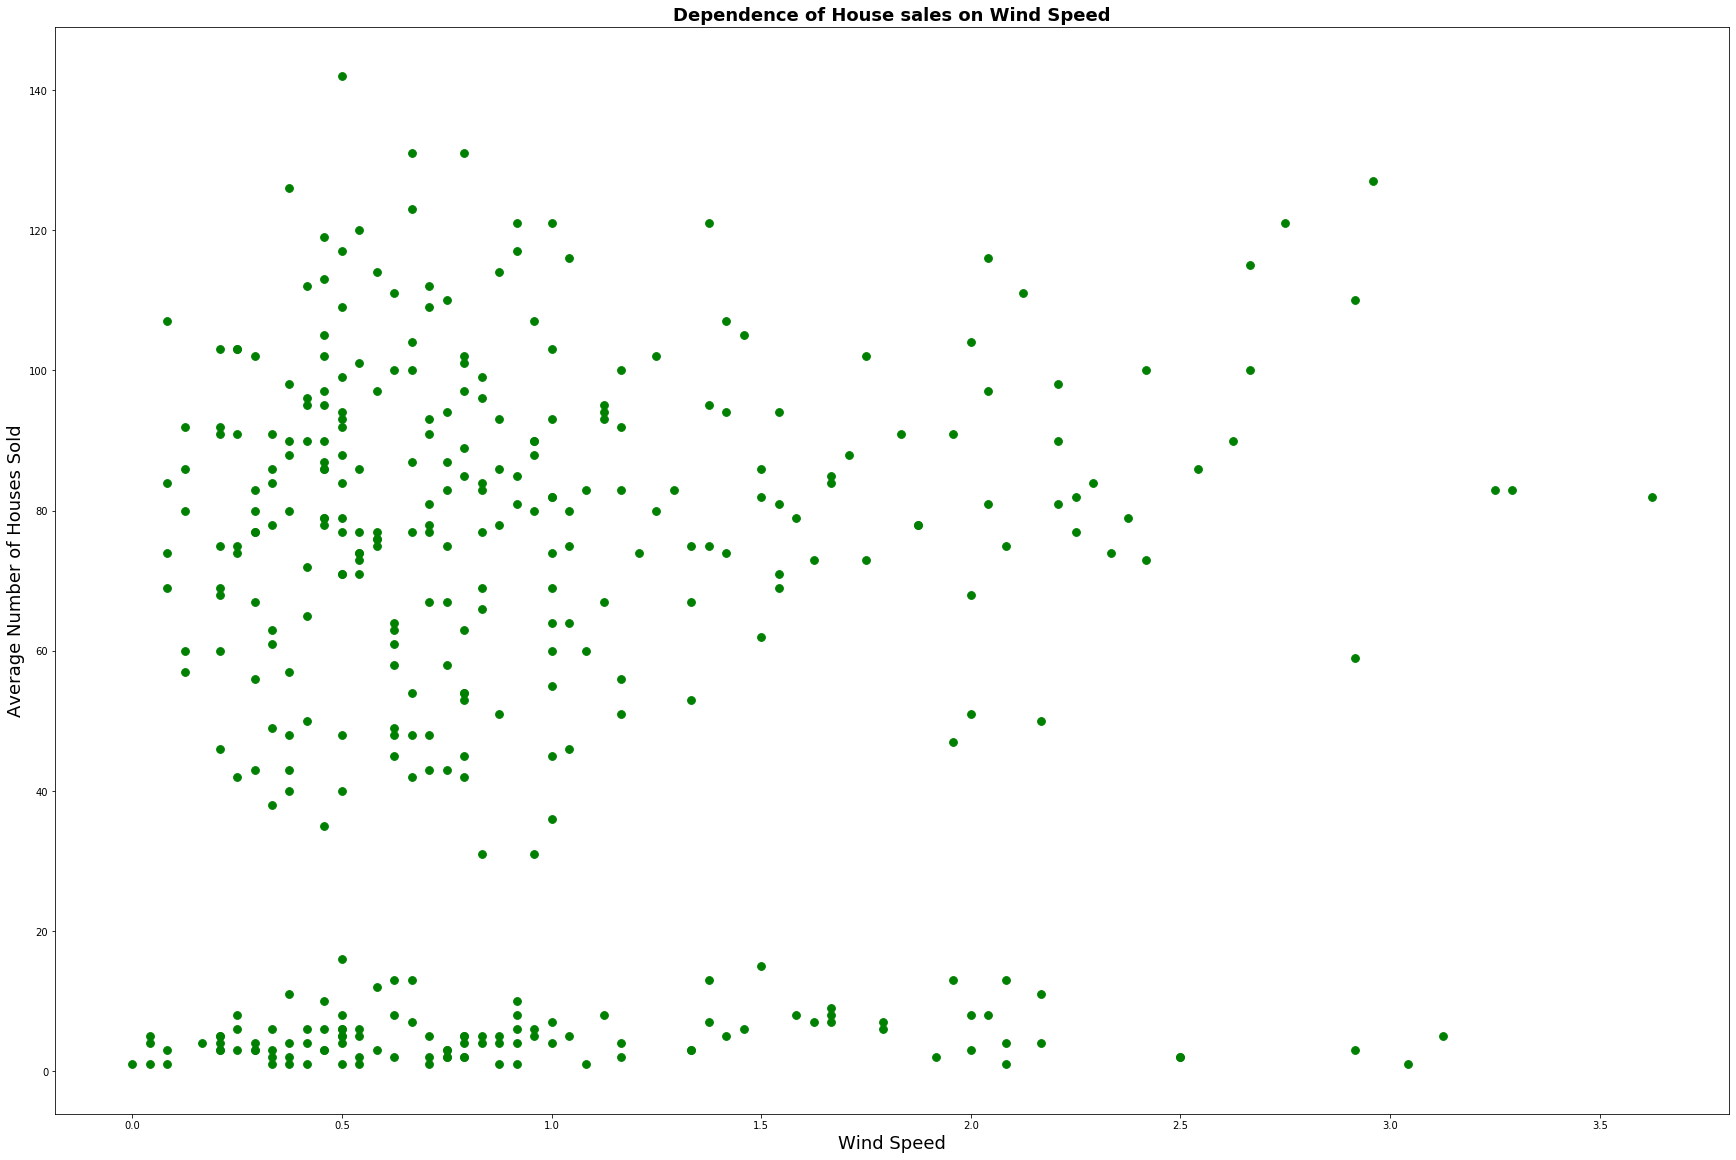

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [129]:
salescountvsweatherdf.plot(kind='scatter', x='Wind Speed', y='Average Number of Houses Sold', color='green', s=60)

x_lim = len(salescountvsweatherdf.index)
# Chart title
plt.title("Dependence of House sales on Wind Speed", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Wind Speed", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('windspeedvshousesales.png')

In [130]:
salescountbymonth = df.groupby('date(Y/M)').count()
salescountbymonth = salescountbymonth[['id']]
salescountbymonth = salescountbymonth.rename(columns={'id':'Average Number of the Houses Sold'})
salescountbymonth

Average Number of the Houses Sold
date(Y/M)                                   
2014-05                                 1768
2014-06                                 2180
2014-07                                 2211
2014-08                                 1940
2014-09                                 1774
2014-10                                 1878
2014-11                                 1411
2014-12                                 1471
2015-01                                  978
2015-02                                 1250
2015-03                                 1875
2015-04                                 2231
2015-05                                  646

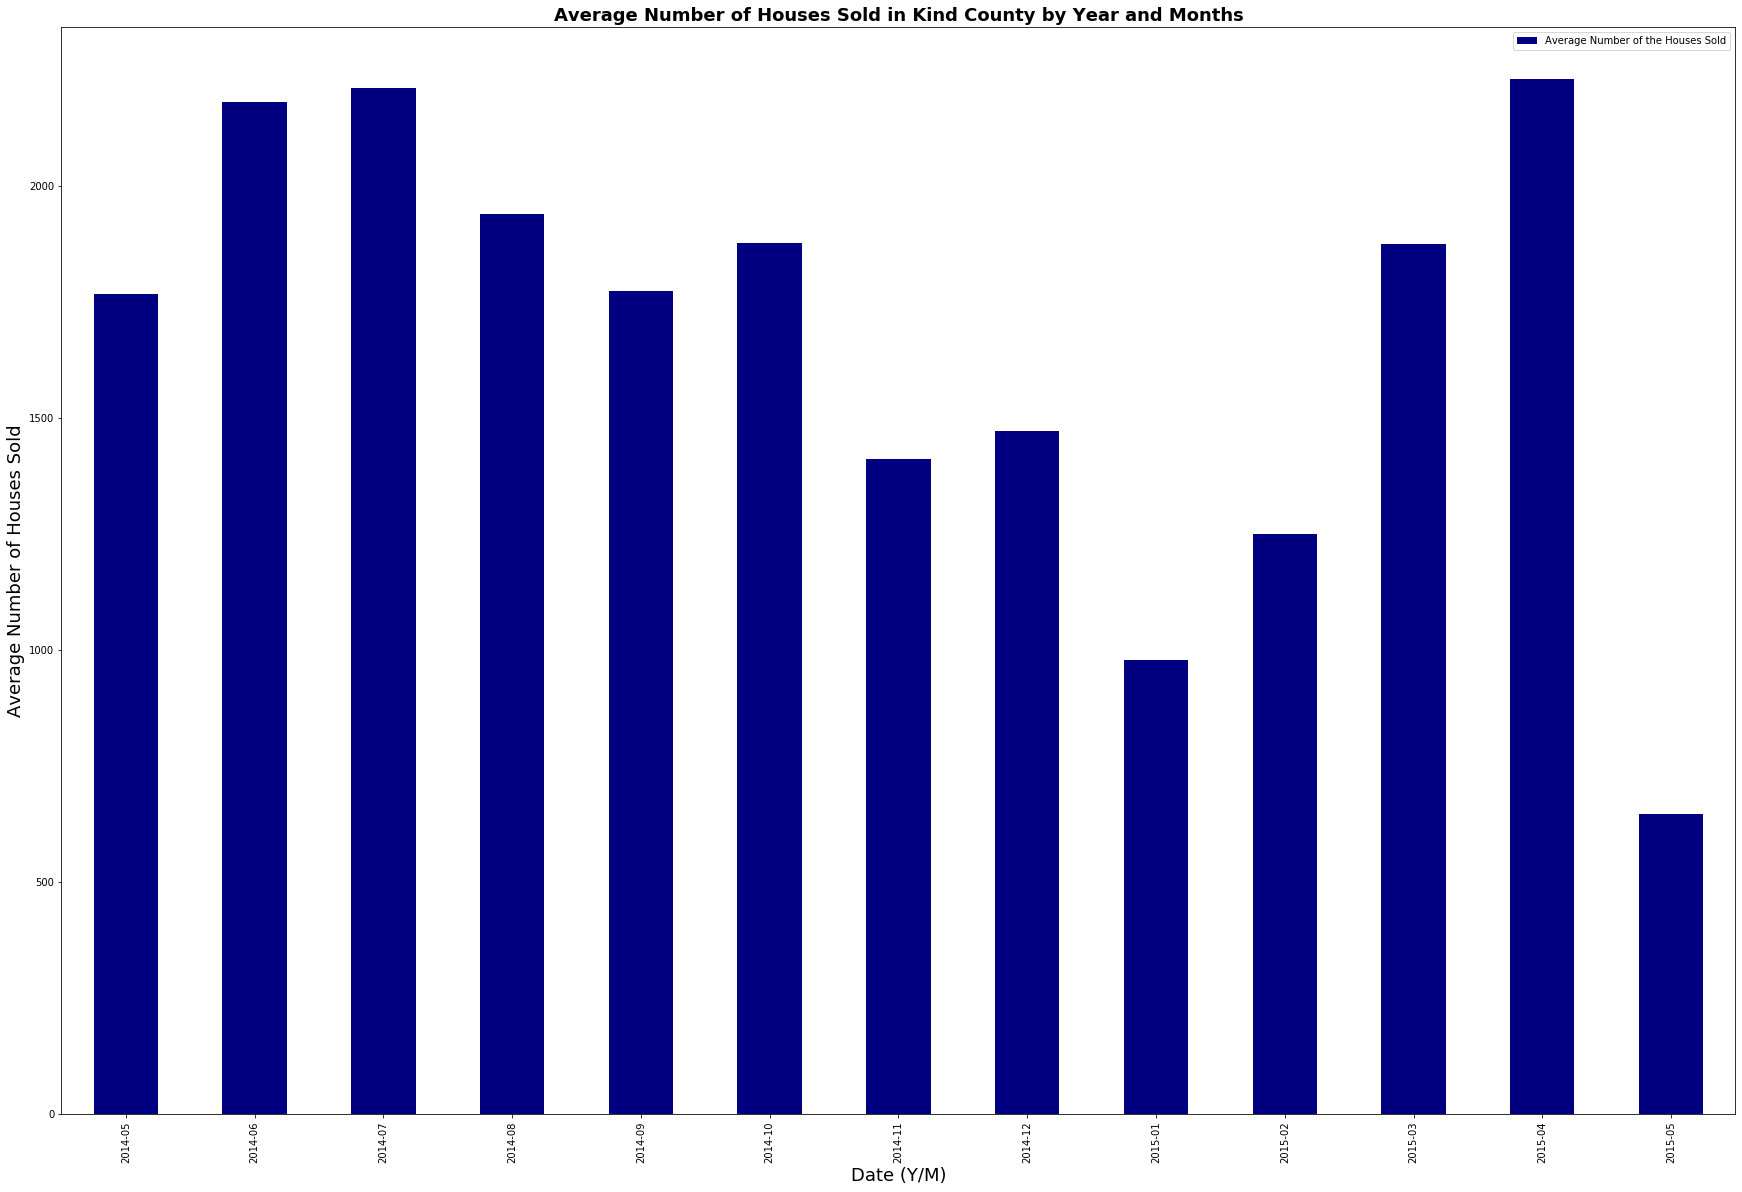

Current size: [30.0, 20.0]


<Figure size 2160x1440 with 0 Axes>

In [132]:
salescountbymonth.plot(kind='bar', y='Average Number of the Houses Sold', color='navy')

x_lim = len(salescountbymonth.index)
# Chart title
plt.title("Average Number of Houses Sold in Kind County by Year and Months", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
# x label
plt.xlabel("Date (Y/M)", fontdict = {'fontsize': 18})
# y label
plt.ylabel("Average Number of Houses Sold", fontdict = {'fontsize': 18})
# legend 


plt.show()
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('housessoldbyyearandmonth.png')

In [45]:
yadf = df.groupby('date(Y/M)').mean()
yadf

id          price  bedrooms  bathrooms  sqft_living  \
date(Y/M)                                                                  
2014-05    4.628282e+09  548166.600113  3.389706   2.139847  2114.912896   
2014-06    4.573257e+09  558123.736239  3.418349   2.163876  2132.820642   
2014-07    4.578350e+09  544892.161013  3.391678   2.146540  2128.246495   
2014-08    4.616929e+09  536527.039691  3.355670   2.123067  2084.762887   
2014-09    4.458143e+09  529315.868095  3.360203   2.130919  2077.375986   
2014-10    4.525103e+09  539127.477636  3.360490   2.118876  2083.896166   
2014-11    4.523550e+09  522058.861800  3.333806   2.079376  2048.768958   
2014-12    4.559764e+09  524602.893270  3.390891   2.102991  2091.339225   
2015-01    4.574031e+09  525963.251534  3.387526   2.129346  2085.094070   
2015-02    4.600261e+09  507919.603200  3.340000   2.059600  2010.974400   
2015-03    4.600587e+09  544057.683200  3.367467   2.065333  2021.968533   
2015-04    4.693827e+09  561933.463021  3.364859   2.106006  2060.377409   
2015-05    4.556021e+09  558193.095975  3.292570   2.052632  2023.741486   

               sqft_lot    floors  waterfront      view  condition     grade  \
date(Y/M)                                                                      
2014-05    15959.428167  1.493495    0.005656  0.247738   3.436086  7.724548   
2014-06    14260.094954  1.513303    0.008716  0.241743   3.460092  7.738532   
2014-07    13857.654907  1.522162    0.006784  0.221167   3.442786  7.716870   
2014-08    14636.380928  1.500258    0.006186  0.223196   3.440206  7.685567   
2014-09    15367.856257  1.490981    0.008455  0.248591   3.430665  7.640361   
2014-10    15489.720980  1.502929    0.008520  0.244409   3.411076  7.640043   
2014-11    15258.856130  1.500709    0.010631  0.221120   3.401843  7.610914   
2014-12    15330.740313  1.487084    0.008158  0.216859   3.394969  7.657376   
2015-01    17869.721881  1.478528    0.008180  0.246421   3.347648  7.642127   
2015-02    13703.131200  1.467600    0.004800  0.243200   3.404800  7.554400   
2015-03    15604.088533  1.464267    0.006933  0.238933   3.355733  7.588267   
2015-04    14265.989691  1.495069    0.008516  0.230390   3.359032  7.651277   
2015-05    18645.713622  1.465944    0.004644  0.215170   3.377709  7.537152   

            sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                          
2014-05    1797.126131     317.786765  1970.536765    118.639706   
2014-06    1822.365138     310.455505  1970.741284     80.543119   
2014-07    1841.531886     286.714609  1971.777024     92.125283   
2014-08    1798.204639     286.558247  1972.058247     78.193814   
2014-09    1785.519166     291.856821  1970.535513     99.047914   
2014-10    1787.299255     296.596912  1970.119808     94.473376   
2014-11    1775.916371     272.852587  1970.090716     87.574061   
2014-12    1787.078858     304.260367  1971.276003     77.410605   
2015-01    1814.019427     271.074642  1971.749489     73.433538   
2015-02    1726.692800     284.281600  1971.464000     51.055200   
2015-03    1740.604800     281.363733  1970.597333     82.976533   
2015-04    1777.770955     282.606455  1971.713133     70.670551   
2015-05    1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831 -122.209811    1995.676289  12960.812887  
2014-09    98078.445885  47.560565 -122.212648    1982.601466  11894.253100  
2014-10    98078.614483  47.562153 -122.217433    1981.560703  12989.555911  
2014-11    98078.540043  47.557782

Current size: [10.0, 8.0]


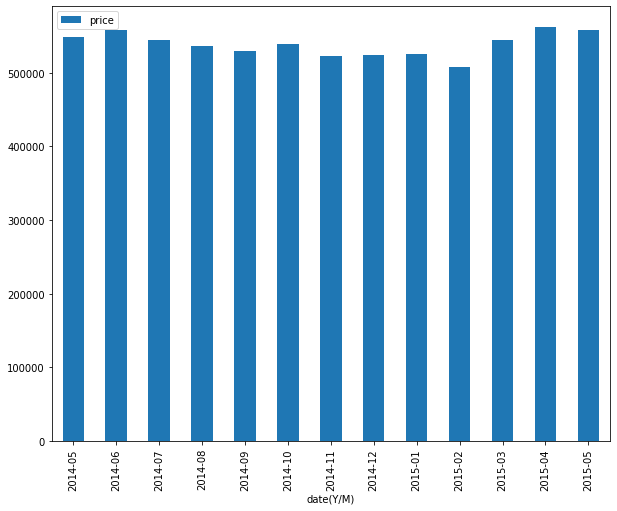

In [46]:
yadf.plot(kind='bar', y='price')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [47]:
weatherdata.groupby('date(Y/M)').mean()

Temperature   Humidity  Cloudliness  Wind Speed  Temperature (C)
date(Y/M)                                                                  
2013-01     275.691290  76.581989    64.669355    1.198925         2.541290
2013-02     279.166165  75.611607    76.558036    1.697917         6.016165
2013-03     280.288878  66.061828    60.897849    1.041667         7.138878
2013-04     282.609154  69.781944    58.947222    1.879167         9.459154
2013-05     286.735724  52.876344    42.327957    1.248656        13.585724
2013-06     289.409861  60.609722    49.747222    0.800000        16.259861
2013-07     291.451708  57.524194     8.356183    0.666667        18.301708
2013-08     291.062518  63.607527    39.805108    0.681452        17.912518
2013-09     288.450842  80.112500    50.676389    1.115278        15.300842
2013-10     281.637598  85.764785    35.830645    0.704301         8.487598
2013-11     280.901019  77.690278    18.868056    1.052778         7.751019
2013-12     276.099882  79.697581     7.888441    1.271505         2.949882
2014-01     278.654302  86.306040    15.046980    1.448322         5.504302
2014-02     273.004015  83.986607    60.784226    1.186012        -0.145985
2014-03     277.699942  86.451613    65.055108    0.923387         4.549942
2014-04     279.990869  78.173611    54.548611    0.770833         6.840869
2014-05     286.564395  71.299731    46.129032    1.259409        13.414395
2014-06     287.477004  73.752778    45.356944    1.083333        14.327004
2014-07     293.041122  66.193767    23.678862    2.107046        19.891122
2014-08     291.176412  72.879032    26.202957    0.750000        18.026412
2014-09     287.658711  72.355556    34.181944    0.504167        14.508711
2014-10     283.728193  86.837366    59.088710    0.647849        10.578193
2014-11     276.506622  86.575000    55.147222    1.251389         3.356622
2014-12     275.100354  89.362903    62.224462    1.044355         1.950354
2015-01     276.142706  91.057718    51.088591    0.708725         2.992706
2015-02     278.350498  86.285714    58.593750    0.668155         5.200498
2015-03     279.435907  81.182796    52.931452    0.677419         6.285907
2015-04     279.363240  78.016667    51.750000    0.695833         6.213240
2015-05     285.194640  76.911290    40.752688    0.543011        12.044640
2015-06     290.145892  59.127778    23.130556    0.912500        16.995892
2015-07     293.784321  58.559140    29.389785    2.010753        20.634321
2015-08     292.567782  62.408602    29.674731    2.073925        19.417782
2015-09     287.982857  73.697222    45.833333    1.758333        14.832857
2015-10     285.655920  85.044355    53.069892    1.466398        12.505920
2015-11     278.806833  87.933333    58.822222    1.594444         5.656833
2015-12     278.330198  89.267473    73.112903    2.182796         5.180198
2016-01     276.980000  56.000000     1.000000    0.000000         3.830000

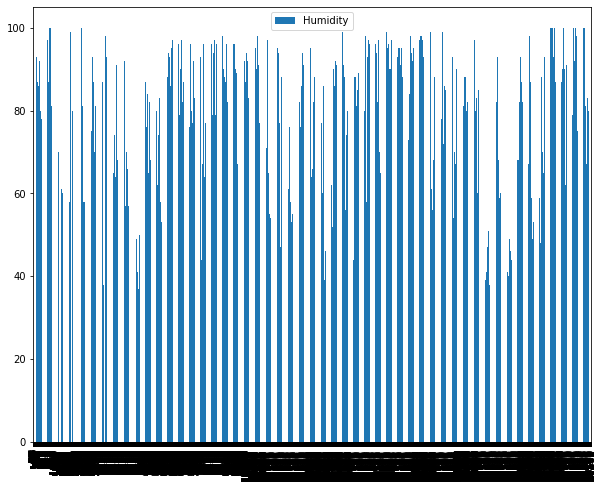

In [48]:
weatherdata.plot(kind='bar', y='Humidity')

In [49]:
humidityanalysis=weatherdata.loc[weatherdata['Humidity']>=50]
humidityanalysis.count()

date                 23236
Temperature          23236
Humidity             23236
Cloudliness          23236
Weather Condition    23236
Wind Speed           23236
Temperature (C)      23236
date(Y/M)            23236
dtype: int64

In [50]:
humidityanalysis=weatherdata.loc[weatherdata['Humidity']<=50]
humidityanalysis.count()

date                 3227
Temperature          3227
Humidity             3227
Cloudliness          3227
Weather Condition    3227
Wind Speed           3227
Temperature (C)      3227
date(Y/M)            3227
dtype: int64

In [51]:
windanalysis=weatherdata.loc[weatherdata['Wind Speed']<=3]
windanalysis.count()

date                 24724
Temperature          24724
Humidity             24724
Cloudliness          24724
Weather Condition    24724
Wind Speed           24724
Temperature (C)      24724
date(Y/M)            24724
dtype: int64

In [52]:
windanalysis=weatherdata.loc[weatherdata['Wind Speed']>=3]
windanalysis.count()

date                 3253
Temperature          3253
Humidity             3253
Cloudliness          3253
Weather Condition    3253
Wind Speed           3253
Temperature (C)      3253
date(Y/M)            3253
dtype: int64

In [53]:
tempanalysis=weatherdata.loc[weatherdata['Temperature (C)']>=0]
tempanalysis.count()

date                 24726
Temperature          24726
Humidity             24726
Cloudliness          24726
Weather Condition    24726
Wind Speed           24726
Temperature (C)      24726
date(Y/M)            24726
dtype: int64

In [54]:
tempanalysis=weatherdata.loc[weatherdata['Temperature (C)']<=0]
tempanalysis.count()

date                 1554
Temperature          1554
Humidity             1554
Cloudliness          1554
Weather Condition    1554
Wind Speed           1554
Temperature (C)      1554
date(Y/M)            1554
dtype: int64

In [55]:
merged3 = pd.merge(weatherdata, yadf, on='date(Y/M)', how='inner')
merged3

date  Temperature  Humidity  Cloudliness Weather Condition  \
0     2014-05-01   294.061000        31           10             Clear   
1     2014-05-01   295.522344        27           14            Clouds   
2     2014-05-01   293.620656        32           17            Clouds   
3     2014-05-01   292.005500        30           18            Clouds   
4     2014-05-01   290.008344        38           21            Clouds   
...          ...          ...       ...          ...               ...   
9494  2015-05-31   291.277000        54           90            Clouds   
9495  2015-05-31   292.217000        50           89            Clouds   
9496  2015-05-31   291.884000        52           86            Clouds   
9497  2015-05-31   293.248312        46           85            Clouds   
9498  2015-05-31   293.339656        46           82            Clouds   

      Wind Speed  Temperature (C) date(Y/M)            id          price  ...  \
0              1        20.911000   2014-05  4.628282e+09  548166.600113  ...   
1              1        22.372344   2014-05  4.628282e+09  548166.600113  ...   
2              1        20.470656   2014-05  4.628282e+09  548166.600113  ...   
3              1        18.855500   2014-05  4.628282e+09  548166.600113  ...   
4              1        16.858344   2014-05  4.628282e+09  548166.600113  ...   
...          ...              ...       ...           ...            ...  ...   
9494           1        18.127000   2015-05  4.556021e+09  558193.095975  ...   
9495           1        19.067000   2015-05  4.556021e+09  558193.095975  ...   
9496           1        18.734000   2015-05  4.556021e+09  558193.095975  ...   
9497           1        20.098313   2015-05  4.556021e+09  558193.095975  ...   
9498           1        20.189656   2015-05  4.556021e+09  558193.095975  ...   

         grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
0     7.724548  1797.126131     317.786765  1970.536765    118.639706   
1     7.724548  1797.126131     317.786765  1970.536765    118.639706   
2     7.724548  1797.126131     317.786765  1970.536765    118.639706   
3     7.724548  1797.126131     317.786765  1970.536765    118.639706   
4     7.724548  1797.126131     317.786765  1970.536765    118.639706   
...        ...          ...            ...          ...           ...   
9494  7.537152  1735.729102     288.012384  1969.340557     68.123839   
9495  7.537152  1735.729102     288.012384  1969.340557     68.123839   
9496  7.537152  1735.729102     288.012384  1969.340557     68.123839   
9497  7.537152  1735.729102     288.012384  1969.340557     68.123839   
9498  7.537152  1735.729102     288.012384  1969.340557     68.123839   

           zipcode        lat        long  sqft_living15    sqft_lot15  
0     98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
1     98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2     98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
3     98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
4     98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
...            ...        ...         ...            ...           ...  
9494  98079.077399  47.550514 -122.213435    1955.947368  15773.421053  
9495  98079.077399  47.550514 -122.213435    1955.947368  15773.421053  
9496  98079.077399  47.550514 -122.213435    1955.947368  15773.421053  
9497  98079.077399  47.550514 -122.213435    1955.947368  15773.421053  
9498  98079.077399  47.550514 -122.213435    1955.947368  15773.421053  

[9499 rows x 28 columns]

In [56]:
mergeddf = merged3.groupby('date(Y/M)').mean()
mergeddf

Temperature   Humidity  Cloudliness  Wind Speed  Temperature (C)  \
date(Y/M)                                                                     
2014-05     286.564395  71.299731    46.129032    1.259409        13.414395   
2014-06     287.477004  73.752778    45.356944    1.083333        14.327004   
2014-07     293.041122  66.193767    23.678862    2.107046        19.891122   
2014-08     291.176412  72.879032    26.202957    0.750000        18.026412   
2014-09     287.658711  72.355556    34.181944    0.504167        14.508711   
2014-10     283.728193  86.837366    59.088710    0.647849        10.578193   
2014-11     276.506622  86.575000    55.147222    1.251389         3.356622   
2014-12     275.100354  89.362903    62.224462    1.044355         1.950354   
2015-01     276.142706  91.057718    51.088591    0.708725         2.992706   
2015-02     278.350498  86.285714    58.593750    0.668155         5.200498   
2015-03     279.435907  81.182796    52.931452    0.677419         6.285907   
2015-04     279.363240  78.016667    51.750000    0.695833         6.213240   
2015-05     285.194640  76.911290    40.752688    0.543011        12.044640   

                     id          price  bedrooms  bathrooms  sqft_living  ...  \
date(Y/M)                                                                 ...   
2014-05    4.628282e+09  548166.600113  3.389706   2.139847  2114.912896  ...   
2014-06    4.573257e+09  558123.736239  3.418349   2.163876  2132.820642  ...   
2014-07    4.578350e+09  544892.161013  3.391678   2.146540  2128.246495  ...   
2014-08    4.616929e+09  536527.039691  3.355670   2.123067  2084.762887  ...   
2014-09    4.458143e+09  529315.868095  3.360203   2.130919  2077.375986  ...   
2014-10    4.525103e+09  539127.477636  3.360490   2.118876  2083.896166  ...   
2014-11    4.523550e+09  522058.861800  3.333806   2.079376  2048.768958  ...   
2014-12    4.559764e+09  524602.893270  3.390891   2.102991  2091.339225  ...   
2015-01    4.574031e+09  525963.251534  3.387526   2.129346  2085.094070  ...   
2015-02    4.600261e+09  507919.603200  3.340000   2.059600  2010.974400  ...   
2015-03    4.600587e+09  544057.683200  3.367467   2.065333  2021.968533  ...   
2015-04    4.693827e+09  561933.463021  3.364859   2.106006  2060.377409  ...   
2015-05    4.556021e+09  558193.095975  3.292570   2.052632  2023.741486  ...   

              grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
date(Y/M)                                                                    
2014-05    7.724548  1797.126131     317.786765  1970.536765    118.639706   
2014-06    7.738532  1822.365138     310.455505  1970.741284     80.543119   
2014-07    7.716870  1841.531886     286.714609  1971.777024     92.125283   
2014-08    7.685567  1798.204639     286.558247  1972.058247     78.193814   
2014-09    7.640361  1785.519166     291.856821  1970.535513     99.047914   
2014-10    7.640043  1787.299255     296.596912  1970.119808     94.473376   
2014-11    7.610914  1775.916371     272.852587  1970.090716     87.574061   
2014-12    7.657376  1787.078858     304.260367  1971.276003     77.410605   
2015-01    7.642127  1814.019427     271.074642  1971.749489     73.433538   
2015-02    7.554400  1726.692800     284.281600  1971.464000     51.055200   
2015-03    7.588267  1740.604800     281.363733  1970.597333     82.976533   
2015-04    7.651277  1777.770955     282.606455  1971.713133     70.670551   
2015-05    7.537152  1735.729102     288.012384  1969.340557     68.123839   

                zipcode        lat        long  sqft_living15    sqft_lot15  
date(Y/M)                                                                    
2014-05    98079.101244  47.570395 -122.215372    2003.056561  12935.194005  
2014-06    98079.594495  47.565591 -122.214406    2035.218807  12842.035780  
2014-07    98074.758933  47.560198 -122.206664    2029.130710  12584.116689  
2014-08    98077.058247  47.564831 -122.209811  

Current size: [10.0, 8.0]


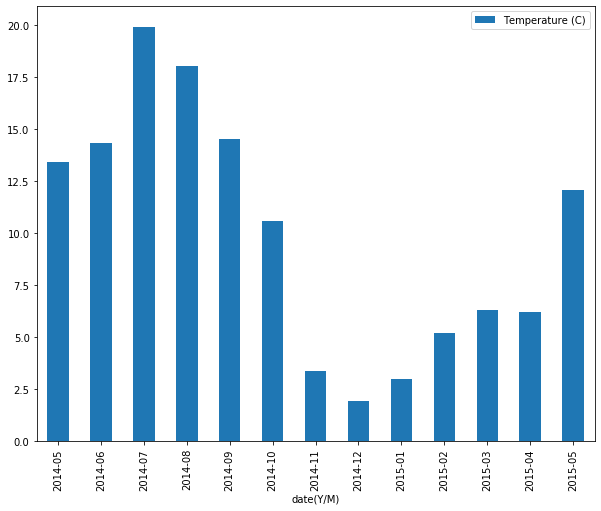

In [57]:
mergeddf.plot(kind='bar', y='Temperature (C)')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


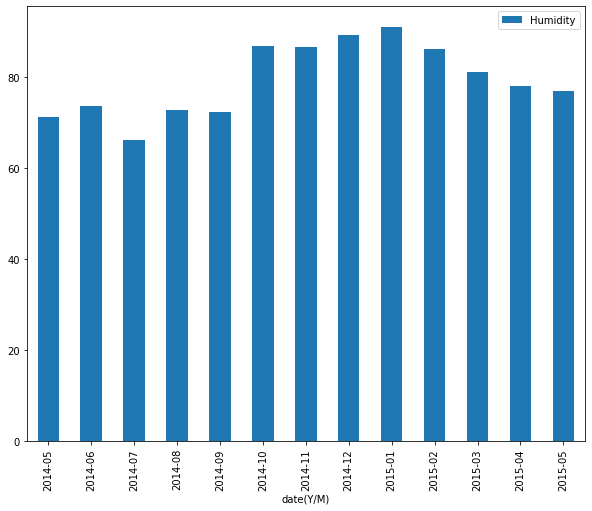

In [58]:
mergeddf.plot(kind='bar', y='Humidity')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


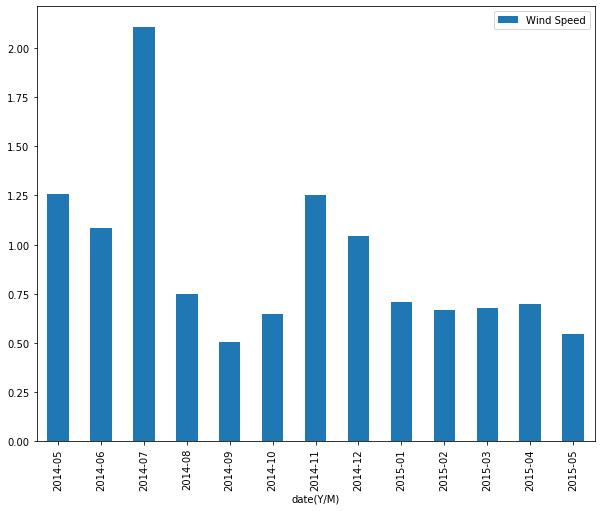

In [59]:
mergeddf.plot(kind='bar', y='Wind Speed')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [60]:
mergedcountdf = merged3.groupby('date(Y/M)').count()
mergedcountdf

date  Temperature  Humidity  Cloudliness  Weather Condition  \
date(Y/M)                                                                
2014-05     744          744       744          744                744   
2014-06     720          720       720          720                720   
2014-07     738          738       738          738                738   
2014-08     744          744       744          744                744   
2014-09     720          720       720          720                720   
2014-10     744          744       744          744                744   
2014-11     720          720       720          720                720   
2014-12     744          744       744          744                744   
2015-01     745          745       745          745                745   
2015-02     672          672       672          672                672   
2015-03     744          744       744          744                744   
2015-04     720          720       720          720                720   
2015-05     744          744       744          744                744   

           Wind Speed  Temperature (C)   id  price  bedrooms  ...  grade  \
date(Y/M)                                                     ...          
2014-05           744              744  744    744       744  ...    744   
2014-06           720              720  720    720       720  ...    720   
2014-07           738              738  738    738       738  ...    738   
2014-08           744              744  744    744       744  ...    744   
2014-09           720              720  720    720       720  ...    720   
2014-10           744              744  744    744       744  ...    744   
2014-11           720              720  720    720       720  ...    720   
2014-12           744              744  744    744       744  ...    744   
2015-01           745              745  745    745       745  ...    745   
2015-02           672              672  672    672       672  ...    672   
2015-03           744              744  744    744       744  ...    744   
2015-04           720              720  720    720       720  ...    720   
2015-05           744              744  744    744       744  ...    744   

           sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat  \
date(Y/M)                                                                    
2014-05           744            744       744           744      744  744   
2014-06           720            720       720           720      720  720   
2014-07           738            738       738           738      738  738   
2014-08           744            744       744           744      744  744   
2014-09           720            720       720           720      720  720   
2014-10           744            744       744           744      744  744   
2014-11           720            720       720           720      720  720   
2014-12           744            744       744           744      744  744   
2015-01           745            745       745           745      745  745   
2015-02           672            672       672           672      672  672   
2015-03           744            744       744           744      744  744   
2015-04           720            720       720           720      720  720   
2015-05           744            744       744           744      744  744   

           long  sqft_living15  sqft_lot15  
date(Y/M)                                   
2014-05     744            744         744  
2014-06     720            720         720  
2014-07     738            738         738  
2014-08     744            744         744  
2014-09     720            720         720  
2014-10     744            744         744  
2014-11     720            720         720  
2014-12     744            744         744  
2015-01     745            745         745  
2015-02     672            672         672  
2015-03     744            744         744  
201

Current size: [10.0, 8.0]


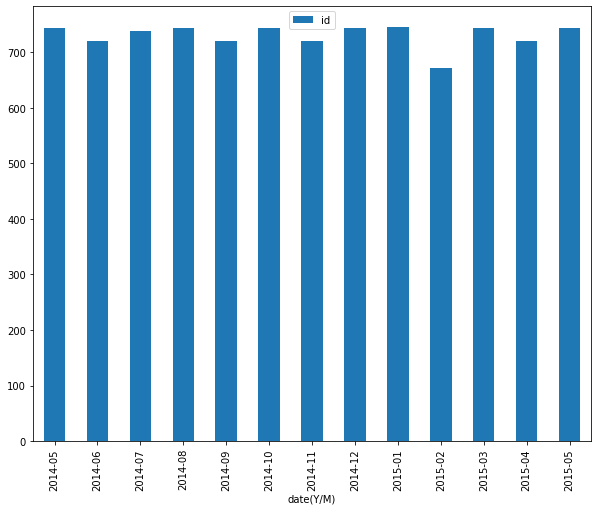

In [61]:
mergedcountdf.plot(kind='bar', y='id')

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [62]:
lessthantwenty=merged2.loc[merged2['id']<=20]
lessthantwenty

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-10   5      5         5          5            5         5       5   
2014-05-11   2      2         2          2            2         2       2   
2014-05-17   1      1         1          1            1         1       1   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-10   2      2         2          2            2         2       2   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  long  sqft_living15  sqft_lot15  \
date                                     ...                                    
2014-05-03           4     4          4  ...     4              4           4   
2014-05-04           5     5          5  ...     5              5           5   
2014-05-10           5     5          5  ...     5              5           5   
2014-05-11           2     2          2  ...     2              2           2   
2014-05-17           1     1          1  ...     1              1           1   
...                ...   ...        ...  ...   ...            ...         ...   
2015-05-10           2     2          2  ...     2              2           2   
2015-05-14          11    11         11  ...    11             11          11   
2015-05-15           1     1          1  ...     1              1           1   
2015-05-24           1     1          1  ...     1              1           1   
2015-05-27           1     1          1  ...     1              1           1   

            date(Y/M)  date(Y)  Temperature   Humidity  Cloudliness  \
date                                                                  
2014-05-03          4        4   283.344961  78.625000    82.208333   
2014-05-04          5        5   282.110943  89.458333    91.625000   
2014-05-10          5        5   282.666208  81.083333    67.750000   
2014-05-11          2        2   284.505417  73.541667    23.166667   
2014-05-17          1        1   288.030000  67.958333    62.666667   
...               ...      ...          ...        ...          ...   
2015-05-10          2        2   287.988667  58.541667    61.666667   
2015-05-14         11       11   282.183814  91.416667    77.958333   
2015-05-15          1        1   283.271395  84.625000    57.375000   
2015-05-24          1        1   284.667940  88.333333    87.666667   
2015-05-27          1        1   286.534792  80.583333     3.291667   

            Wind Speed  Temperature (C)  
date                                     
2014-05-03    1.000000        10.194961  
2014-05-04    0.958333         8.960943  
2014-05-10    1.041667         9.516208  
2014-05-11    1.166667        11.355417  
2014-05-17    2.083333        14.880000  
...                ...              ...  
2015-05-10    0.375000        14.838667  
2015-05-14    0.375000         9.033814  
2015-05-15    0.375000        10.121395  
2015-05-24    0.708333        11.517940  
2015-05-27    0.416667        13.384792  

[112 rows x 27 columns]

In [63]:
morethantwenty=merged2.loc[merged2['id']>=20]
morethantwenty

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
2014-05-07  93     93        93         93           93        93      93   
2014-05-08  81     81        81         81           81        81      81   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-07  76     76        76         76           76        76      76   
2015-05-08  54     54        54         54           54        54      54   
2015-05-11  40     40        40         40           40        40      40   
2015-05-12  49     49        49         49           49        49      49   
2015-05-13  31     31        31         31           31        31      31   

            waterfront  view  condition  ...  long  sqft_living15  sqft_lot15  \
date                                     ...                                    
2014-05-02          67    67         67  ...    67             67          67   
2014-05-05          84    84         84  ...    84             84          84   
2014-05-06          83    83         83  ...    83             83          83   
2014-05-07          93    93         93  ...    93             93          93   
2014-05-08          81    81         81  ...    81             81          81   
...                ...   ...        ...  ...   ...            ...         ...   
2015-05-07          76    76         76  ...    76             76          76   
2015-05-08          54    54         54  ...    54             54          54   
2015-05-11          40    40         40  ...    40             40          40   
2015-05-12          49    49         49  ...    49             49          49   
2015-05-13          31    31         31  ...    31             31          31   

            date(Y/M)  date(Y)  Temperature   Humidity  Cloudliness  \
date                                                                  
2014-05-02         67       67   289.313522  54.875000    18.208333   
2014-05-05         84       84   283.949583  89.541667    88.333333   
2014-05-06         83       83   284.307323  83.708333    38.125000   
2014-05-07         93       93   284.811917  58.625000    11.000000   
2014-05-08         81       81   285.125833  72.416667    68.500000   
...               ...      ...          ...        ...          ...   
2015-05-07         76       76   280.646233  78.708333    13.083333   
2015-05-08         54       54   283.436815  68.083333     0.000000   
2015-05-11         40       40   284.871434  69.750000    68.291667   
2015-05-12         49       49   283.380355  84.875000    84.250000   
2015-05-13         31       31   282.014440  93.166667    88.250000   

            Wind Speed  Temperature (C)  
date                                     
2014-05-02    0.708333        16.163522  
2014-05-05    1.666667        10.799583  
2014-05-06    1.166667        11.157323  
2014-05-07    1.000000        11.661917  
2014-05-08    0.916667        11.975833  
...                ...              ...  
2015-05-07    0.583333         7.496233  
2015-05-08    0.791667        10.286815  
2015-05-11    0.500000        11.721434  
2015-05-12    0.625000        10.230355  
2015-05-13    0.833333         8.864440  

[260 rows x 27 columns]

In [64]:
lessdf=pd.merge(lessthantwenty, weatherbydateymd, on='date', how='inner')
lessdf

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-03   4      4         4          4            4         4       4   
2014-05-04   5      5         5          5            5         5       5   
2014-05-10   5      5         5          5            5         5       5   
2014-05-11   2      2         2          2            2         2       2   
2014-05-17   1      1         1          1            1         1       1   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-10   2      2         2          2            2         2       2   
2015-05-14  11     11        11         11           11        11      11   
2015-05-15   1      1         1          1            1         1       1   
2015-05-24   1      1         1          1            1         1       1   
2015-05-27   1      1         1          1            1         1       1   

            waterfront  view  condition  ...  Temperature_x  Humidity_x  \
date                                     ...                              
2014-05-03           4     4          4  ...     283.344961   78.625000   
2014-05-04           5     5          5  ...     282.110943   89.458333   
2014-05-10           5     5          5  ...     282.666208   81.083333   
2014-05-11           2     2          2  ...     284.505417   73.541667   
2014-05-17           1     1          1  ...     288.030000   67.958333   
...                ...   ...        ...  ...            ...         ...   
2015-05-10           2     2          2  ...     287.988667   58.541667   
2015-05-14          11    11         11  ...     282.183814   91.416667   
2015-05-15           1     1          1  ...     283.271395   84.625000   
2015-05-24           1     1          1  ...     284.667940   88.333333   
2015-05-27           1     1          1  ...     286.534792   80.583333   

            Cloudliness_x  Wind Speed_x  Temperature (C)_x  Temperature_y  \
date                                                                        
2014-05-03      82.208333      1.000000          10.194961     283.344961   
2014-05-04      91.625000      0.958333           8.960943     282.110943   
2014-05-10      67.750000      1.041667           9.516208     282.666208   
2014-05-11      23.166667      1.166667          11.355417     284.505417   
2014-05-17      62.666667      2.083333          14.880000     288.030000   
...                   ...           ...                ...            ...   
2015-05-10      61.666667      0.375000          14.838667     287.988667   
2015-05-14      77.958333      0.375000           9.033814     282.183814   
2015-05-15      57.375000      0.375000          10.121395     283.271395   
2015-05-24      87.666667      0.708333          11.517940     284.667940   
2015-05-27       3.291667      0.416667          13.384792     286.534792   

            Humidity_y  Cloudliness_y  Wind Speed_y  Temperature (C)_y  
date                                                                    
2014-05-03   78.625000      82.208333      1.000000          10.194961  
2014-05-04   89.458333      91.625000      0.958333           8.960943  
2014-05-10   81.083333      67.750000      1.041667           9.516208  
2014-05-11   73.541667      23.166667      1.166667          11.355417  
2014-05-17   67.958333      62.666667      2.083333          14.880000  
...                ...            ...           ...                ...  
2015-05-10   58.541667      61.666667      0.375000          14.838667  
2015-05-14   91.416667      77.958333      0.375000           9.033814  
2015-05-15   84.625000      57.375000      0.375000          10.121395  
2015-05-24   88.333333      87.666667      0.708333          11.517940  
2015-05-27   80.583333       3.291667      0.416667          13.384792  

[112 rows x 32 columns]

In [65]:
moredf=pd.merge(morethantwenty, weatherbydateymd, on='date', how='inner')
moredf

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                        
2014-05-02  67     67        67         67           67        67      67   
2014-05-05  84     84        84         84           84        84      84   
2014-05-06  83     83        83         83           83        83      83   
2014-05-07  93     93        93         93           93        93      93   
2014-05-08  81     81        81         81           81        81      81   
...         ..    ...       ...        ...          ...       ...     ...   
2015-05-07  76     76        76         76           76        76      76   
2015-05-08  54     54        54         54           54        54      54   
2015-05-11  40     40        40         40           40        40      40   
2015-05-12  49     49        49         49           49        49      49   
2015-05-13  31     31        31         31           31        31      31   

            waterfront  view  condition  ...  Temperature_x  Humidity_x  \
date                                     ...                              
2014-05-02          67    67         67  ...     289.313522   54.875000   
2014-05-05          84    84         84  ...     283.949583   89.541667   
2014-05-06          83    83         83  ...     284.307323   83.708333   
2014-05-07          93    93         93  ...     284.811917   58.625000   
2014-05-08          81    81         81  ...     285.125833   72.416667   
...                ...   ...        ...  ...            ...         ...   
2015-05-07          76    76         76  ...     280.646233   78.708333   
2015-05-08          54    54         54  ...     283.436815   68.083333   
2015-05-11          40    40         40  ...     284.871434   69.750000   
2015-05-12          49    49         49  ...     283.380355   84.875000   
2015-05-13          31    31         31  ...     282.014440   93.166667   

            Cloudliness_x  Wind Speed_x  Temperature (C)_x  Temperature_y  \
date                                                                        
2014-05-02      18.208333      0.708333          16.163522     289.313522   
2014-05-05      88.333333      1.666667          10.799583     283.949583   
2014-05-06      38.125000      1.166667          11.157323     284.307323   
2014-05-07      11.000000      1.000000          11.661917     284.811917   
2014-05-08      68.500000      0.916667          11.975833     285.125833   
...                   ...           ...                ...            ...   
2015-05-07      13.083333      0.583333           7.496233     280.646233   
2015-05-08       0.000000      0.791667          10.286815     283.436815   
2015-05-11      68.291667      0.500000          11.721434     284.871434   
2015-05-12      84.250000      0.625000          10.230355     283.380355   
2015-05-13      88.250000      0.833333           8.864440     282.014440   

            Humidity_y  Cloudliness_y  Wind Speed_y  Temperature (C)_y  
date                                                                    
2014-05-02   54.875000      18.208333      0.708333          16.163522  
2014-05-05   89.541667      88.333333      1.666667          10.799583  
2014-05-06   83.708333      38.125000      1.166667          11.157323  
2014-05-07   58.625000      11.000000      1.000000          11.661917  
2014-05-08   72.416667      68.500000      0.916667          11.975833  
...                ...            ...           ...                ...  
2015-05-07   78.708333      13.083333      0.583333           7.496233  
2015-05-08   68.083333       0.000000      0.791667          10.286815  
2015-05-11   69.750000      68.291667      0.500000          11.721434  
2015-05-12   84.875000      84.250000      0.625000          10.230355  
2015-05-13   93.166667      88.250000      0.833333           8.864440  

[260 rows x 32 columns]

Current size: [10.0, 8.0]


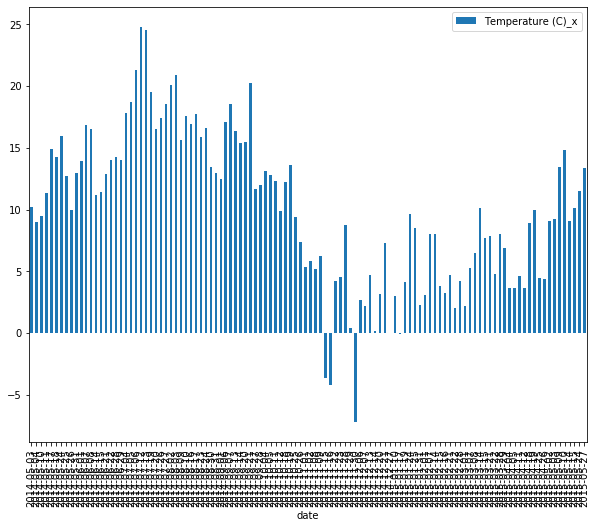

In [66]:
lessdf.plot(kind='bar', y='Temperature (C)_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


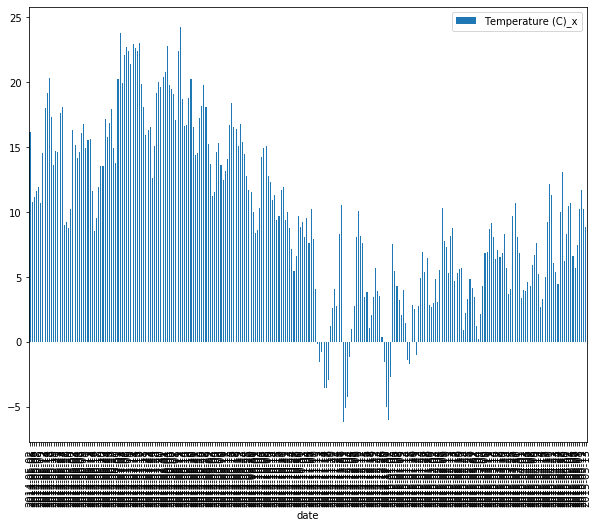

In [67]:
moredf.plot(kind='bar', y='Temperature (C)_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


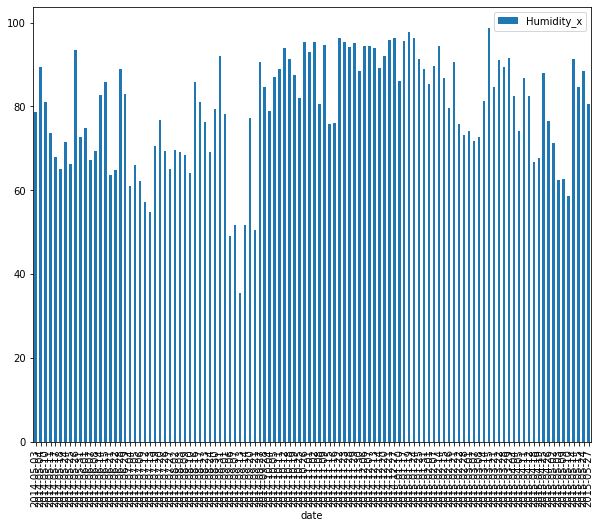

In [68]:
lessdf.plot(kind='bar', y='Humidity_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


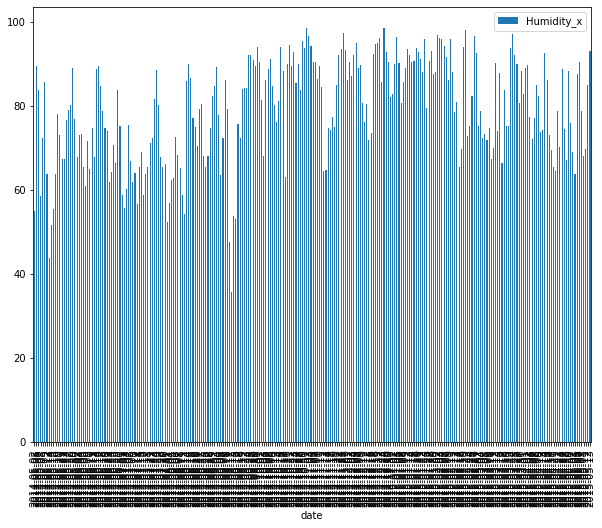

In [69]:
moredf.plot(kind='bar', y='Humidity_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


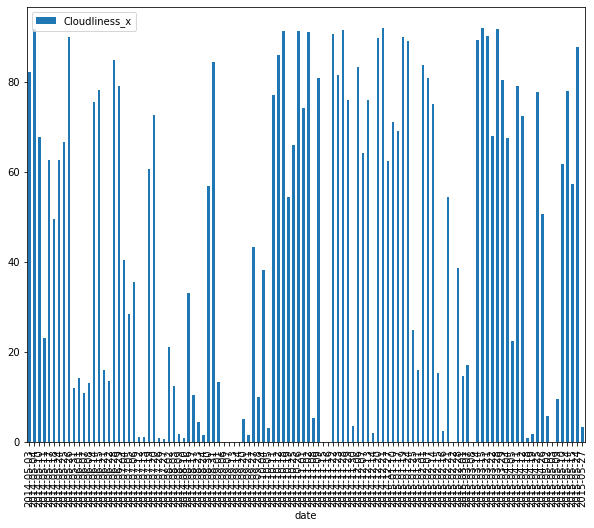

In [70]:
lessdf.plot(kind='bar', y='Cloudliness_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 8.0]


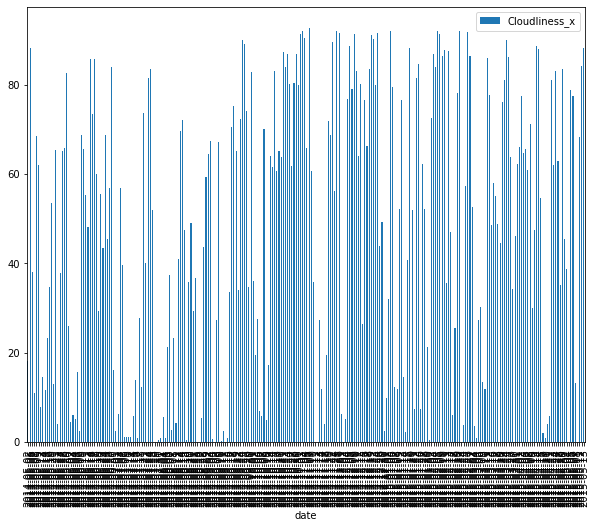

In [71]:
moredf.plot(kind='bar', y='Cloudliness_x')
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [72]:
belowzerotemp=merged2.loc[merged2['Temperature (C)']<=0]

In [73]:
belowzerotemp['id'].sum()

1167

In [74]:
abovezerotemp=merged2.loc[merged2['Temperature (C)']>=0]

In [75]:
abovezerotemp['id'].sum()

20446

In [76]:
housesalebyymcountzc=df.groupby(['zipcode', 'date(Y/M)']).count()
housesalebyymcountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  \
zipcode date(Y/M)                                                      
98039   2015-05     1     1      1         1          1            1   
98148   2015-01     1     1      1         1          1            1   
98109   2015-05     2     2      2         2          2            2   
98014   2015-05     2     2      2         2          2            2   
98024   2014-12     2     2      2         2          2            2   
...                ..   ...    ...       ...        ...          ...   
98034   2014-07    64    64     64        64         64           64   
98103   2014-06    65    65     65        65         65           65   
        2014-10    66    66     66        66         66           66   
        2014-07    73    73     73        73         73           73   
98052   2014-07    73    73     73        73         73           73   

                   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
zipcode date(Y/M)                                      ...                      
98039   2015-05           1       1           1     1  ...      1           1   
98148   2015-01           1       1           1     1  ...      1           1   
98109   2015-05           2       2           2     2  ...      2           2   
98014   2015-05           2       2           2     2  ...      2           2   
98024   2014-12           2       2           2     2  ...      2           2   
...                     ...     ...         ...   ...  ...    ...         ...   
98034   2014-07          64      64          64    64  ...     64          64   
98103   2014-06          65      65          65    65  ...     65          65   
        2014-10          66      66          66    66  ...     66          66   
        2014-07          73      73          73    73  ...     73          73   
98052   2014-07          73      73          73    73  ...     73          73   

                   sqft_basement  yr_built  yr_renovated  lat  long  \
zipcode date(Y/M)                                                     
98039   2015-05                1         1             1    1     1   
98148   2015-01                1         1             1    1     1   
98109   2015-05                2         2             2    2     2   
98014   2015-05                2         2             2    2     2   
98024   2014-12                2         2             2    2     2   
...                          ...       ...           ...  ...   ...   
98034   2014-07               64        64            64   64    64   
98103   2014-06               65        65            65   65    65   
        2014-10               66        66            66   66    66   
        2014-07               73        73            73   73    73   
98052   2014-07               73        73            73   73    73   

                   sqft_living15  sqft_lot15  date(Y)  
zipcode date(Y/M)                                      
98039   2015-05                1           1        1  
98148   2015-01                1           1        1  
98109   2015-05                2           2        2  
98014   2015-05                2           2        2  
98024   2014-12                2           2        2  
...                          ...         ...      ...  
98034   2014-07               64          64       64  
98103   2014-06               65          65       65  
        2014-10               66          66       66  
        2014-07               73          73       73  
98052   2014-07               73          73       73  

[904 rows x 21 columns]

In [77]:
lessthan20zc=housesalebyymcountzc.loc[housesalebyymcountzc['id']<=20]
lessthan20zc['id'].sum()

5176

In [78]:
morethan20zc=housesalebyymcountzc.loc[housesalebyymcountzc['id']>=20]
morethan20zc['id'].sum()

17117

In [79]:
housesalebyycountzc=df.groupby(['zipcode']).count()
housesalebyycountzc.sort_values('id')

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode                                                                         
98039     50    50     50        50         50           50        50      50   
98148     57    57     57        57         57           57        57      57   
98024     81    81     81        81         81           81        81      81   
98010    100   100    100       100        100          100       100     100   
98102    105   105    105       105        105          105       105     105   
...      ...   ...    ...       ...        ...          ...       ...     ...   
98117    553   553    553       553        553          553       553     553   
98052    574   574    574       574        574          574       574     574   
98115    583   583    583       583        583          583       583     583   
98038    590   590    590       590        590          590       590     590   
98103    602   602    602       602        602          602       602     602   

         waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
zipcode                    ...                                        
98039            50    50  ...          50             50        50   
98148            57    57  ...          57             57        57   
98024            81    81  ...          81             81        81   
98010           100   100  ...         100            100       100   
98102           105   105  ...         105            105       105   
...             ...   ...  ...         ...            ...       ...   
98117           553   553  ...         553            553       553   
98052           574   574  ...         574            574       574   
98115           583   583  ...         583            583       583   
98038           590   590  ...         590            590       590   
98103           602   602  ...         602            602       602   

         yr_renovated  lat  long  sqft_living15  sqft_lot15  date(Y/M)  \
zipcode                                                                  
98039              50   50    50             50          50         50   
98148              57   57    57             57          57         57   
98024              81   81    81             81          81         81   
98010             100  100   100            100         100        100   
98102             105  105   105            105         105        105   
...               ...  ...   ...            ...         ...        ...   
98117             553  553   553            553         553        553   
98052             574  574   574            574         574        574   
98115             583  583   583            583         583        583   
98038             590  590   590            590         590        590   
98103             602  602   602            602         602        602   

         date(Y)  
zipcode           
98039         50  
98148         57  
98024         81  
98010        100  
98102        105  
...          ...  
98117        553  
98052        574  
98115        583  
98038        590  
98103        602  

[70 rows x 22 columns]

In [80]:
countnalysis=mergedtable.loc[mergedtable['Temperature (C)']<=0]
countnalysis.count()

Temperature        47
Humidity           47
Cloudliness        47
Wind Speed         47
Temperature (C)    47
id                 21
price              21
bedrooms           21
bathrooms          21
sqft_living        21
sqft_lot           21
floors             21
waterfront         21
view               21
condition          21
grade              21
sqft_above         21
sqft_basement      21
yr_built           21
yr_renovated       21
zipcode            21
lat                21
long               21
sqft_living15      21
sqft_lot15         21
dtype: int64

In [81]:
countnalysis=mergedtable.loc[mergedtable['Temperature (C)']>=0]
countnalysis.count()

Temperature        1049
Humidity           1049
Cloudliness        1049
Wind Speed         1049
Temperature (C)    1049
id                  351
price               351
bedrooms            351
bathrooms           351
sqft_living         351
sqft_lot            351
floors              351
waterfront          351
view                351
condition           351
grade               351
sqft_above          351
sqft_basement       351
yr_built            351
yr_renovated        351
zipcode             351
lat                 351
long                351
sqft_living15       351
sqft_lot15          351
dtype: int64